In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import date, timedelta
import datetime
import matplotlib.dates as mdates
%matplotlib inline
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_covid_hospital = pd.read_csv('https://healthdata.gov/api/views/anag-cw7u/rows.csv?accessType=DOWNLOAD', parse_dates = ['collection_week'])

In [4]:
df_covid_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678426 entries, 0 to 678425
Columns: 128 entries, hospital_pk to total_staffed_pediatric_icu_beds_7_day_sum
dtypes: bool(2), datetime64[ns](1), float64(87), int64(29), object(9)
memory usage: 653.5+ MB


https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/anag-cw7u

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df_covid_hospital.max()

hospital_pk                                                                           ff9032c172057190bf52f523d253c79af2d5f74d007084...
collection_week                                                                                                     2022-11-11 00:00:00
state                                                                                                                                WY
hospital_name                                                                         ZUCKERBERG SAN FRANCISCO GENERAL HOSP & TRAUMA...
zip                                                                                                                             99901.0
hospital_subtype                                                                                                             Short Term
fips_code                                                                                                                       78020.0
is_metro_micro                                  

In [8]:
df_covid_hospital.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 678426 entries, 0 to 678425
Columns: 128 entries, hospital_pk to total_staffed_pediatric_icu_beds_7_day_sum
dtypes: bool(2), datetime64[ns](1), float64(87), int64(29), object(9)
memory usage: 653.5+ MB


In [54]:
date_list = aaa.collection_week.unique()

In [55]:
date_list.sort()

In [56]:
date_list

array(['2020-03-20T00:00:00.000000000', '2020-03-27T00:00:00.000000000',
       '2020-04-03T00:00:00.000000000', '2020-04-10T00:00:00.000000000',
       '2020-04-17T00:00:00.000000000', '2020-04-24T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2020-05-08T00:00:00.000000000',
       '2020-05-15T00:00:00.000000000', '2020-05-22T00:00:00.000000000',
       '2020-05-29T00:00:00.000000000', '2020-06-05T00:00:00.000000000',
       '2020-06-12T00:00:00.000000000', '2020-06-19T00:00:00.000000000',
       '2020-06-26T00:00:00.000000000', '2020-07-03T00:00:00.000000000',
       '2020-07-10T00:00:00.000000000', '2020-07-17T00:00:00.000000000',
       '2020-07-24T00:00:00.000000000', '2020-07-31T00:00:00.000000000',
       '2020-08-07T00:00:00.000000000', '2020-08-14T00:00:00.000000000',
       '2020-08-21T00:00:00.000000000', '2020-08-28T00:00:00.000000000',
       '2020-09-04T00:00:00.000000000', '2020-09-11T00:00:00.000000000',
       '2020-09-18T00:00:00.000000000', '2020-09-25

In [150]:
zzz = df_covid_hospital.city.unique()

In [152]:
zzz[0]

'HOBBS'

In [144]:
sa_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    sa_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))

In [145]:
df_sa_ped = pd.DataFrame(sa_ped_list, columns = ['date', 'ped_count'])

In [146]:
df_sa_ped.tail()

date  ped_count
146 2022-10-14      458.0
147 2022-10-21      483.0
148 2022-10-28      475.0
149 2022-11-04     1277.0
150 2022-11-11      874.0

In [157]:
aaa = df_covid_hospital[df_covid_hospital.city == 'SAN ANTONIO']
sa_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    sa_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
    df_sa_ped = pd.DataFrame(sa_ped_list, columns = ['date', 'ped_count'])

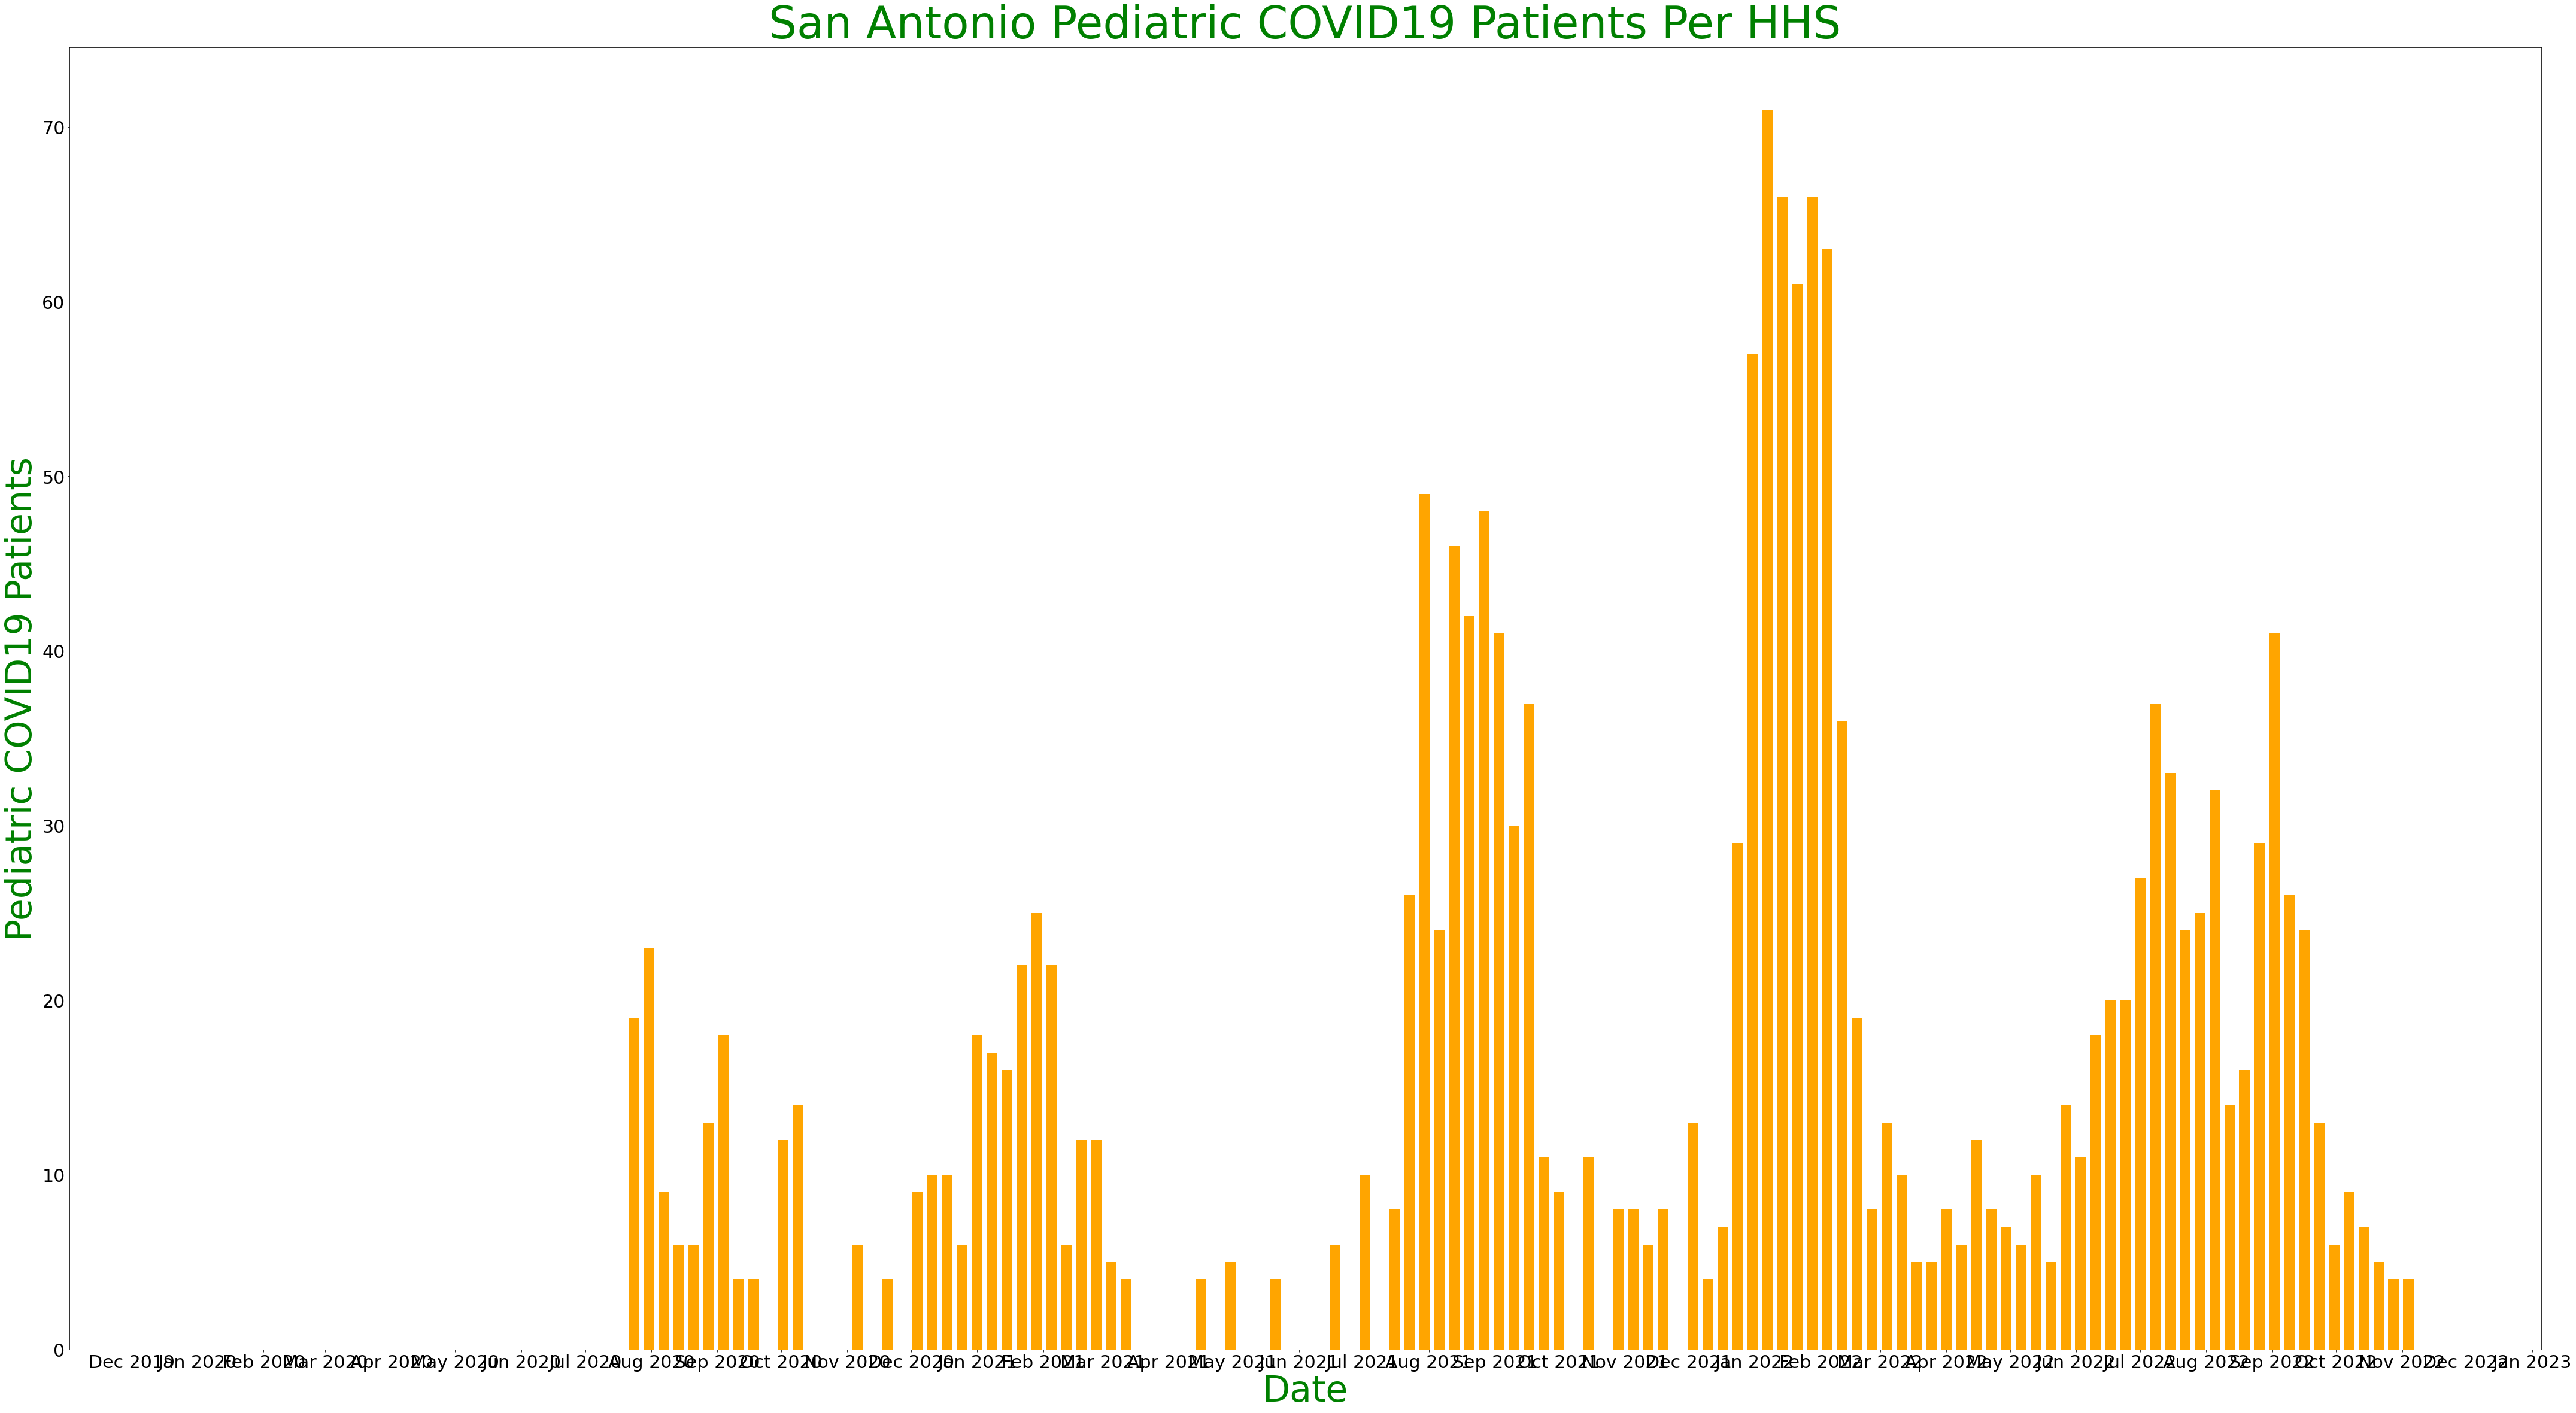

In [158]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('San Antonio Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_sa_ped.date, df_sa_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_San_Antonio_Pediatric.png')

In [61]:
aaa = df_covid_hospital[df_covid_hospital.state == 'NY']

In [62]:
date_list = aaa.collection_week.unique()
date_list.sort()
ny_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    ny_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_ny_ped = pd.DataFrame(ny_ped_list, columns = ['date', 'ped_count'])

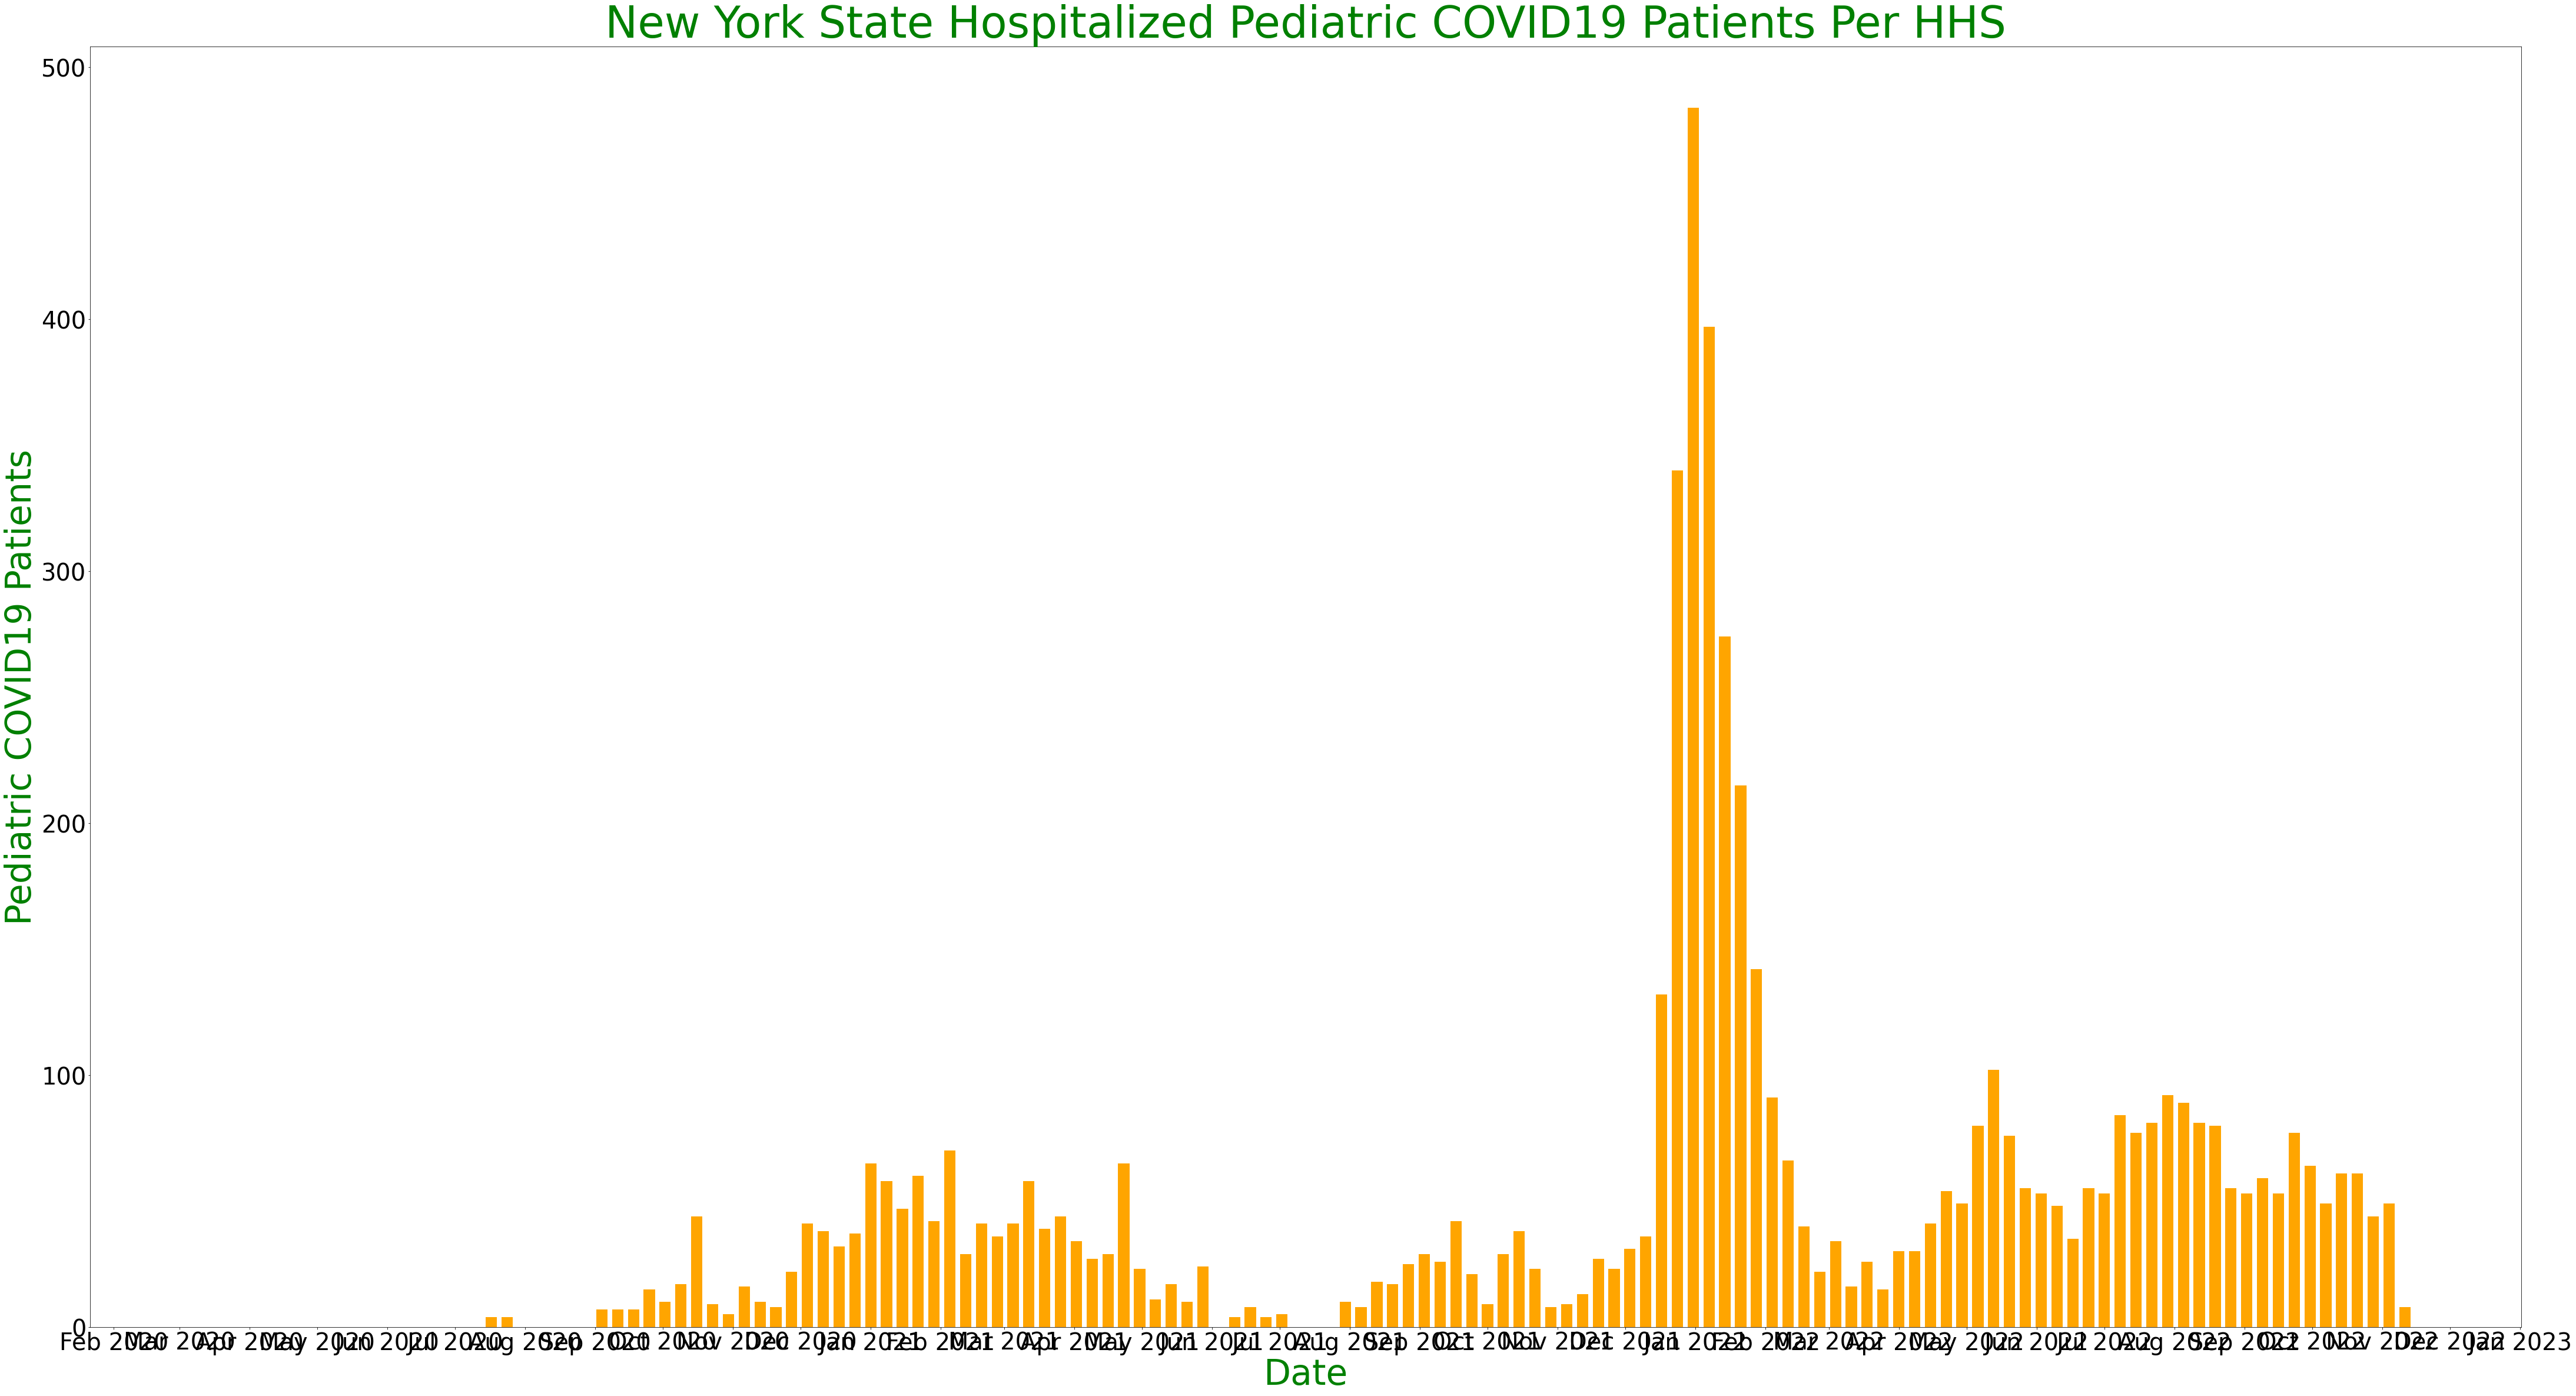

In [63]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=40)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('New York State Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_ny_ped.date, df_ny_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_NY_Pediatric.png')

In [64]:
aaa = df_covid_hospital[df_covid_hospital.state == 'TX']
date_list = aaa.collection_week.unique()
date_list.sort()
tx_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    tx_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_tx_ped = pd.DataFrame(tx_ped_list, columns = ['date', 'ped_count'])

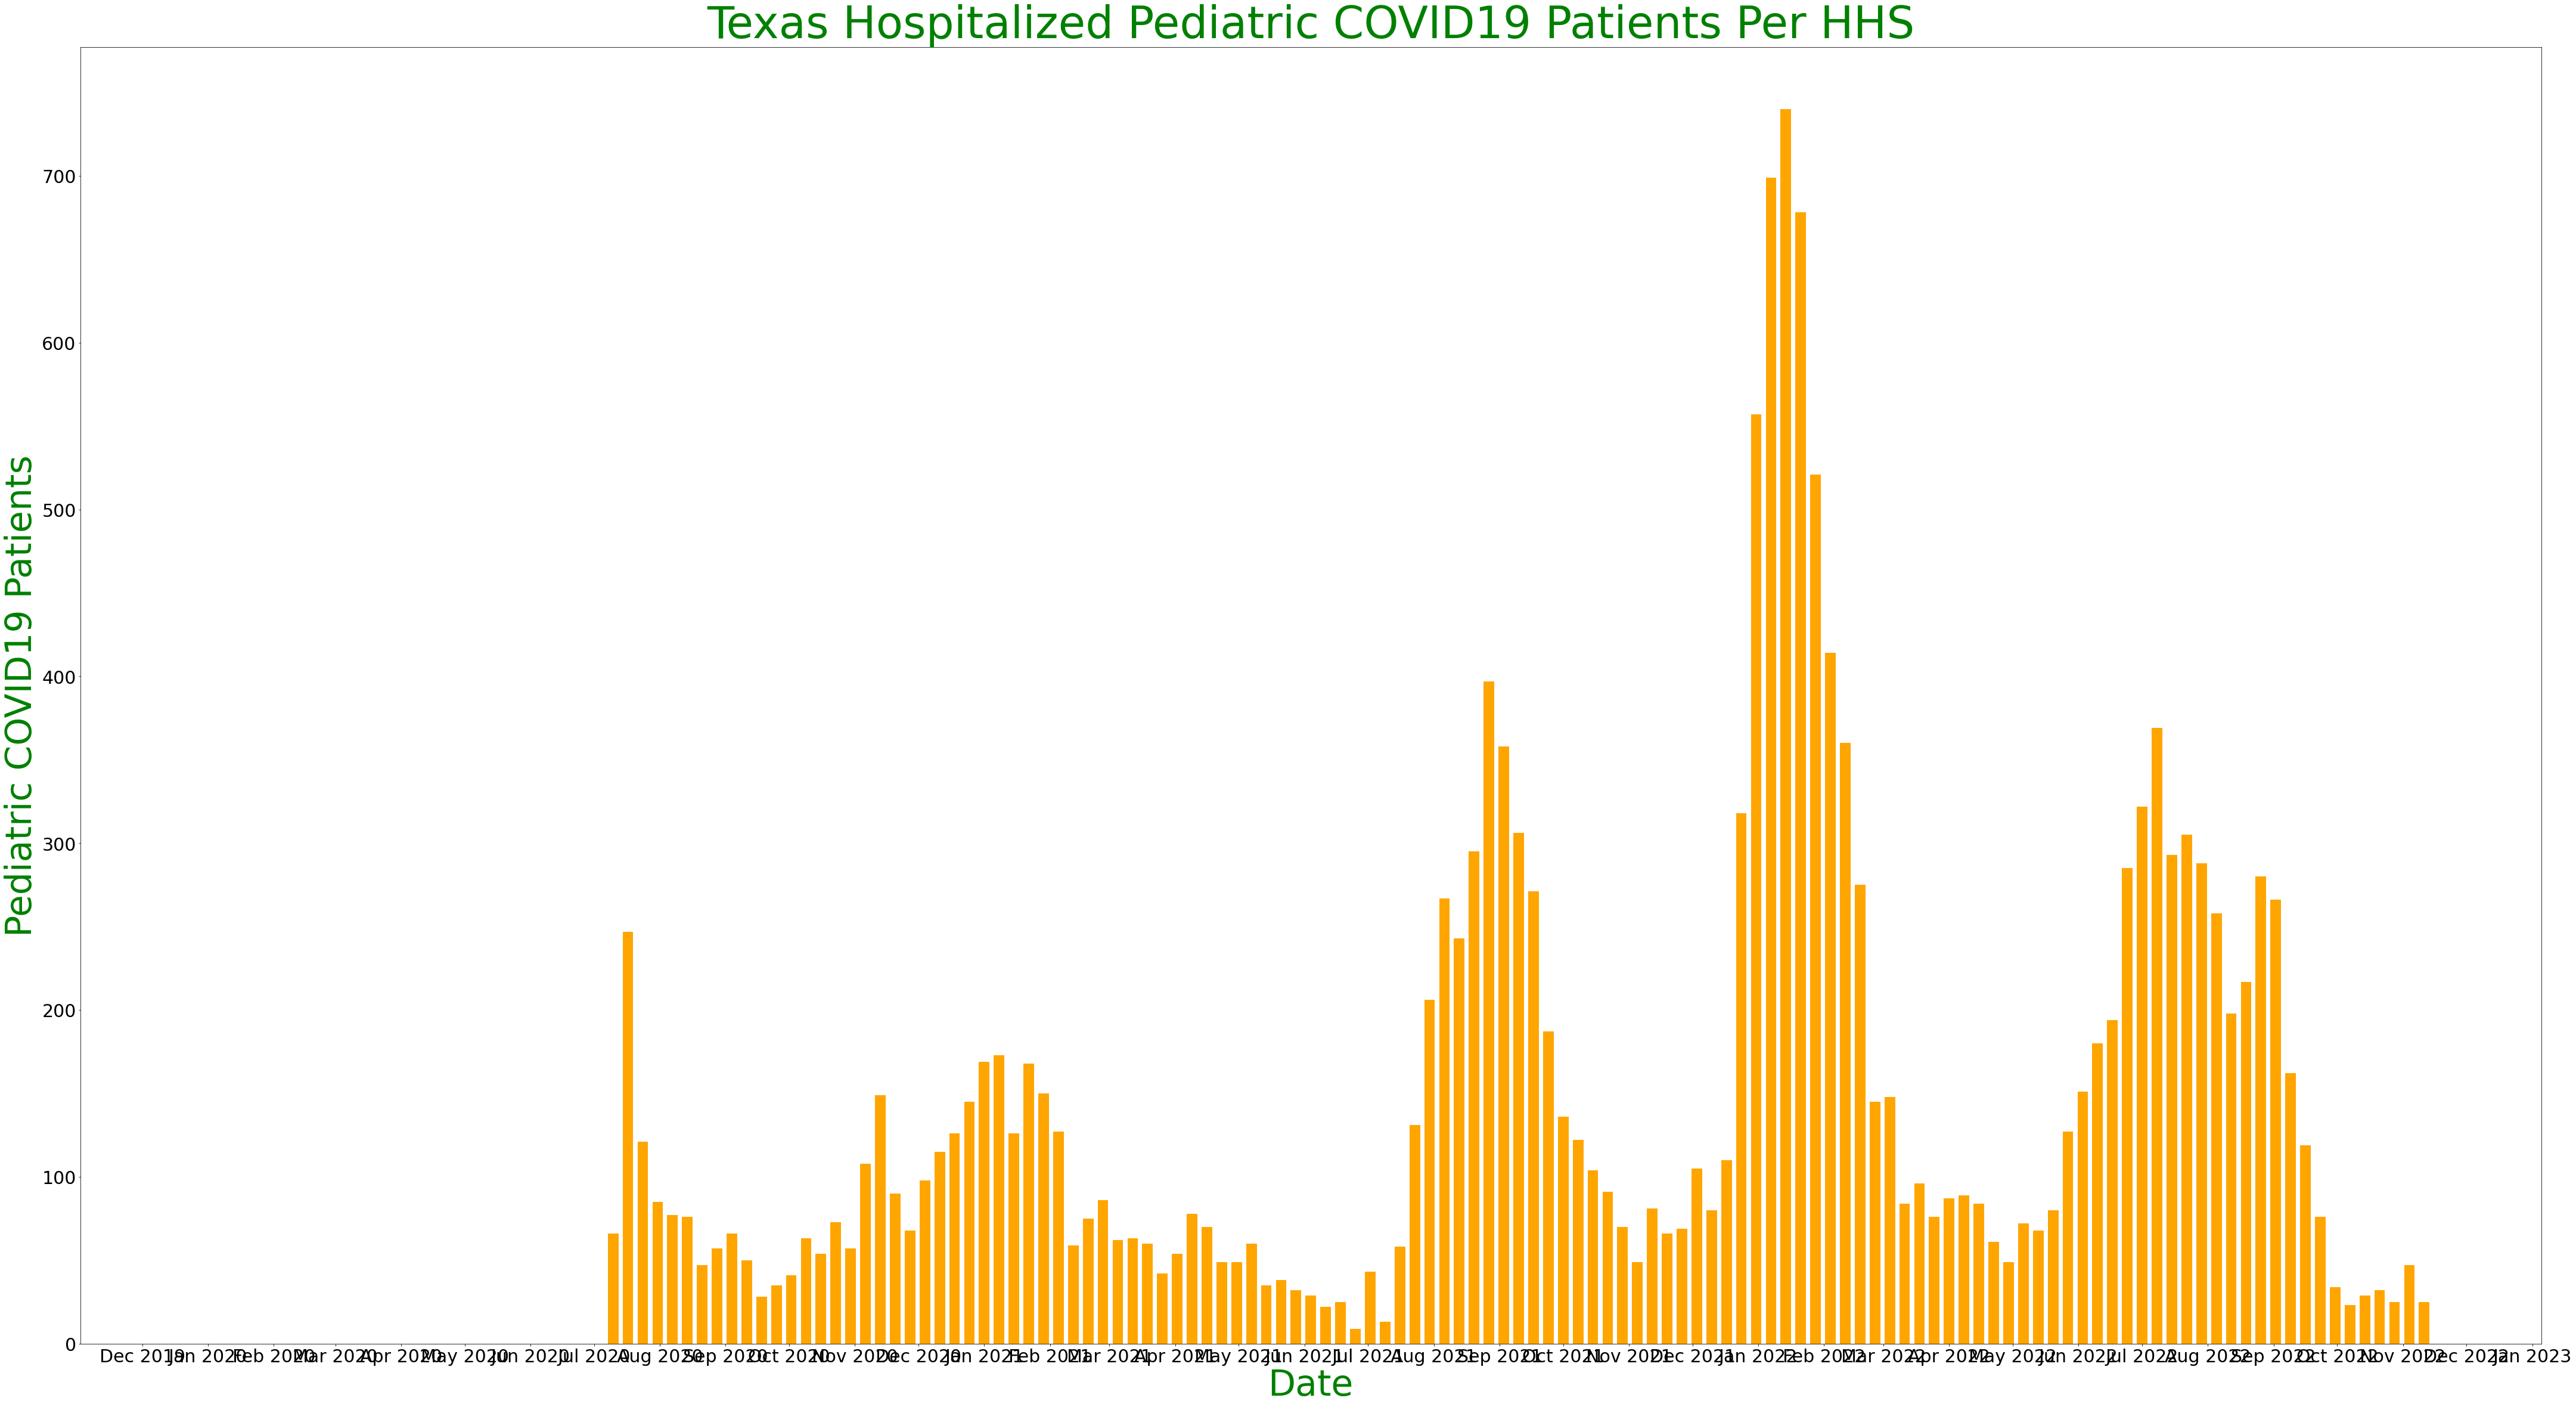

In [65]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Texas Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_tx_ped.date, df_tx_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_TX_Pediatric.png')

In [66]:
aaa = df_covid_hospital[df_covid_hospital.state == 'TX']
date_list = aaa.collection_week.unique()
date_list.sort()
tx_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    tx_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_tx_ped = pd.DataFrame(tx_ped_list, columns = ['date', 'ped_count'])

In [67]:
aaa = df_covid_hospital[df_covid_hospital.state == 'CA']
date_list = aaa.collection_week.unique()
date_list.sort()
ca_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    ca_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_ca_ped = pd.DataFrame(ca_ped_list, columns = ['date', 'ped_count'])

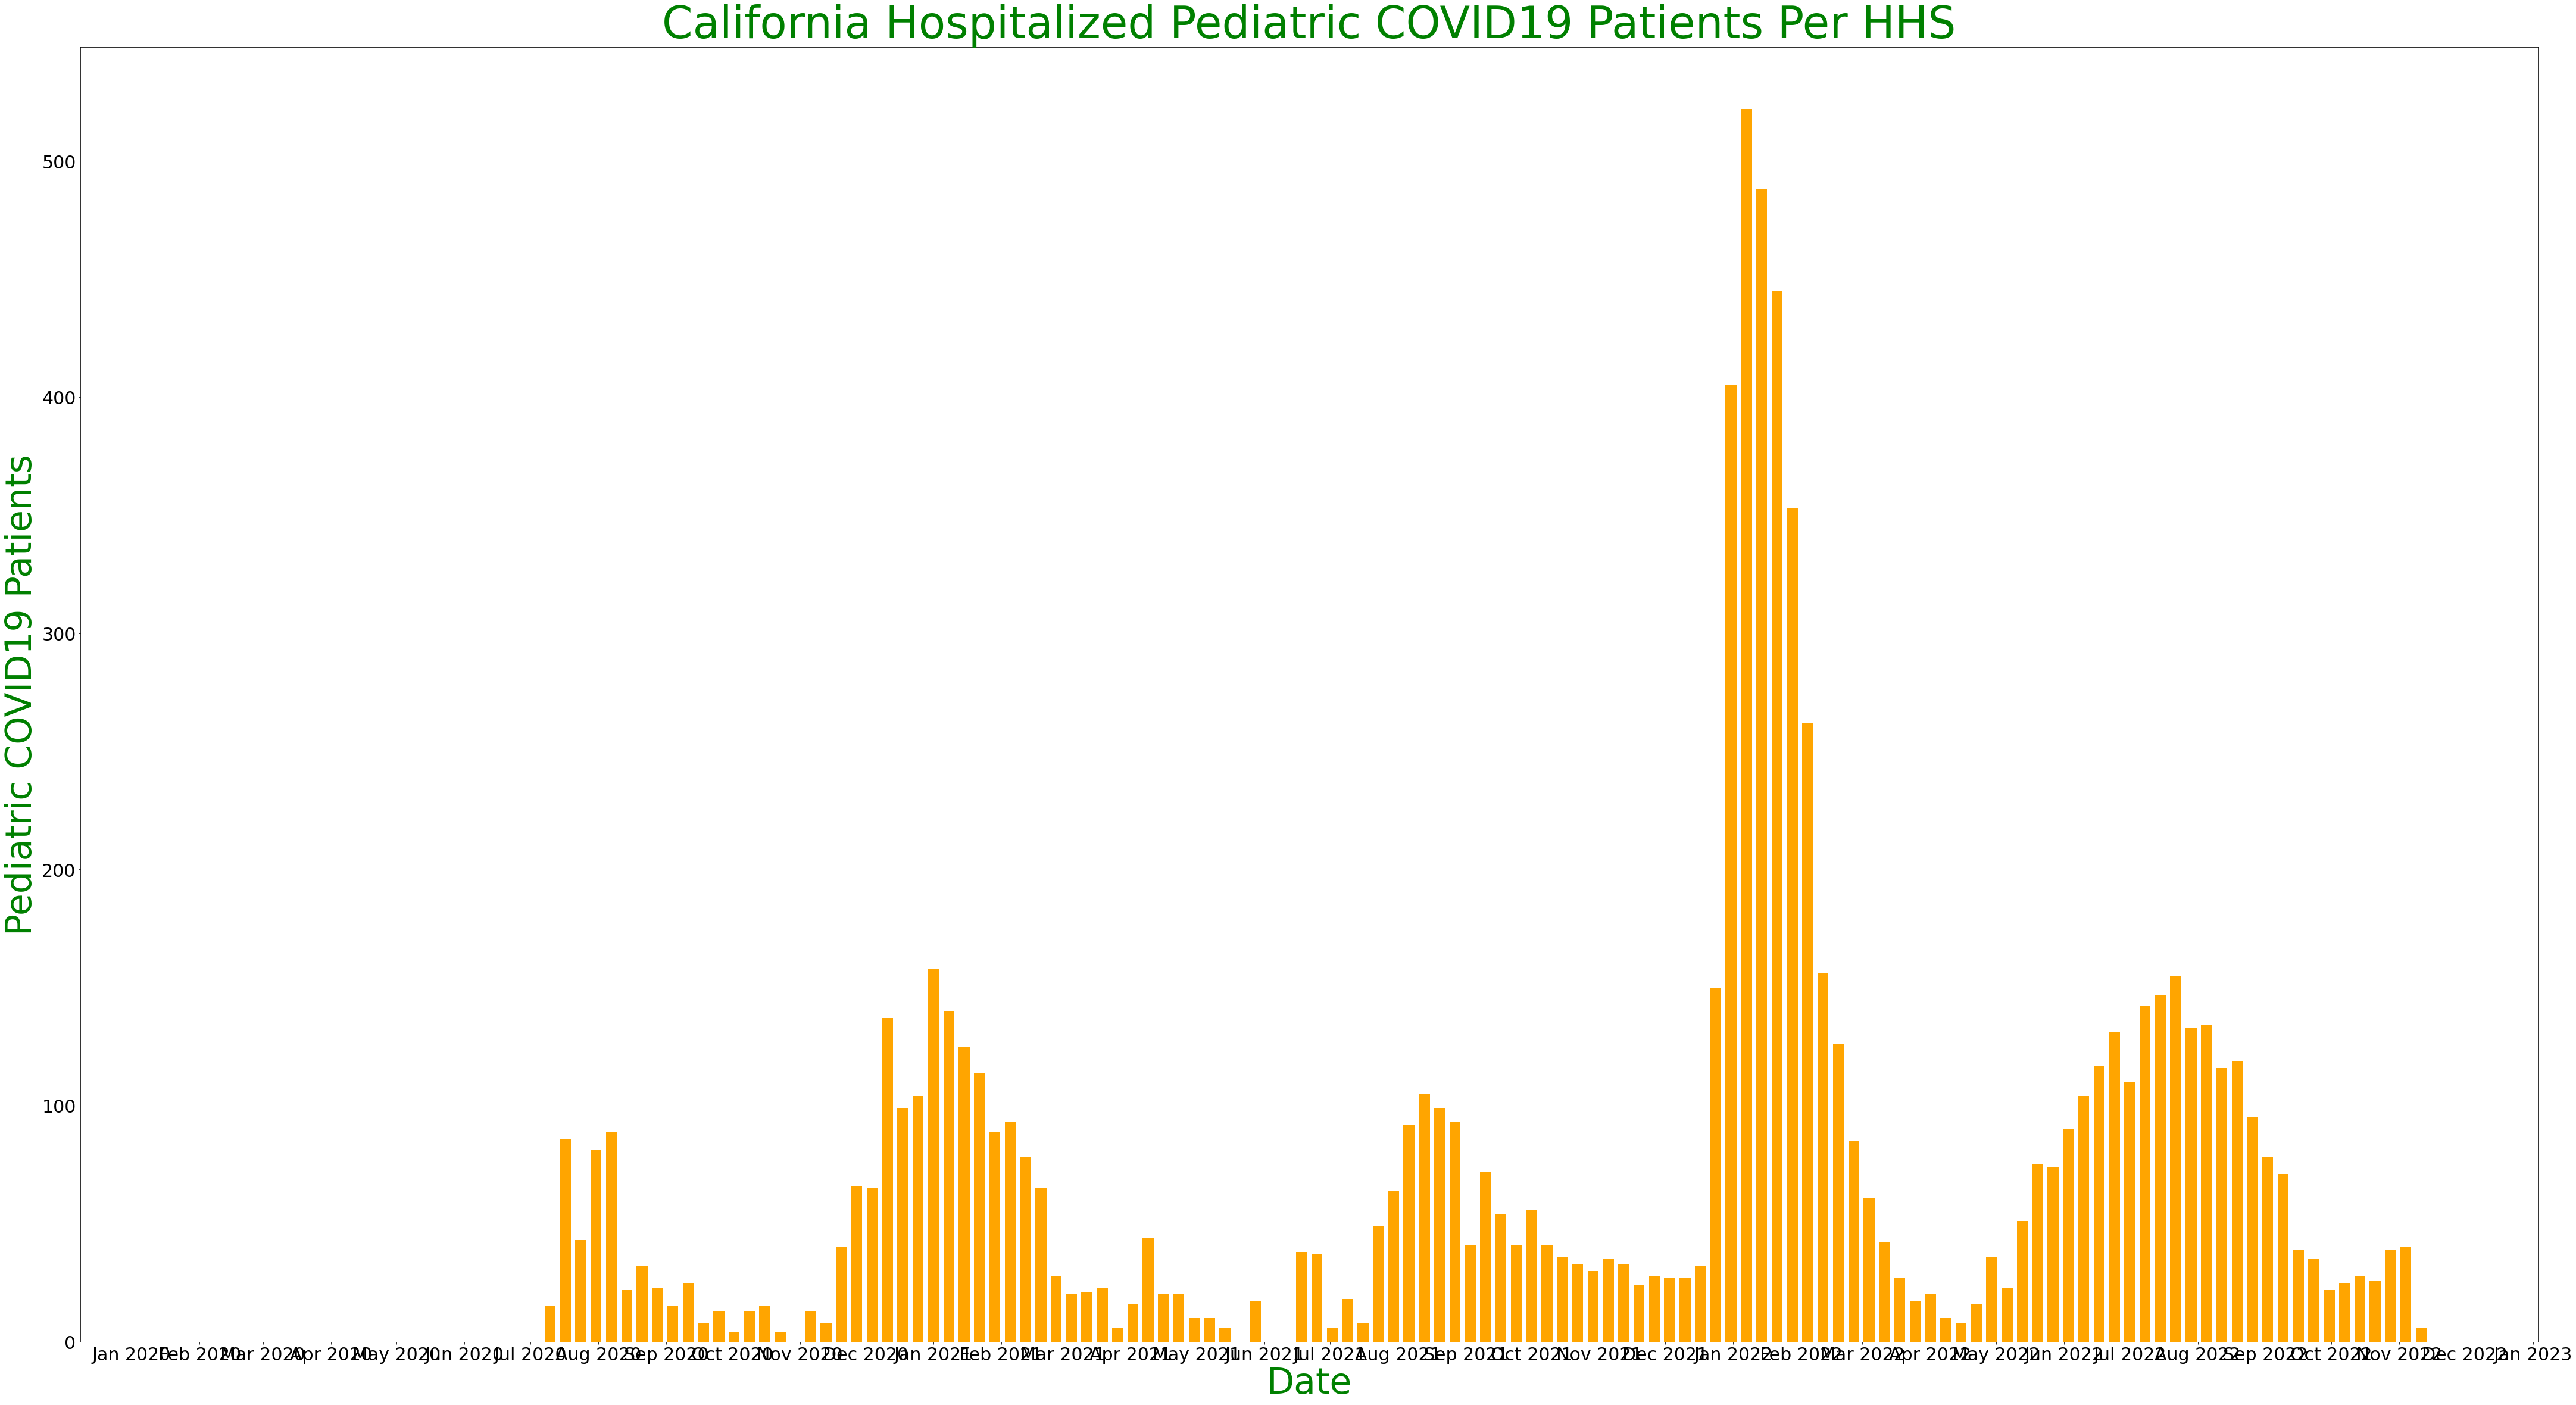

In [68]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('California Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_ca_ped.date, df_ca_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_CA_Pediatric.png')

In [132]:
aaa = df_covid_hospital
date_list = aaa.collection_week.unique()
date_list.sort()
us_ped_list = []
for x in date_list[80:500]:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    us_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_us_ped = pd.DataFrame(us_ped_list, columns = ['date', 'ped_count'])

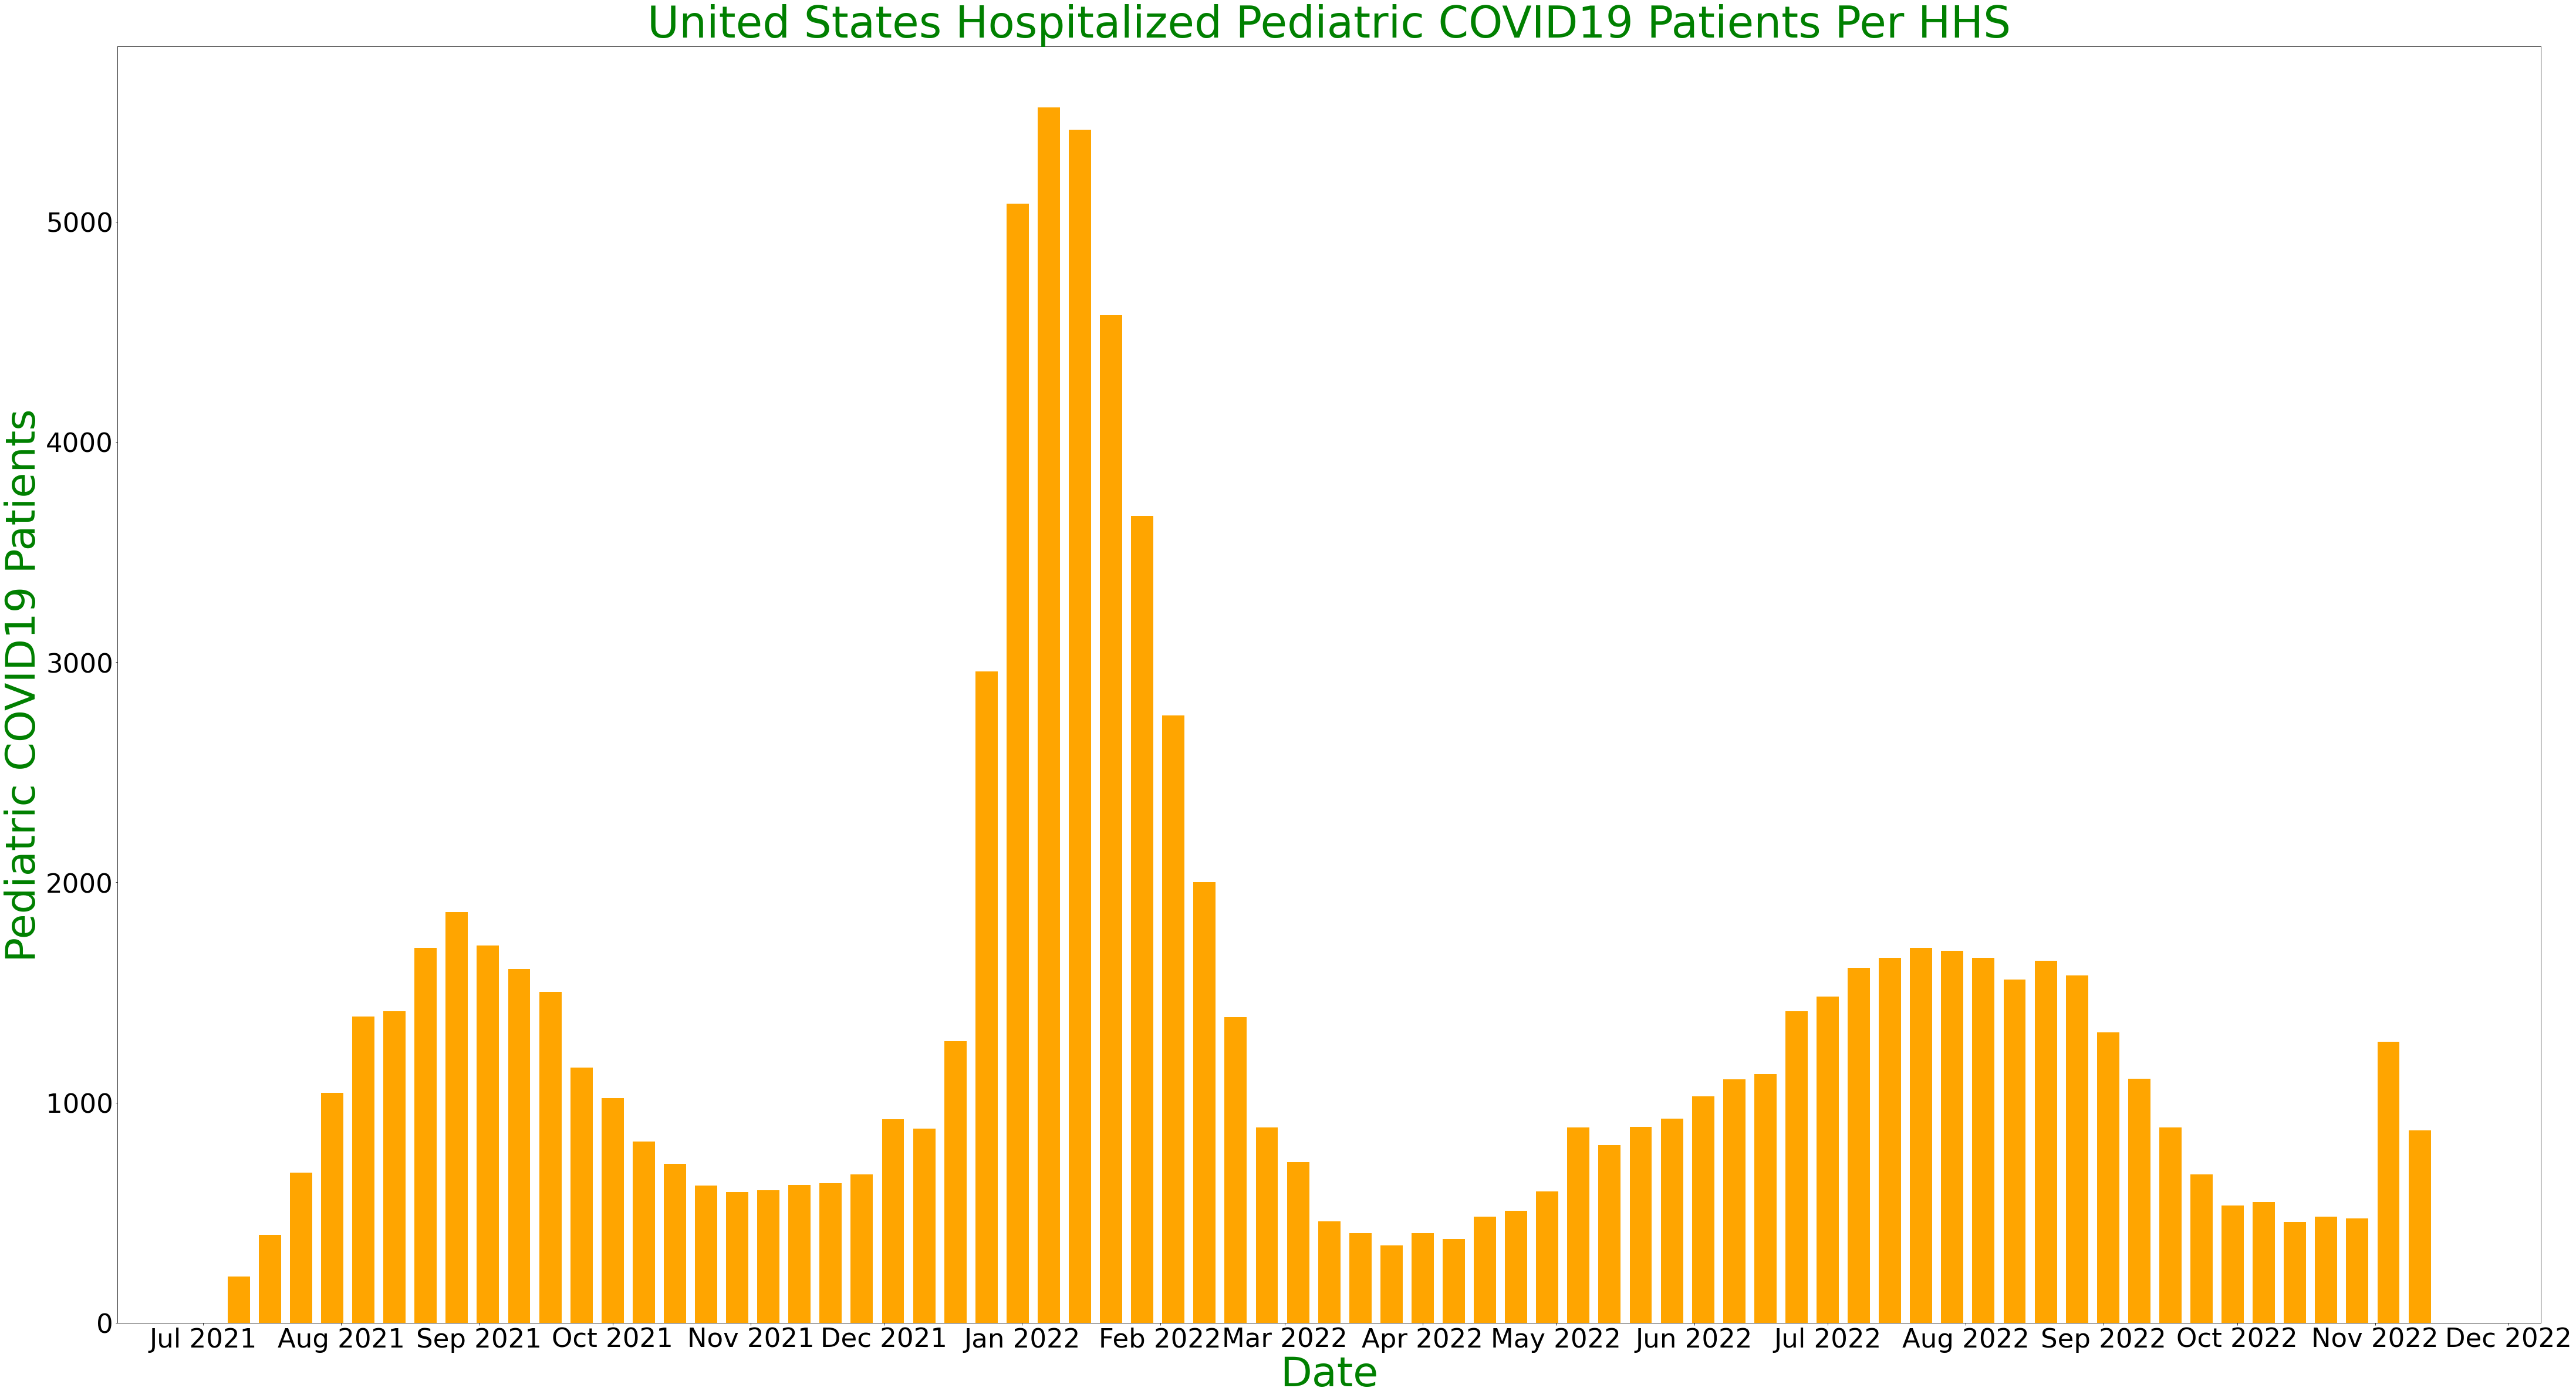

In [134]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=45)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('United States Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 70)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 70)
plt.bar(df_us_ped.date, df_us_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_US_Pediatric.png')

In [137]:
aaa = df_covid_hospital
date_list = aaa.collection_week.unique()
date_list.sort()
us_adult_list = []
for x in date_list[80:500]:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_adult_covid_confirmed_7_day_sum >= 0]
    #print()
    us_adult_list.append((x, ccc.previous_day_admission_adult_covid_confirmed_7_day_sum.sum()))
df_us_adult = pd.DataFrame(us_adult_list, columns = ['date', 'adult_count'])

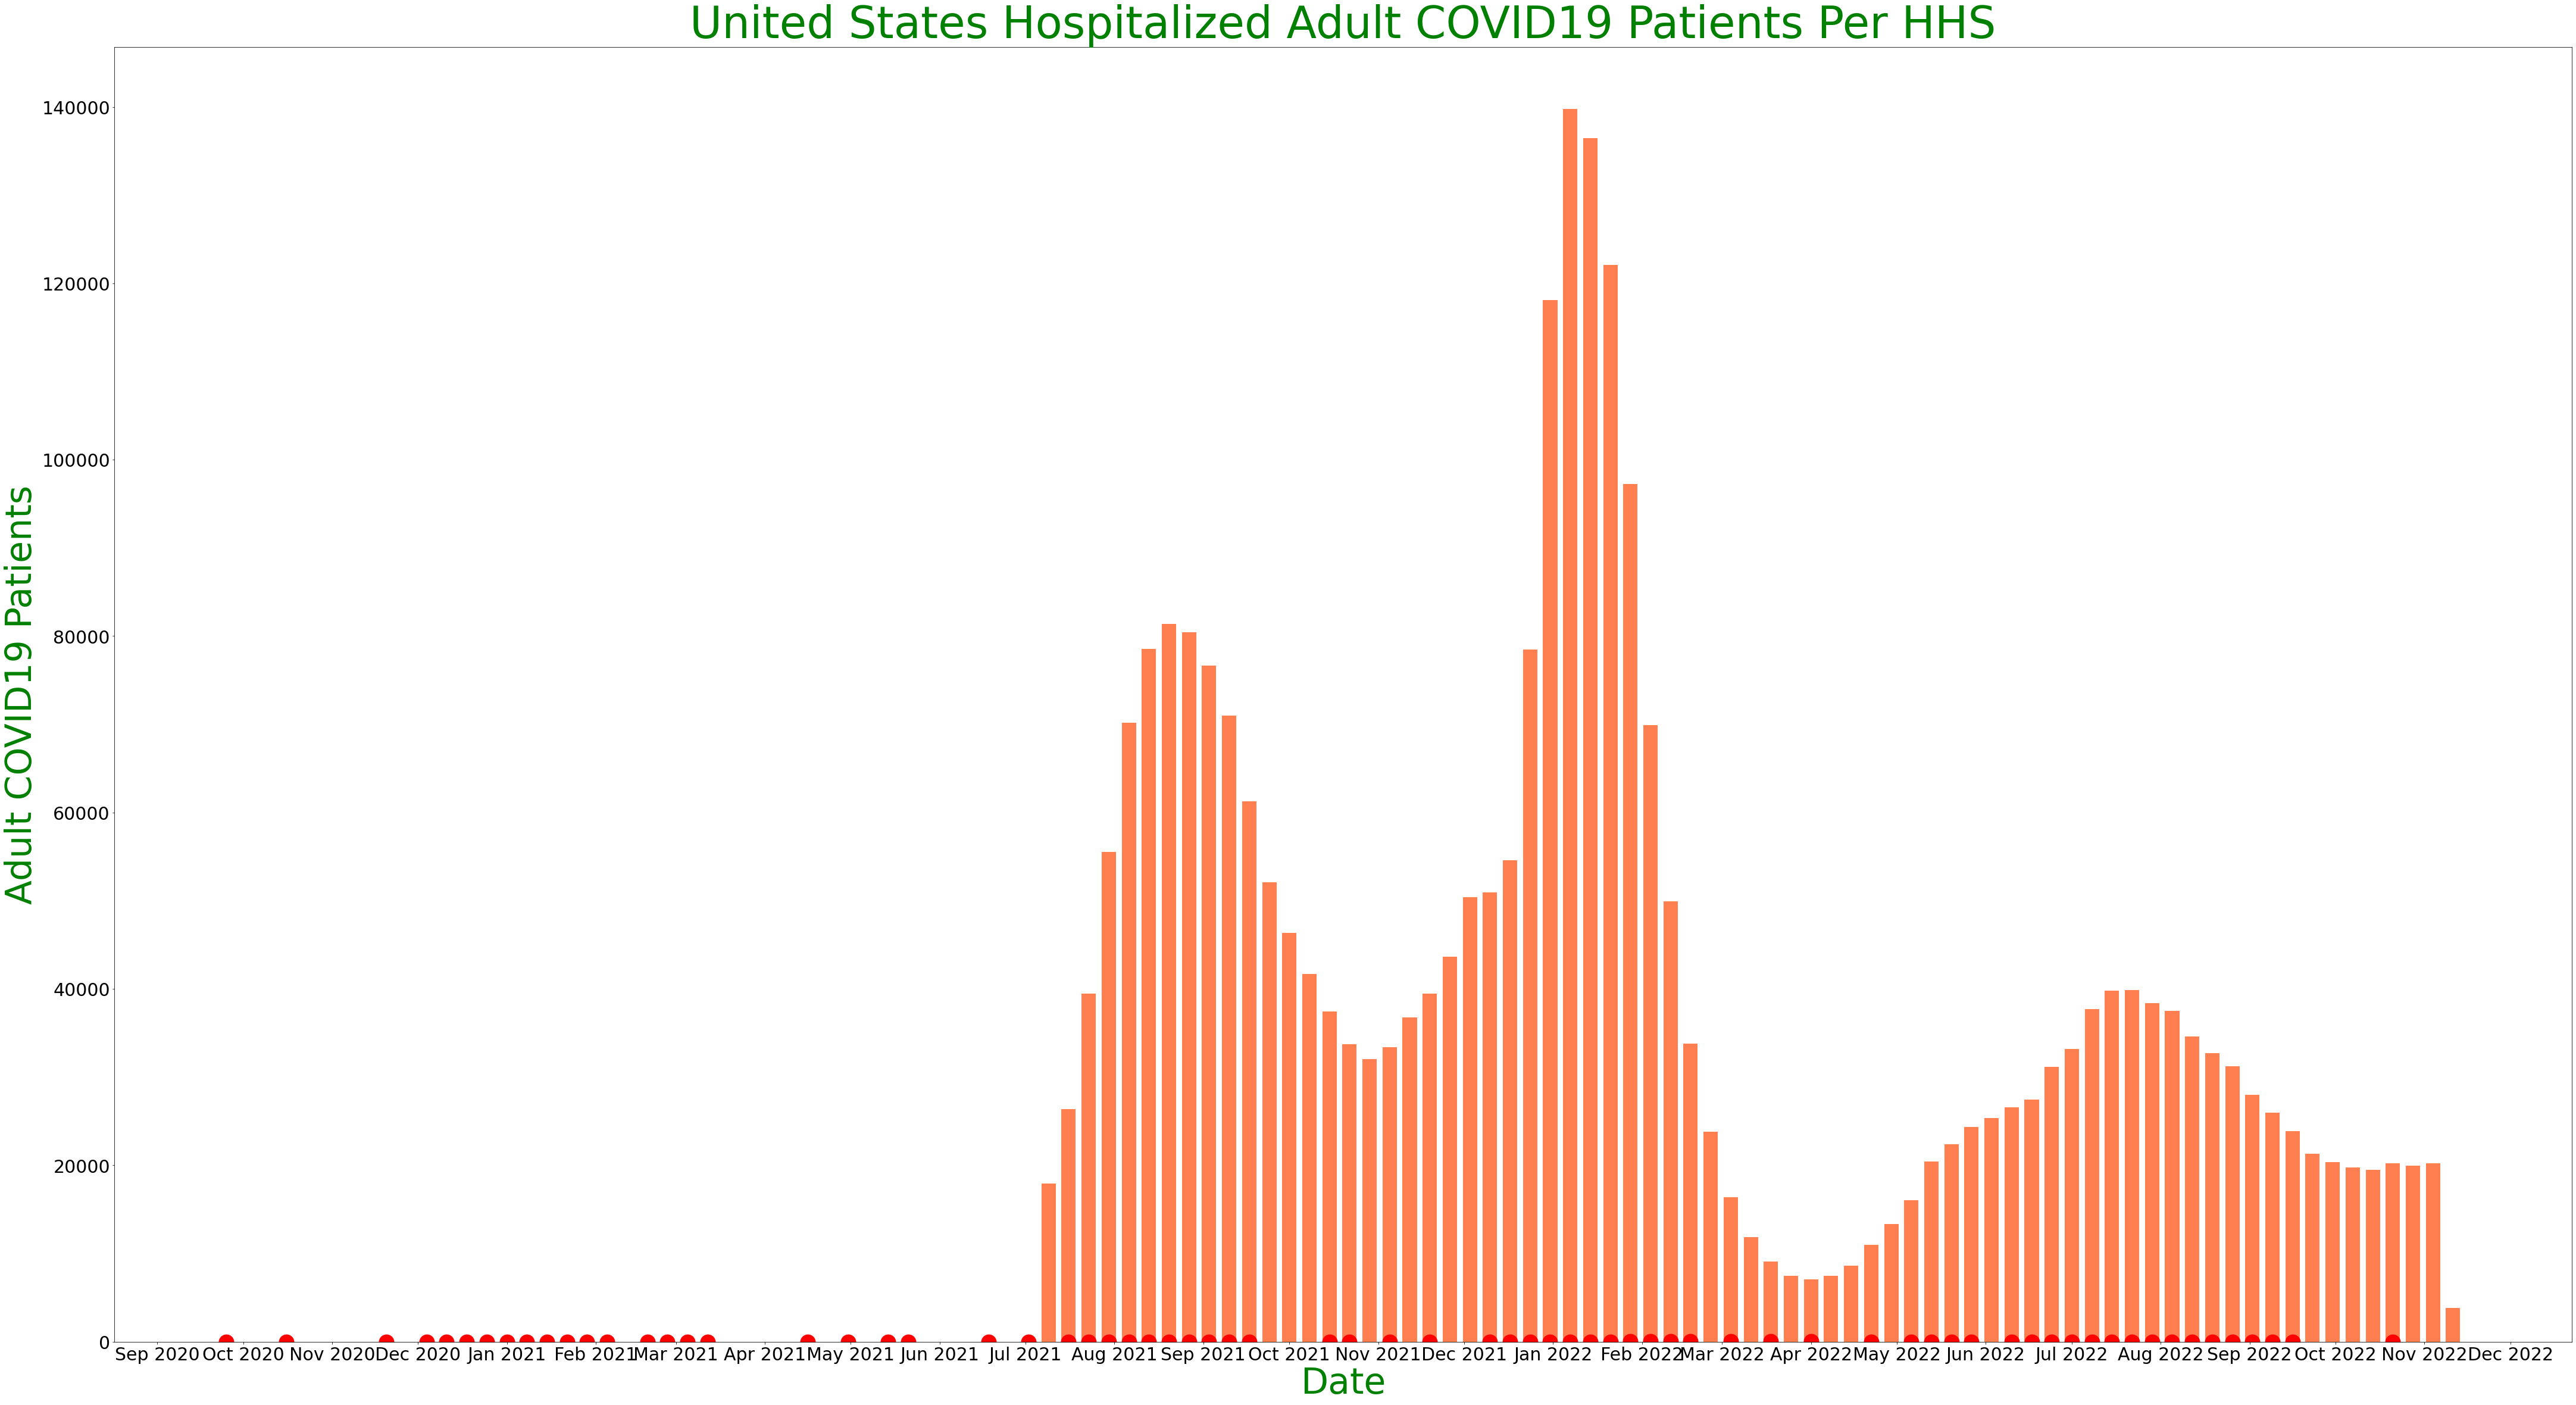

In [138]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('United States Hospitalized Adult COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Adult COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_us_adult.date, df_us_adult.adult_count, color = 'coral', width = 5)
plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_US_Adult.png')

In [74]:
#

In [75]:
aaa = df_covid_hospital
date_list = aaa.collection_week.unique()
date_list.sort()
us_adult_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.all_adult_hospital_inpatient_bed_occupied_7_day_sum >= 0]
    #print()
    us_adult_list.append((x, ccc.all_adult_hospital_inpatient_bed_occupied_7_day_sum.sum()))
df_us_adult = pd.DataFrame(us_adult_list, columns = ['date', 'adult_count'])

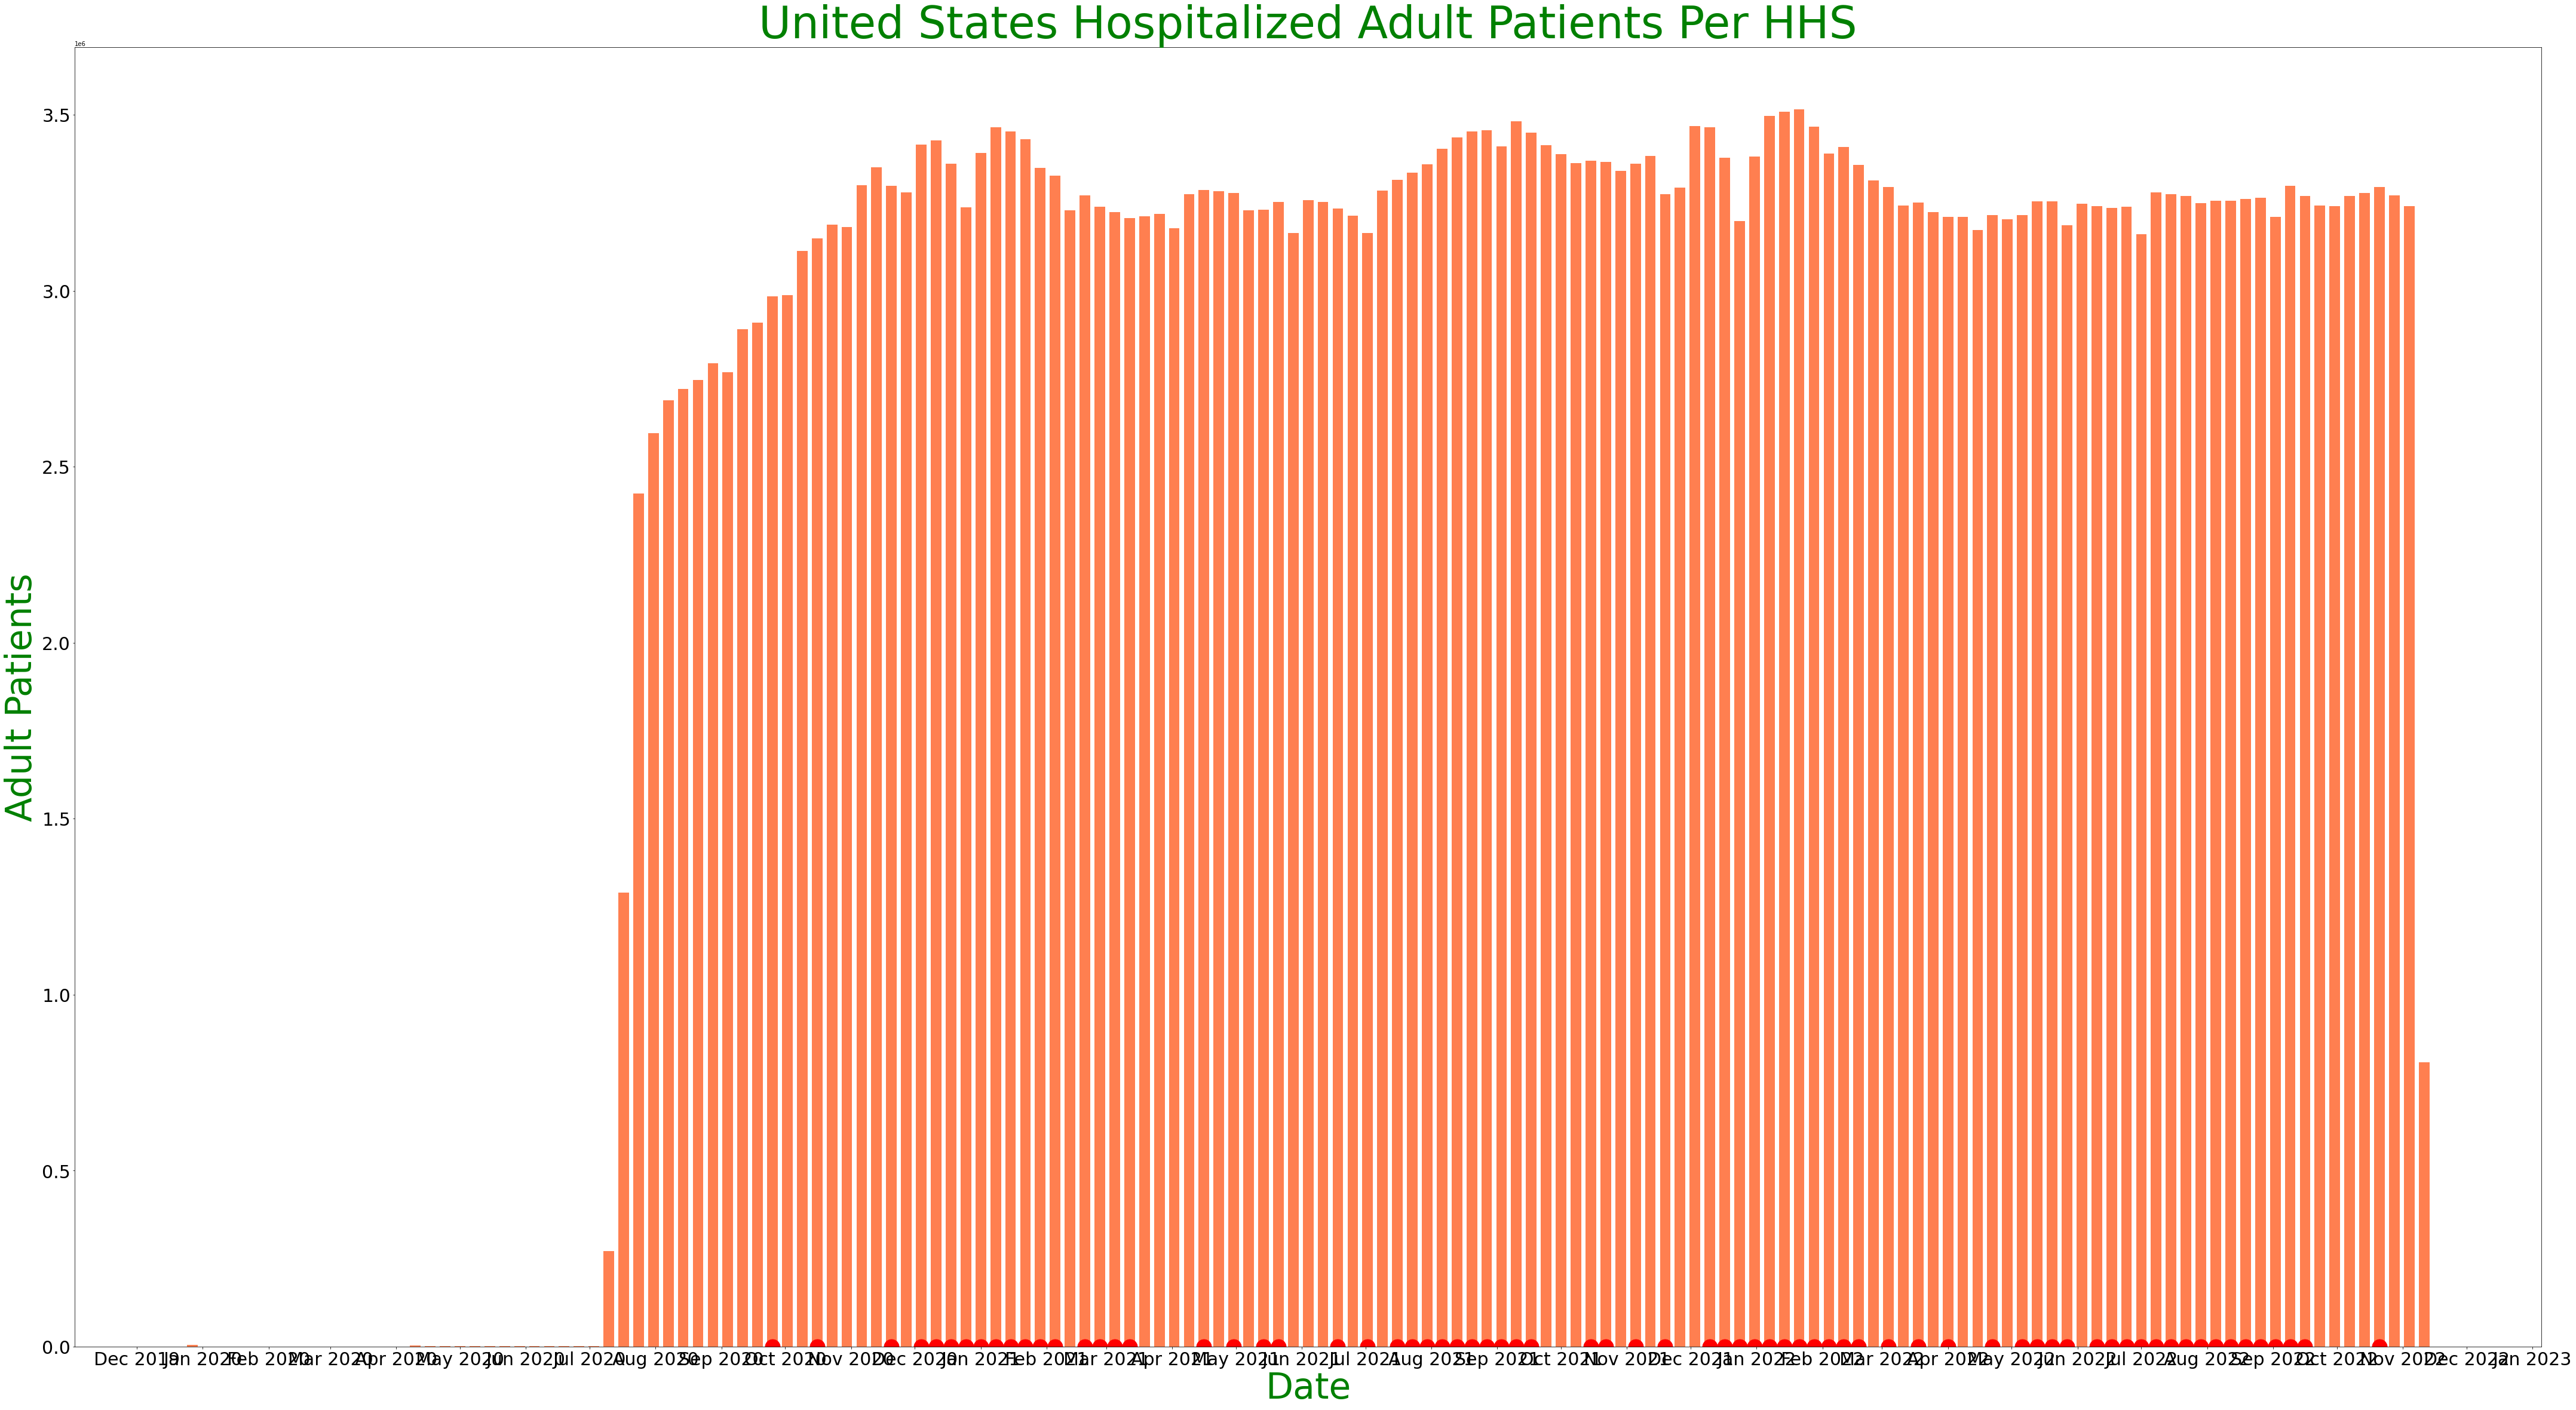

In [76]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('United States Hospitalized Adult Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Adult Patients',color='green', fontsize = 60)
plt.bar(df_us_adult.date, df_us_adult.adult_count, color = 'coral', width = 5)
plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_All_US_Adult.png')

In [139]:
aaa = df_covid_hospital
date_list = aaa.collection_week.unique()
date_list.sort()
us_adult_list = []
for x in date_list[80:500]:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.all_pediatric_inpatient_bed_occupied_7_day_sum >= 0]
    #print()
    us_adult_list.append((x, ccc.all_pediatric_inpatient_bed_occupied_7_day_sum.sum()))
df_us_adult = pd.DataFrame(us_adult_list, columns = ['date', 'pediatric_count'])

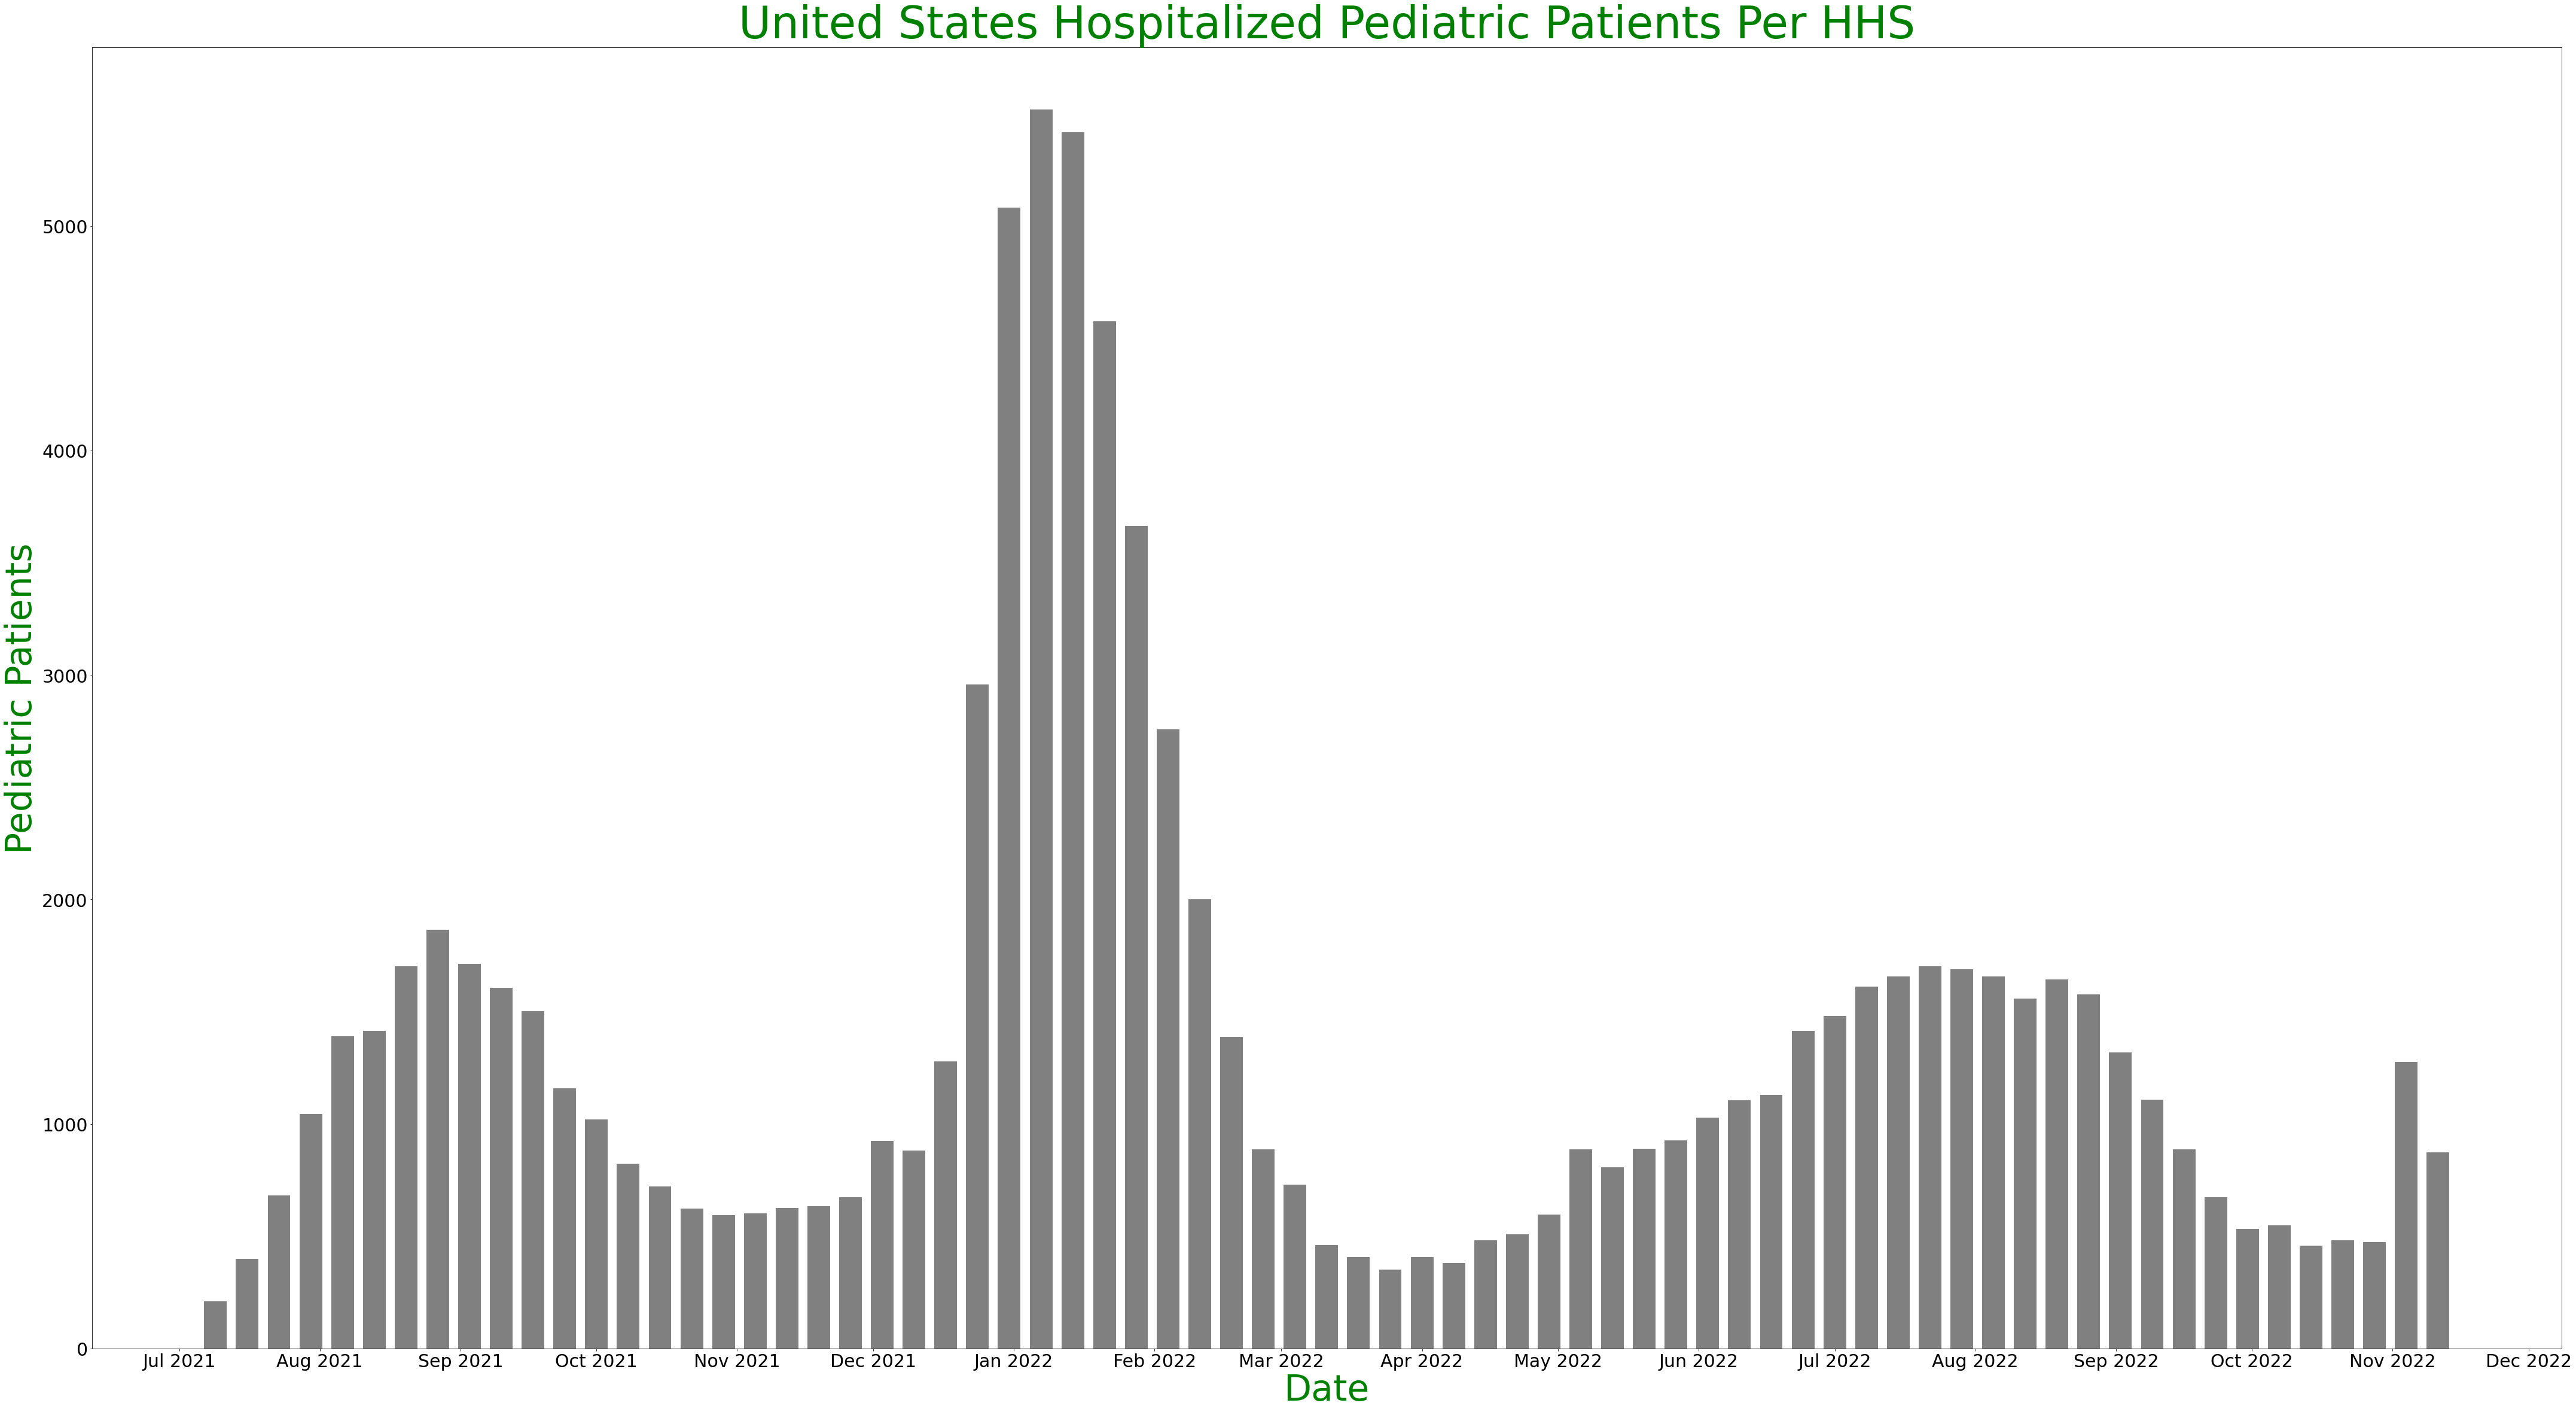

In [142]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('United States Hospitalized Pediatric Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric Patients',color='green', fontsize = 60)
plt.bar(df_us_ped.date, df_us_ped.ped_count, color = 'gray', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_All_US_Pediatric.png')

In [79]:
aaa = df_covid_hospital
date_list = aaa.collection_week.unique()
date_list.sort()
us_adult_icu_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum >= 0]
    #print()
    us_adult_icu_list.append((x, ccc.staffed_icu_adult_patients_confirmed_and_suspected_covid_7_day_sum.sum()))
df_us_adult_icu = pd.DataFrame(us_adult_icu_list, columns = ['date', 'adult_icu_count'])

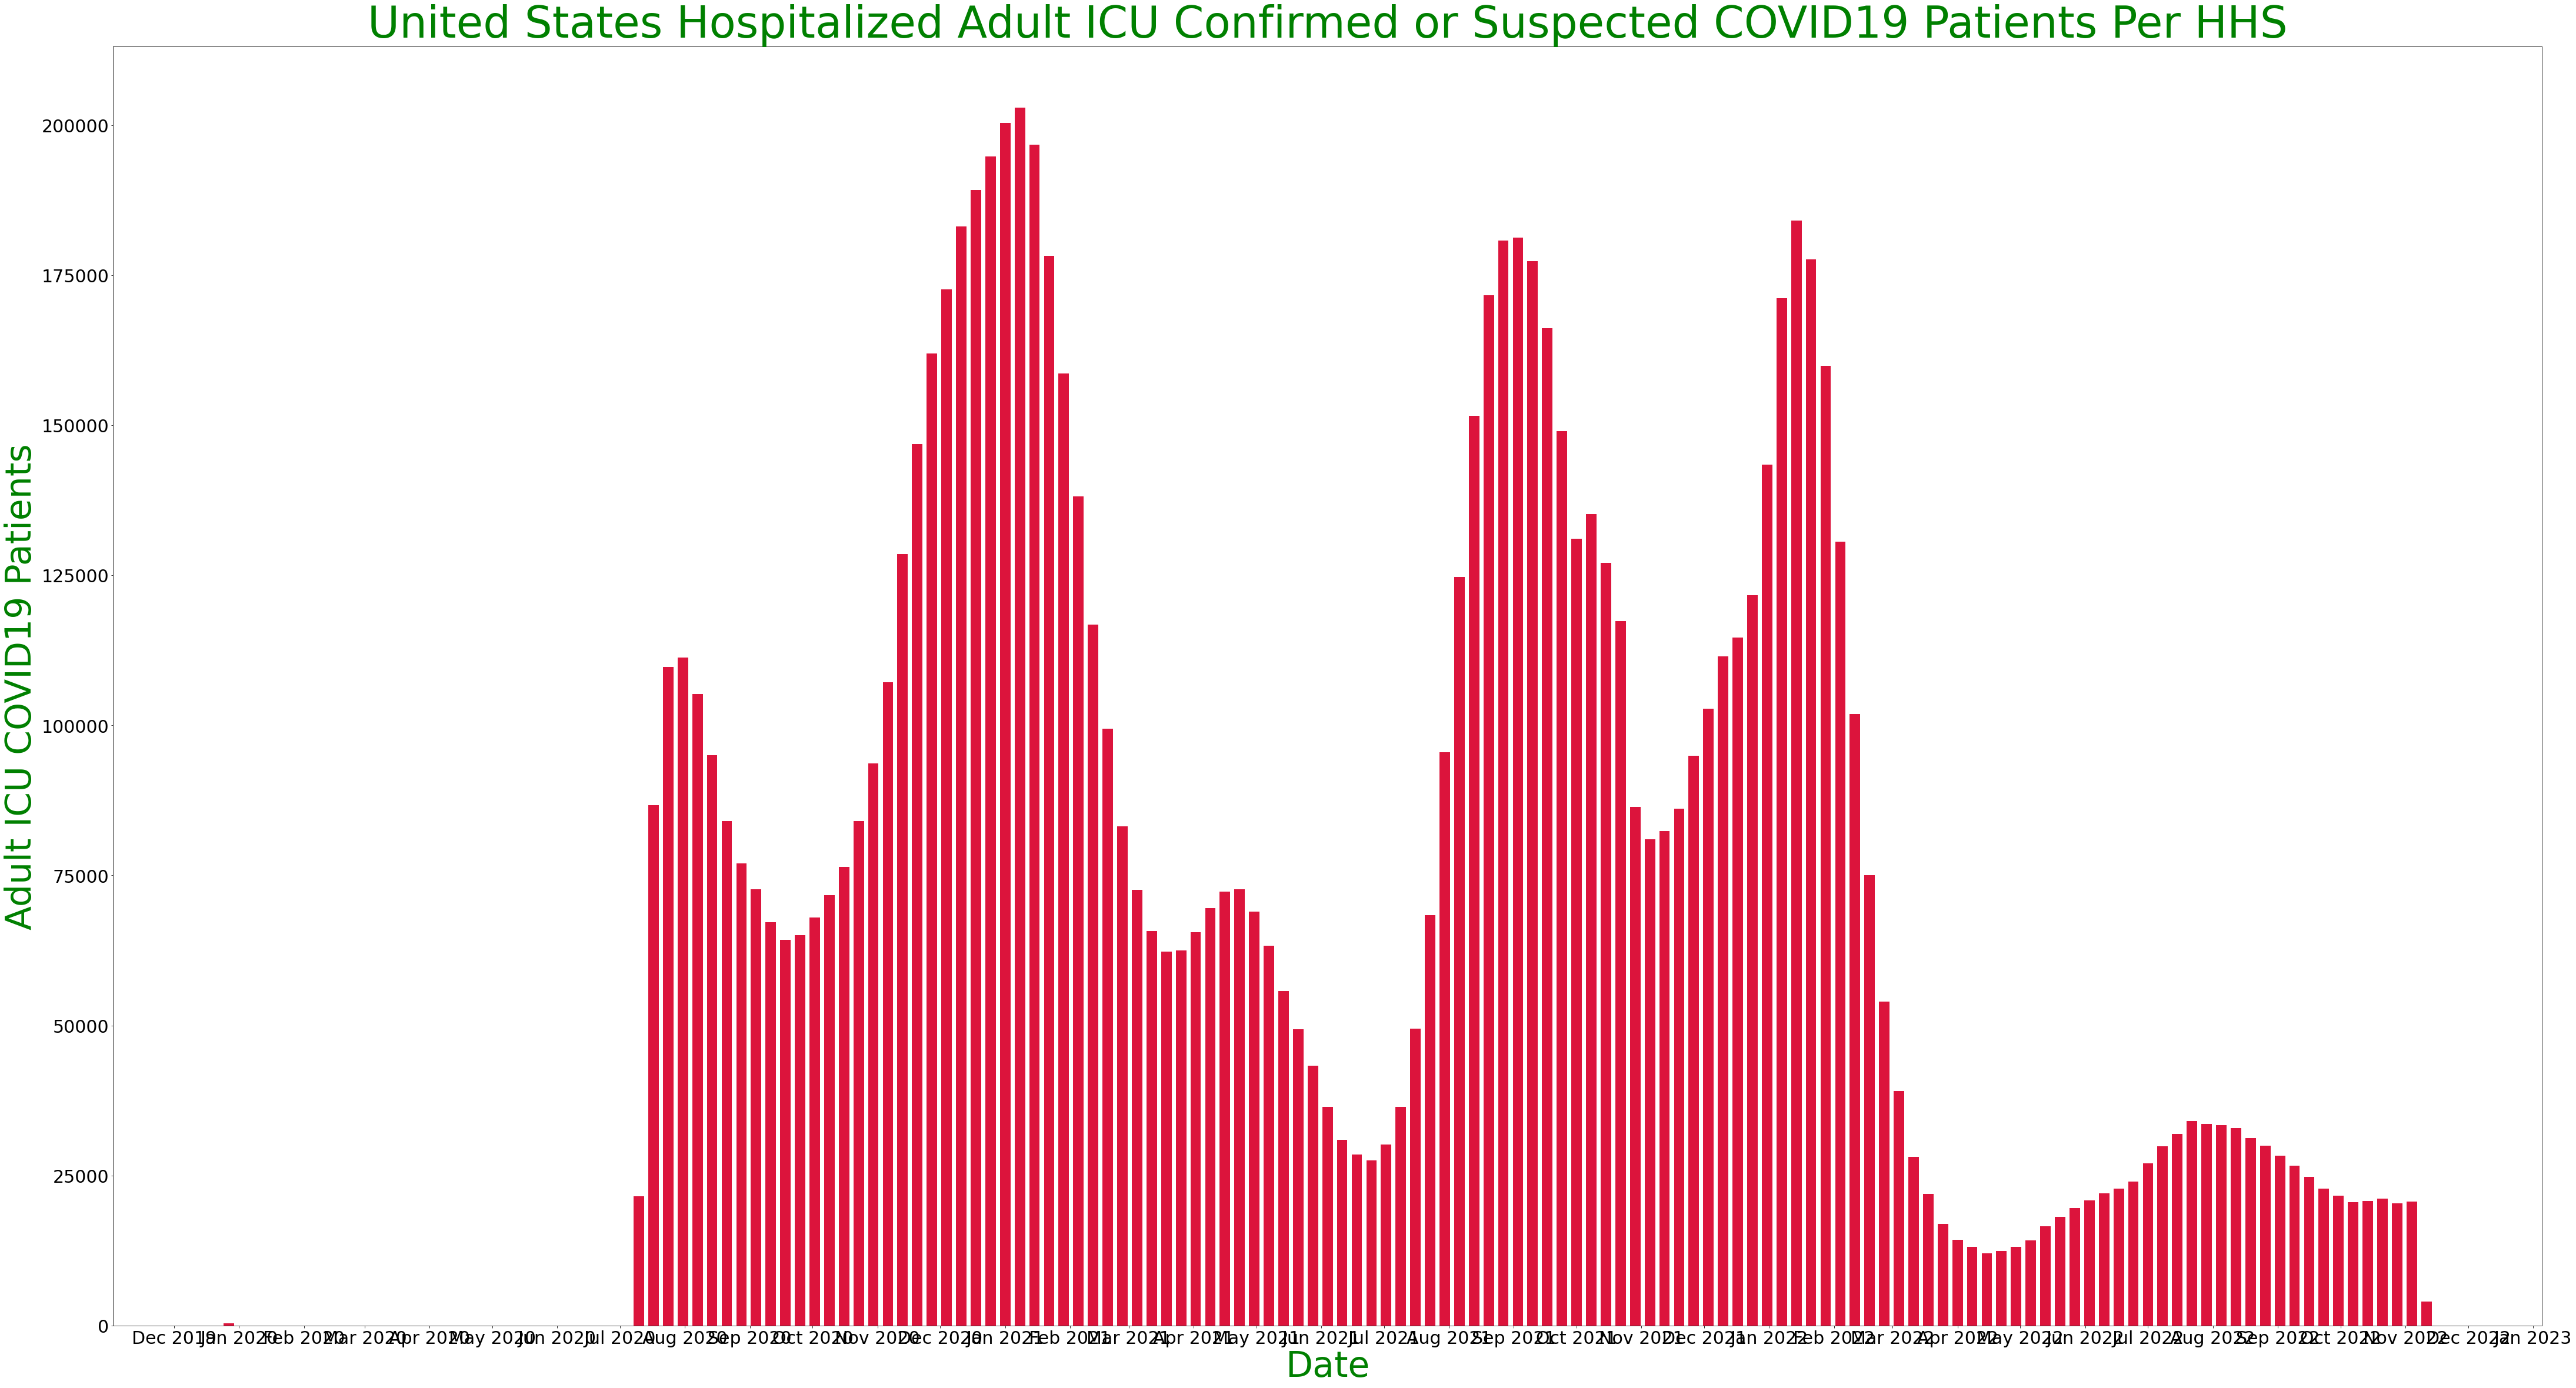

In [80]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('United States Hospitalized Adult ICU Confirmed or Suspected COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Adult ICU COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_us_adult_icu.date, df_us_adult_icu.adult_icu_count, color = 'crimson', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_US_Adult_ICU.png')

In [81]:
aaa = df_covid_hospital[df_covid_hospital.state == 'AL']
date_list = aaa.collection_week.unique()
date_list.sort()
al_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    al_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_al_ped = pd.DataFrame(al_ped_list, columns = ['date', 'ped_count'])

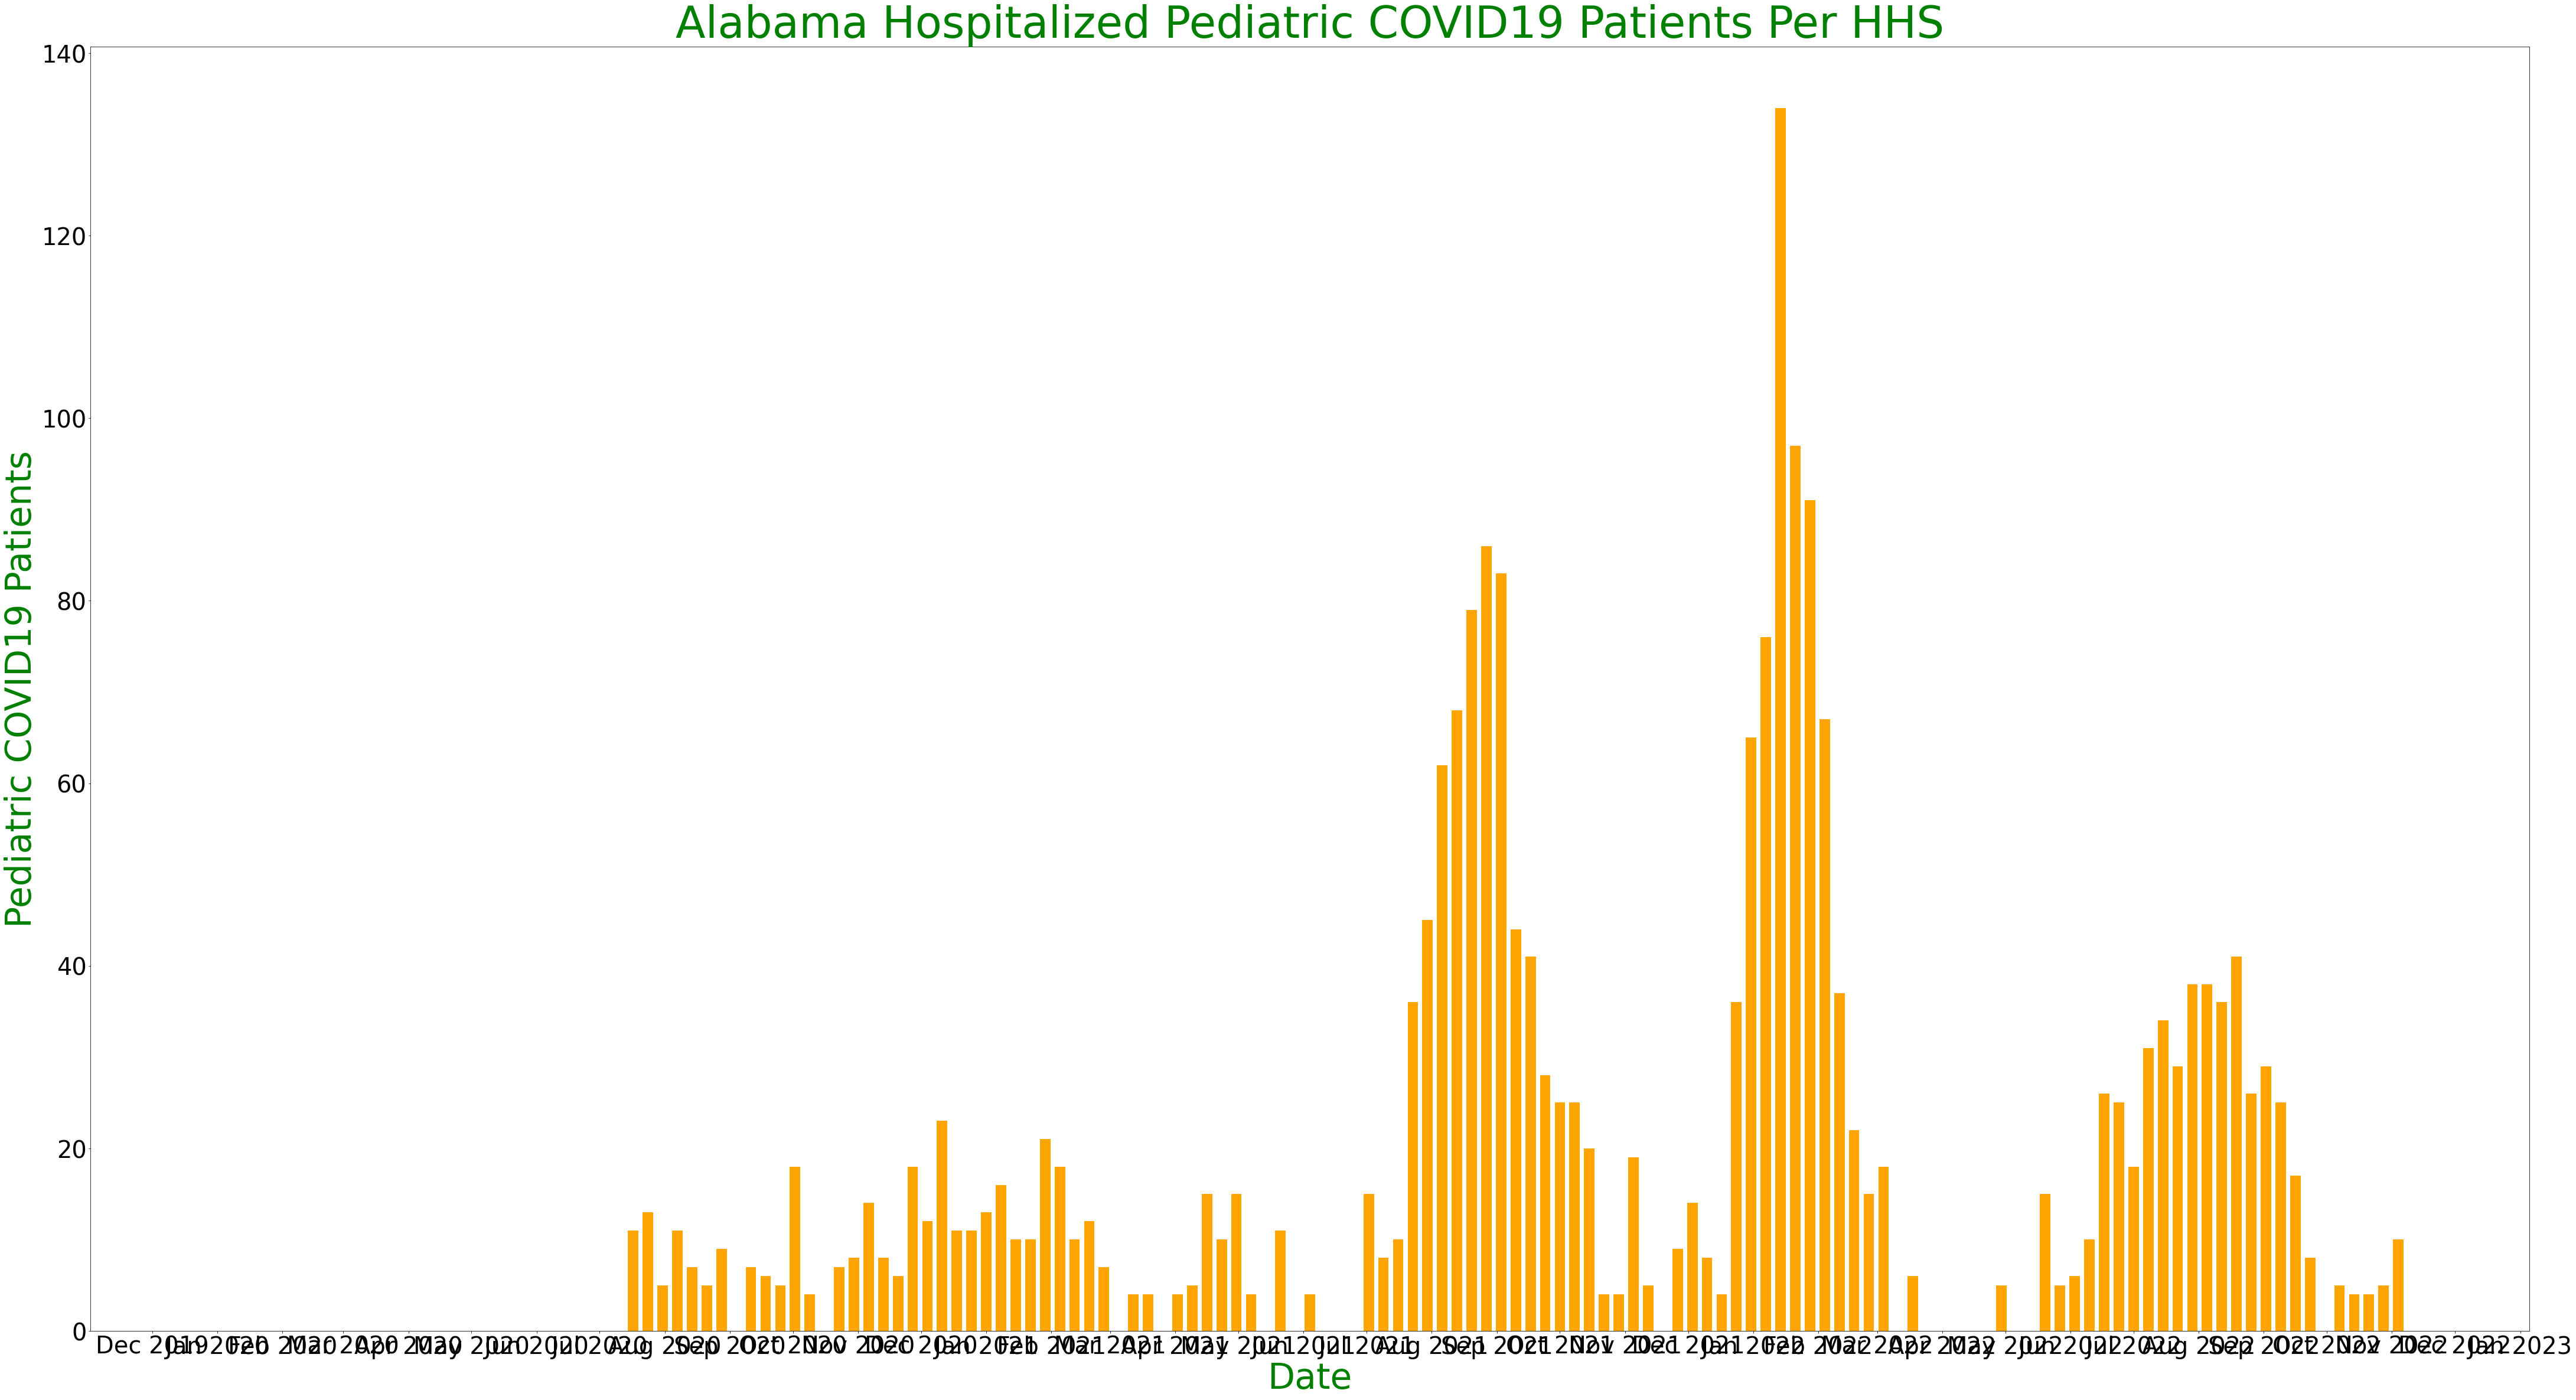

In [82]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=40)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Alabama Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_al_ped.date, df_al_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_AL_Pediatric.png')

In [83]:
aaa = df_covid_hospital[df_covid_hospital.state == 'IL']
date_list = aaa.collection_week.unique()
date_list.sort()
il_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    il_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_il_ped = pd.DataFrame(il_ped_list, columns = ['date', 'ped_count'])

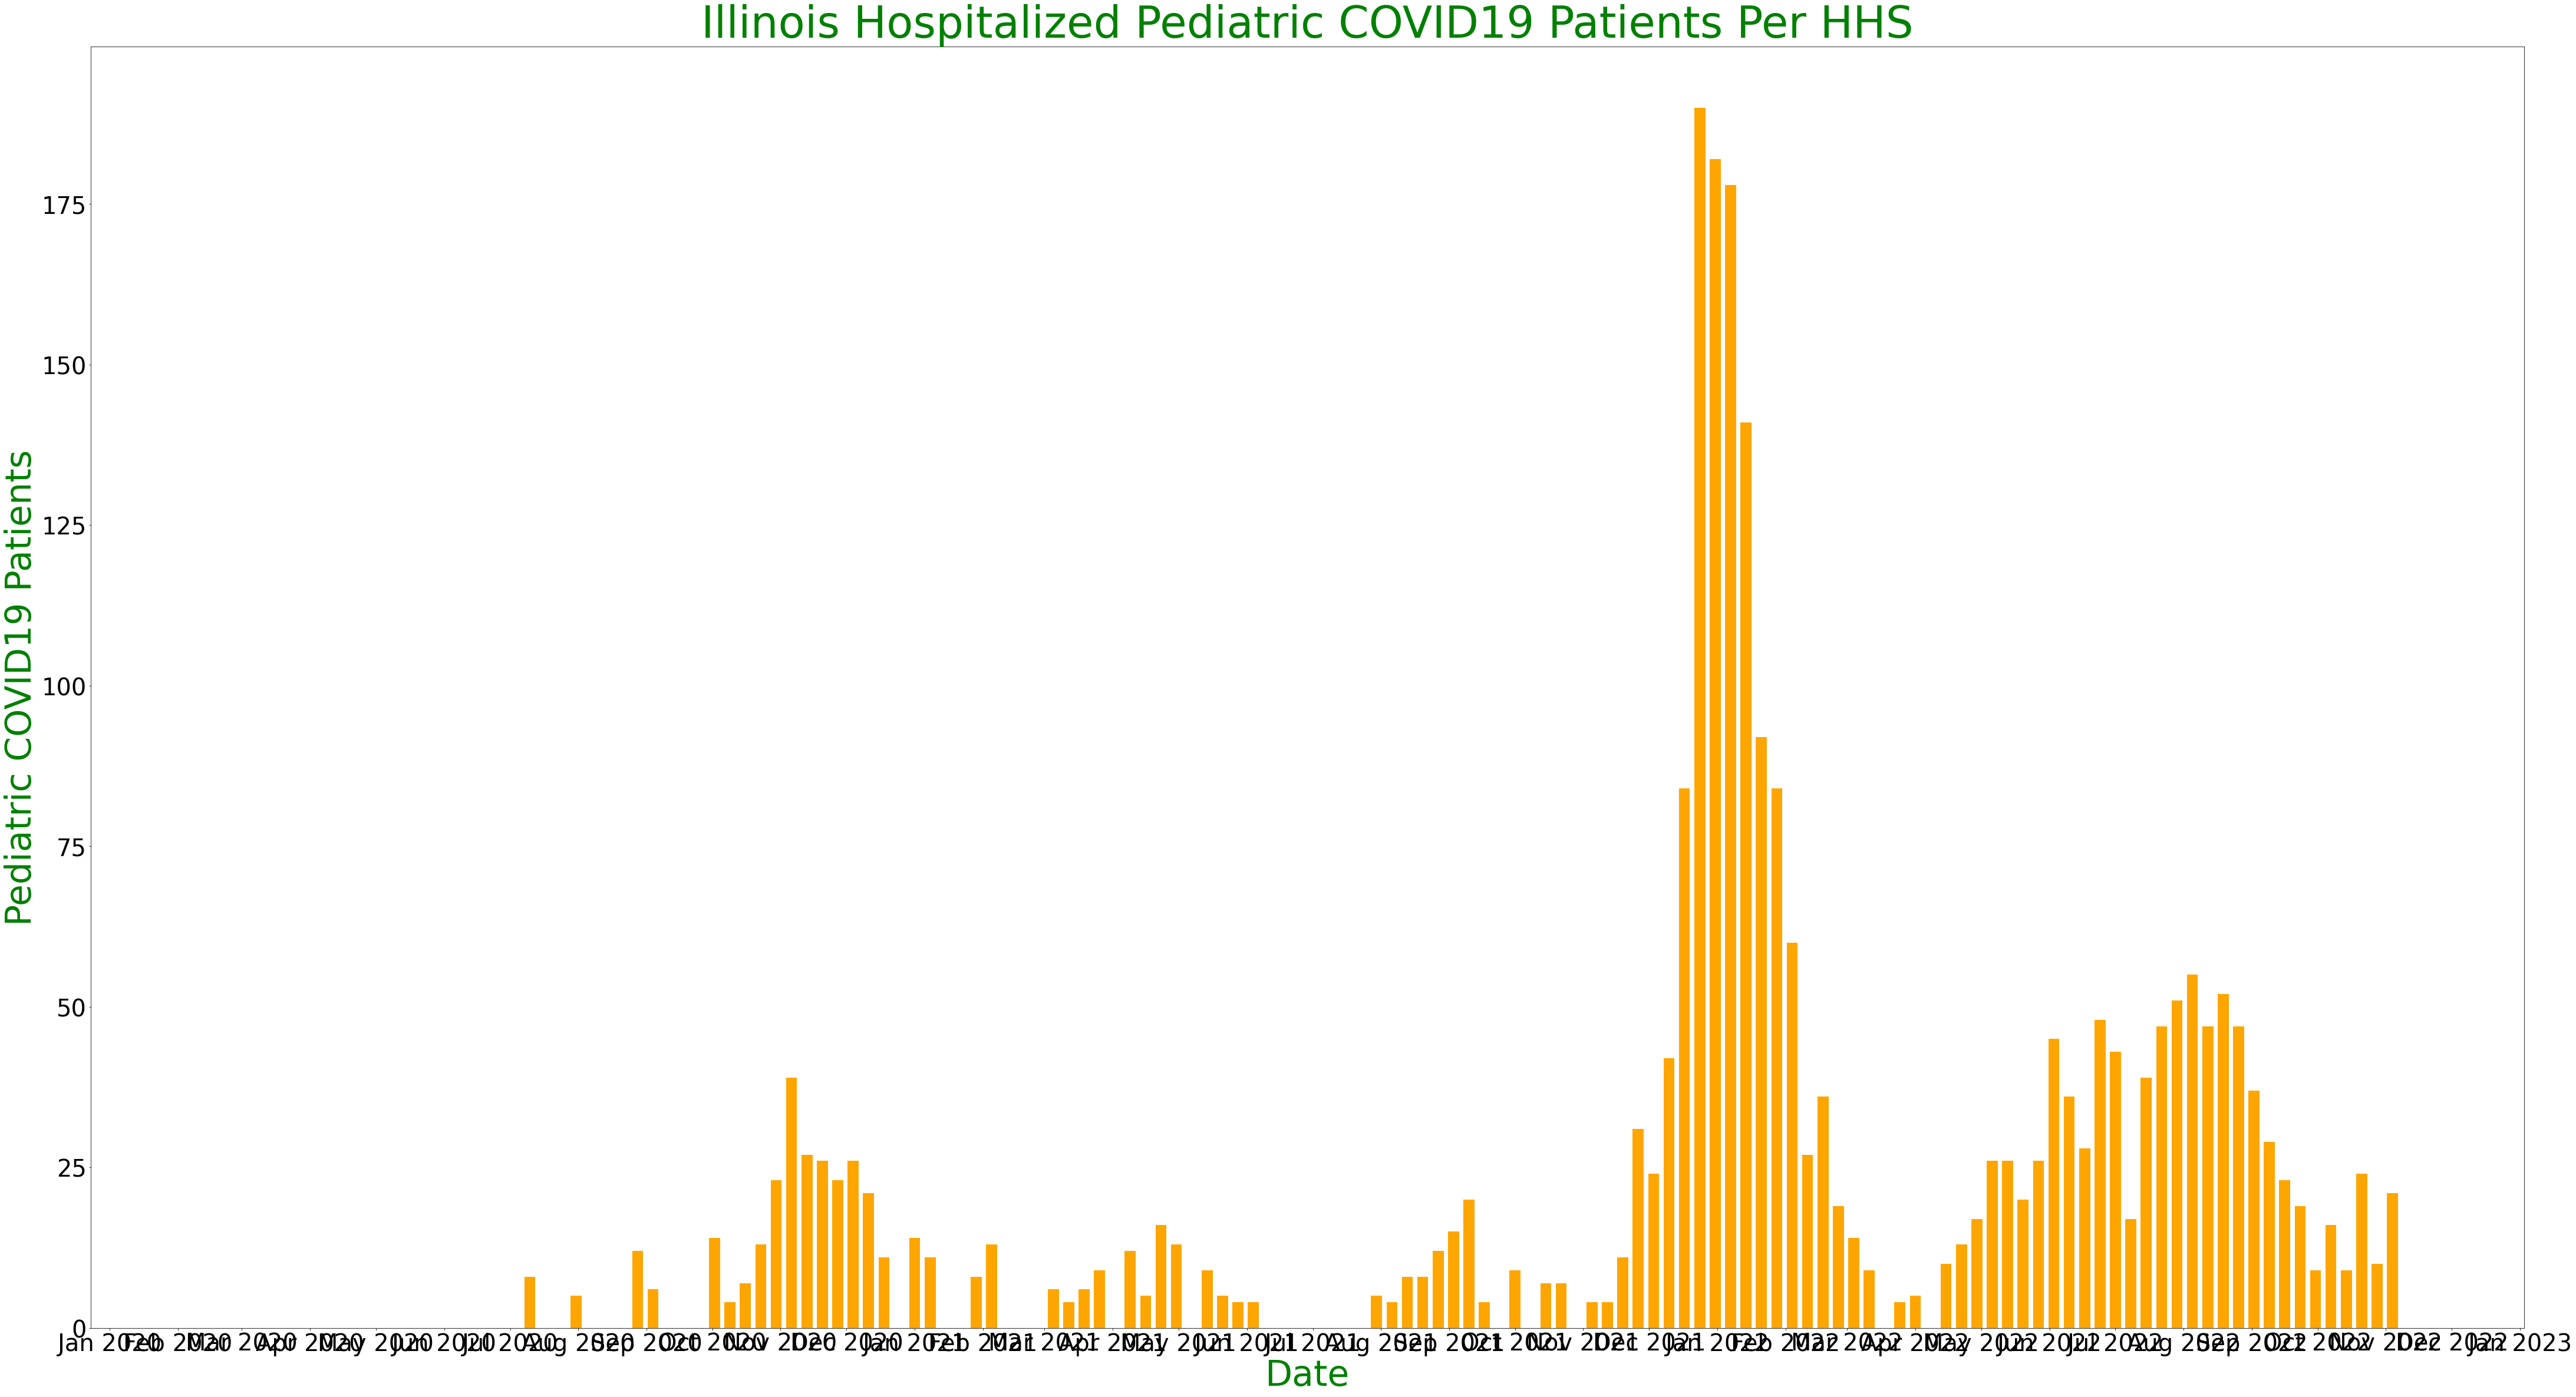

In [84]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=40)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Illinois Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_il_ped.date, df_il_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_IL_Pediatric.png')

In [85]:
aaa = df_covid_hospital[df_covid_hospital.state == 'AK']
date_list = aaa.collection_week.unique()
date_list.sort()
ak_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    ak_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_ak_ped = pd.DataFrame(ak_ped_list, columns = ['date', 'ped_count'])

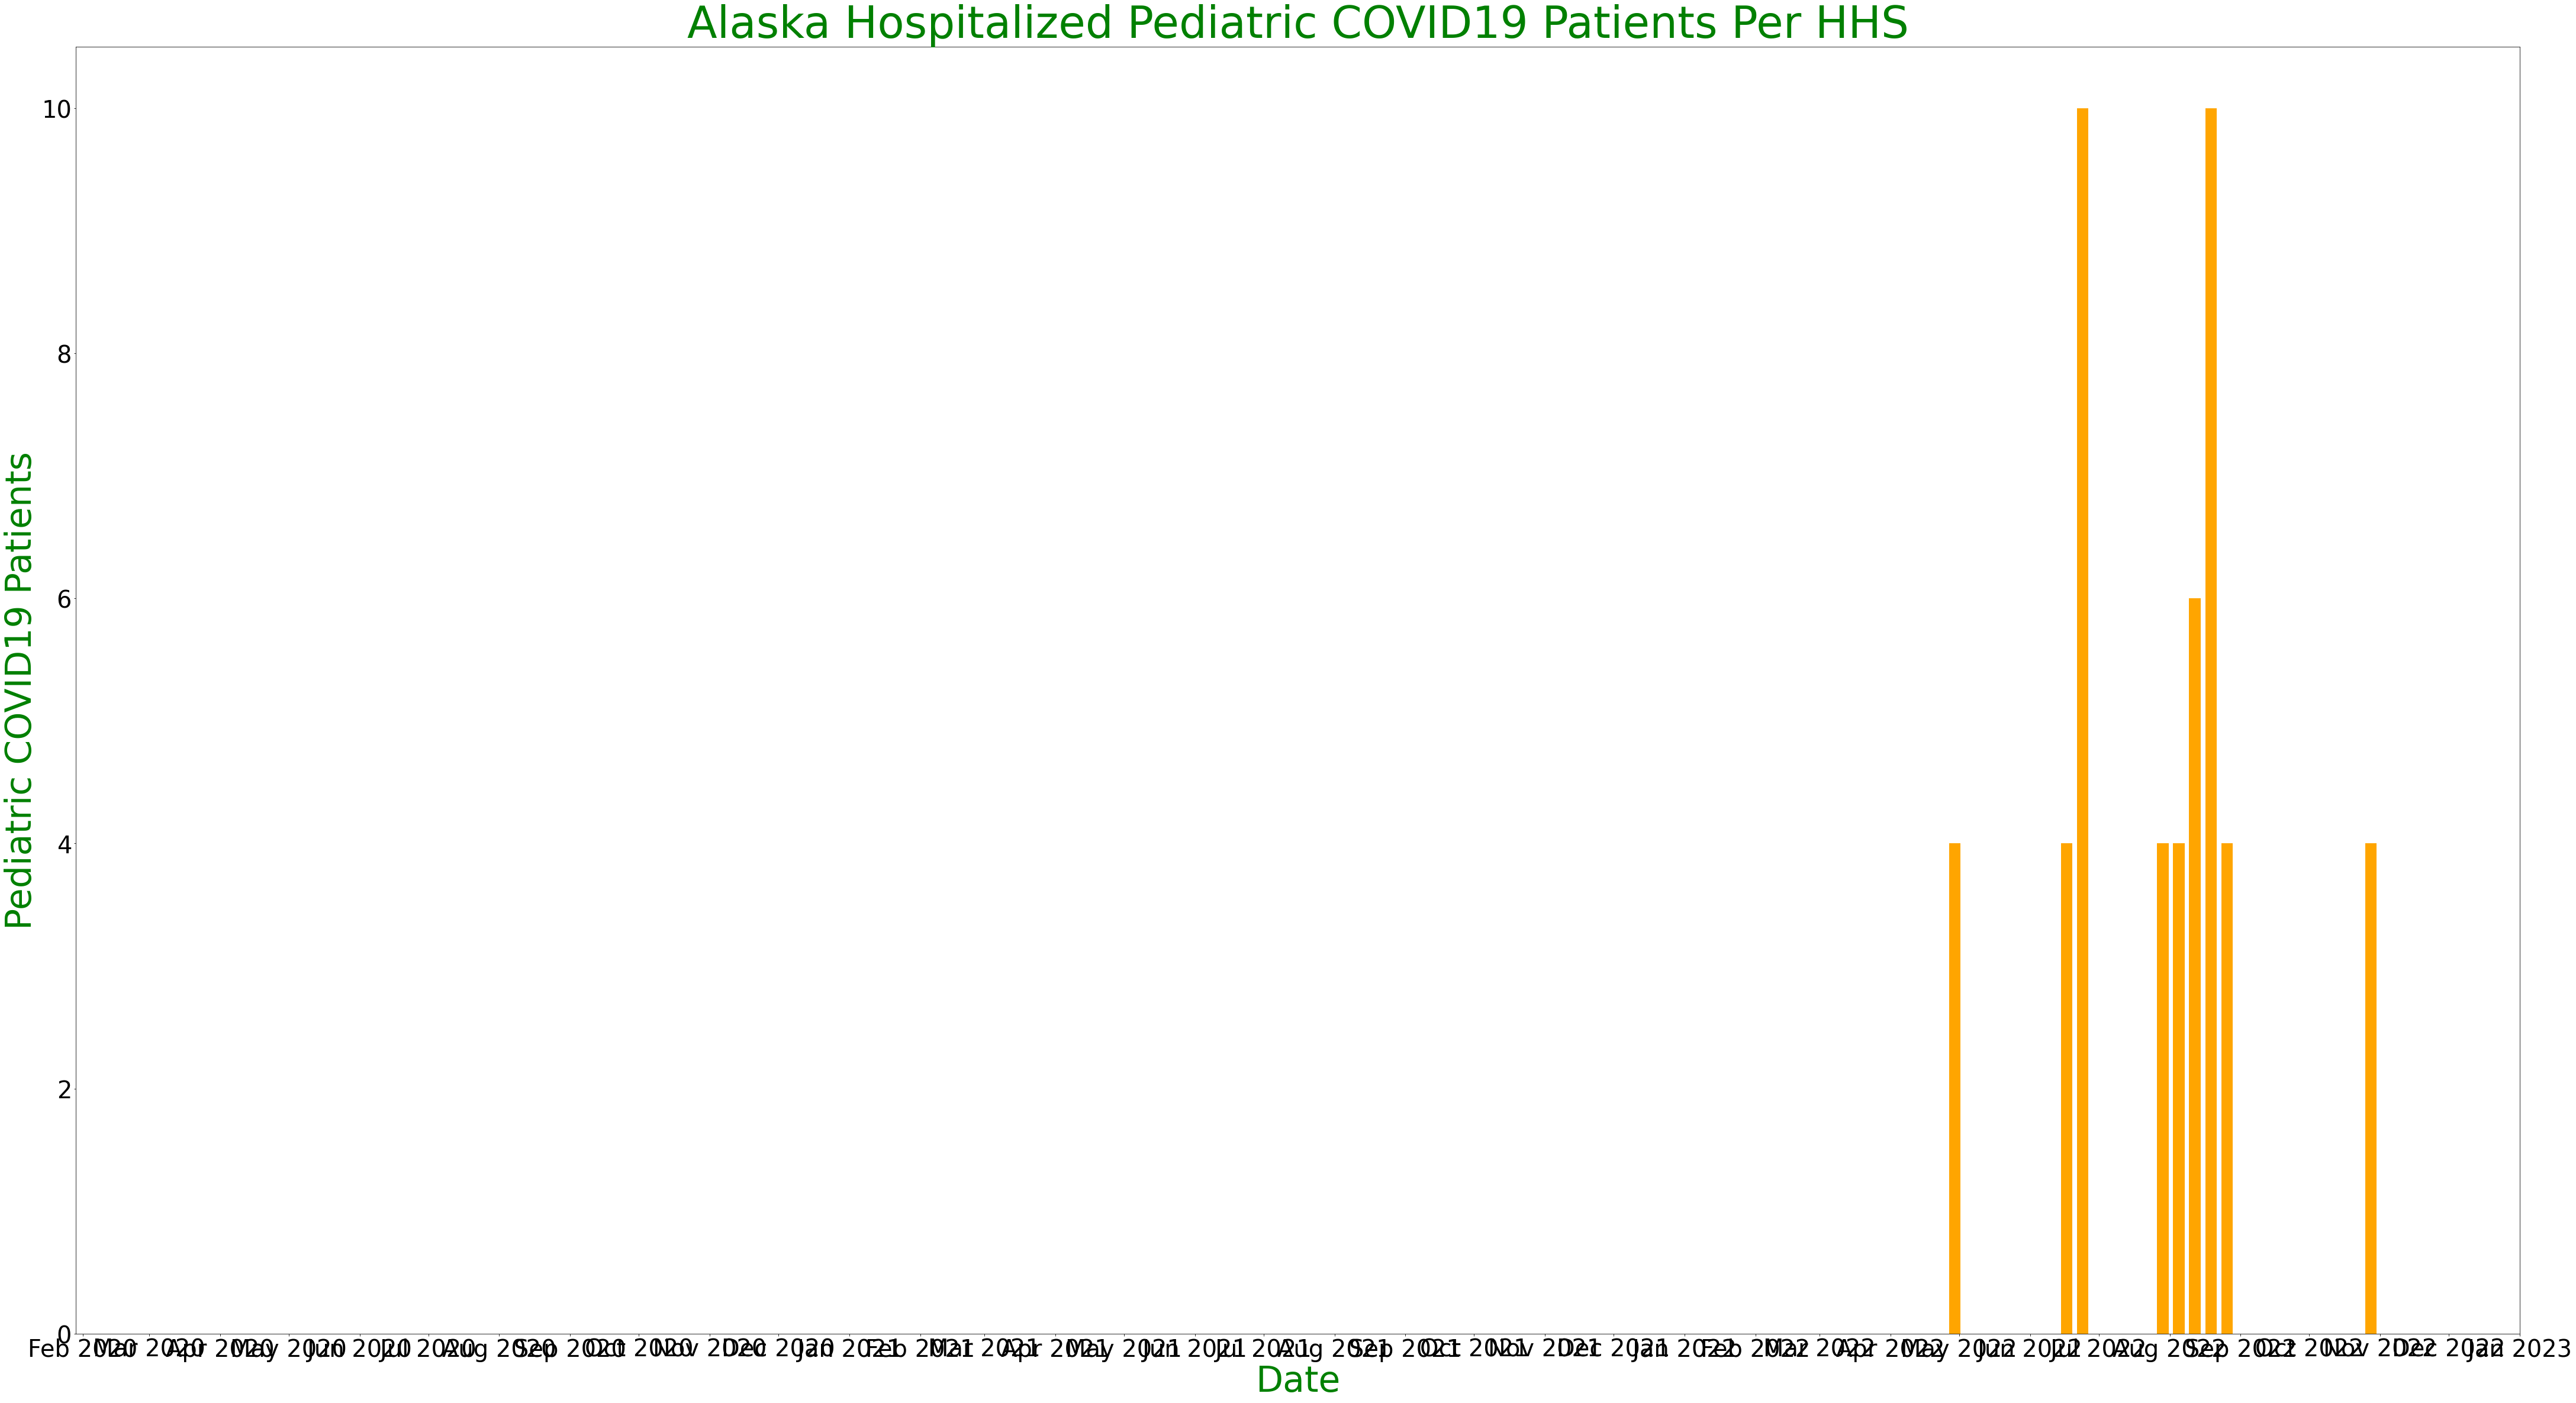

In [86]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=40)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Alaska Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_ak_ped.date, df_ak_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_AK_Pediatric.png')

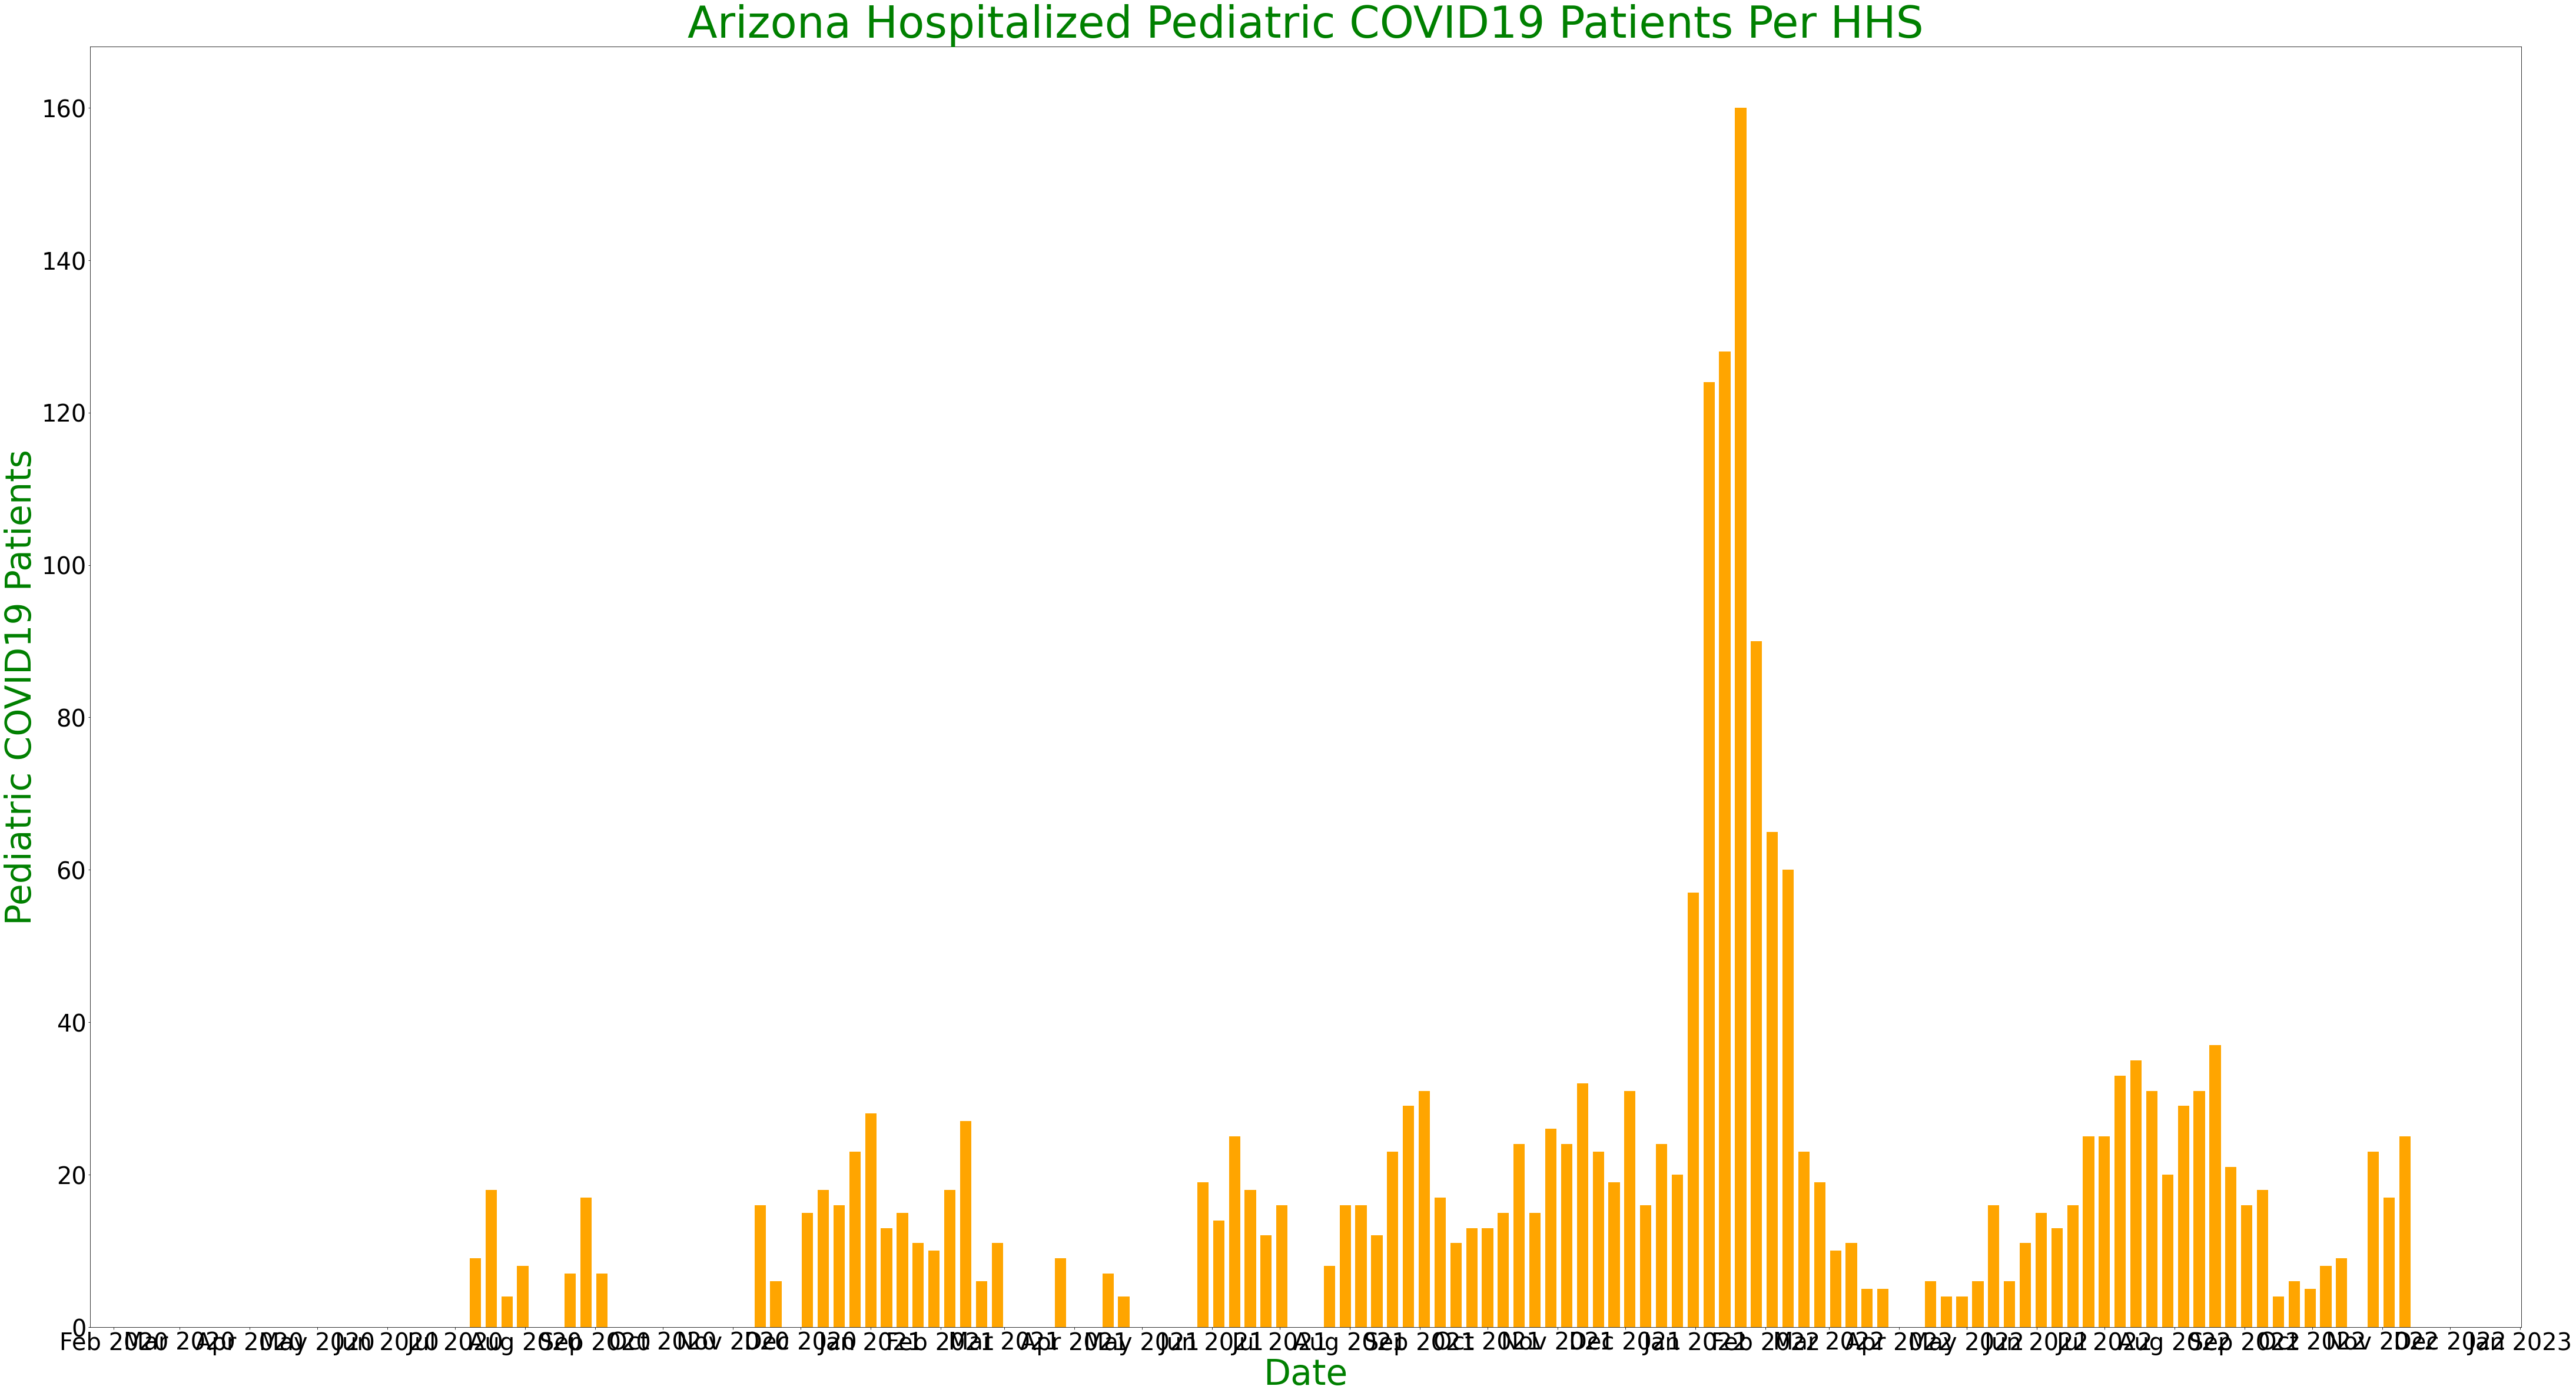

In [87]:
aaa = df_covid_hospital[df_covid_hospital.state == 'AZ']
date_list = aaa.collection_week.unique()
date_list.sort()
az_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    az_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_az_ped = pd.DataFrame(az_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=40)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Arizona Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_az_ped.date, df_az_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_AZ_Pediatric.png')

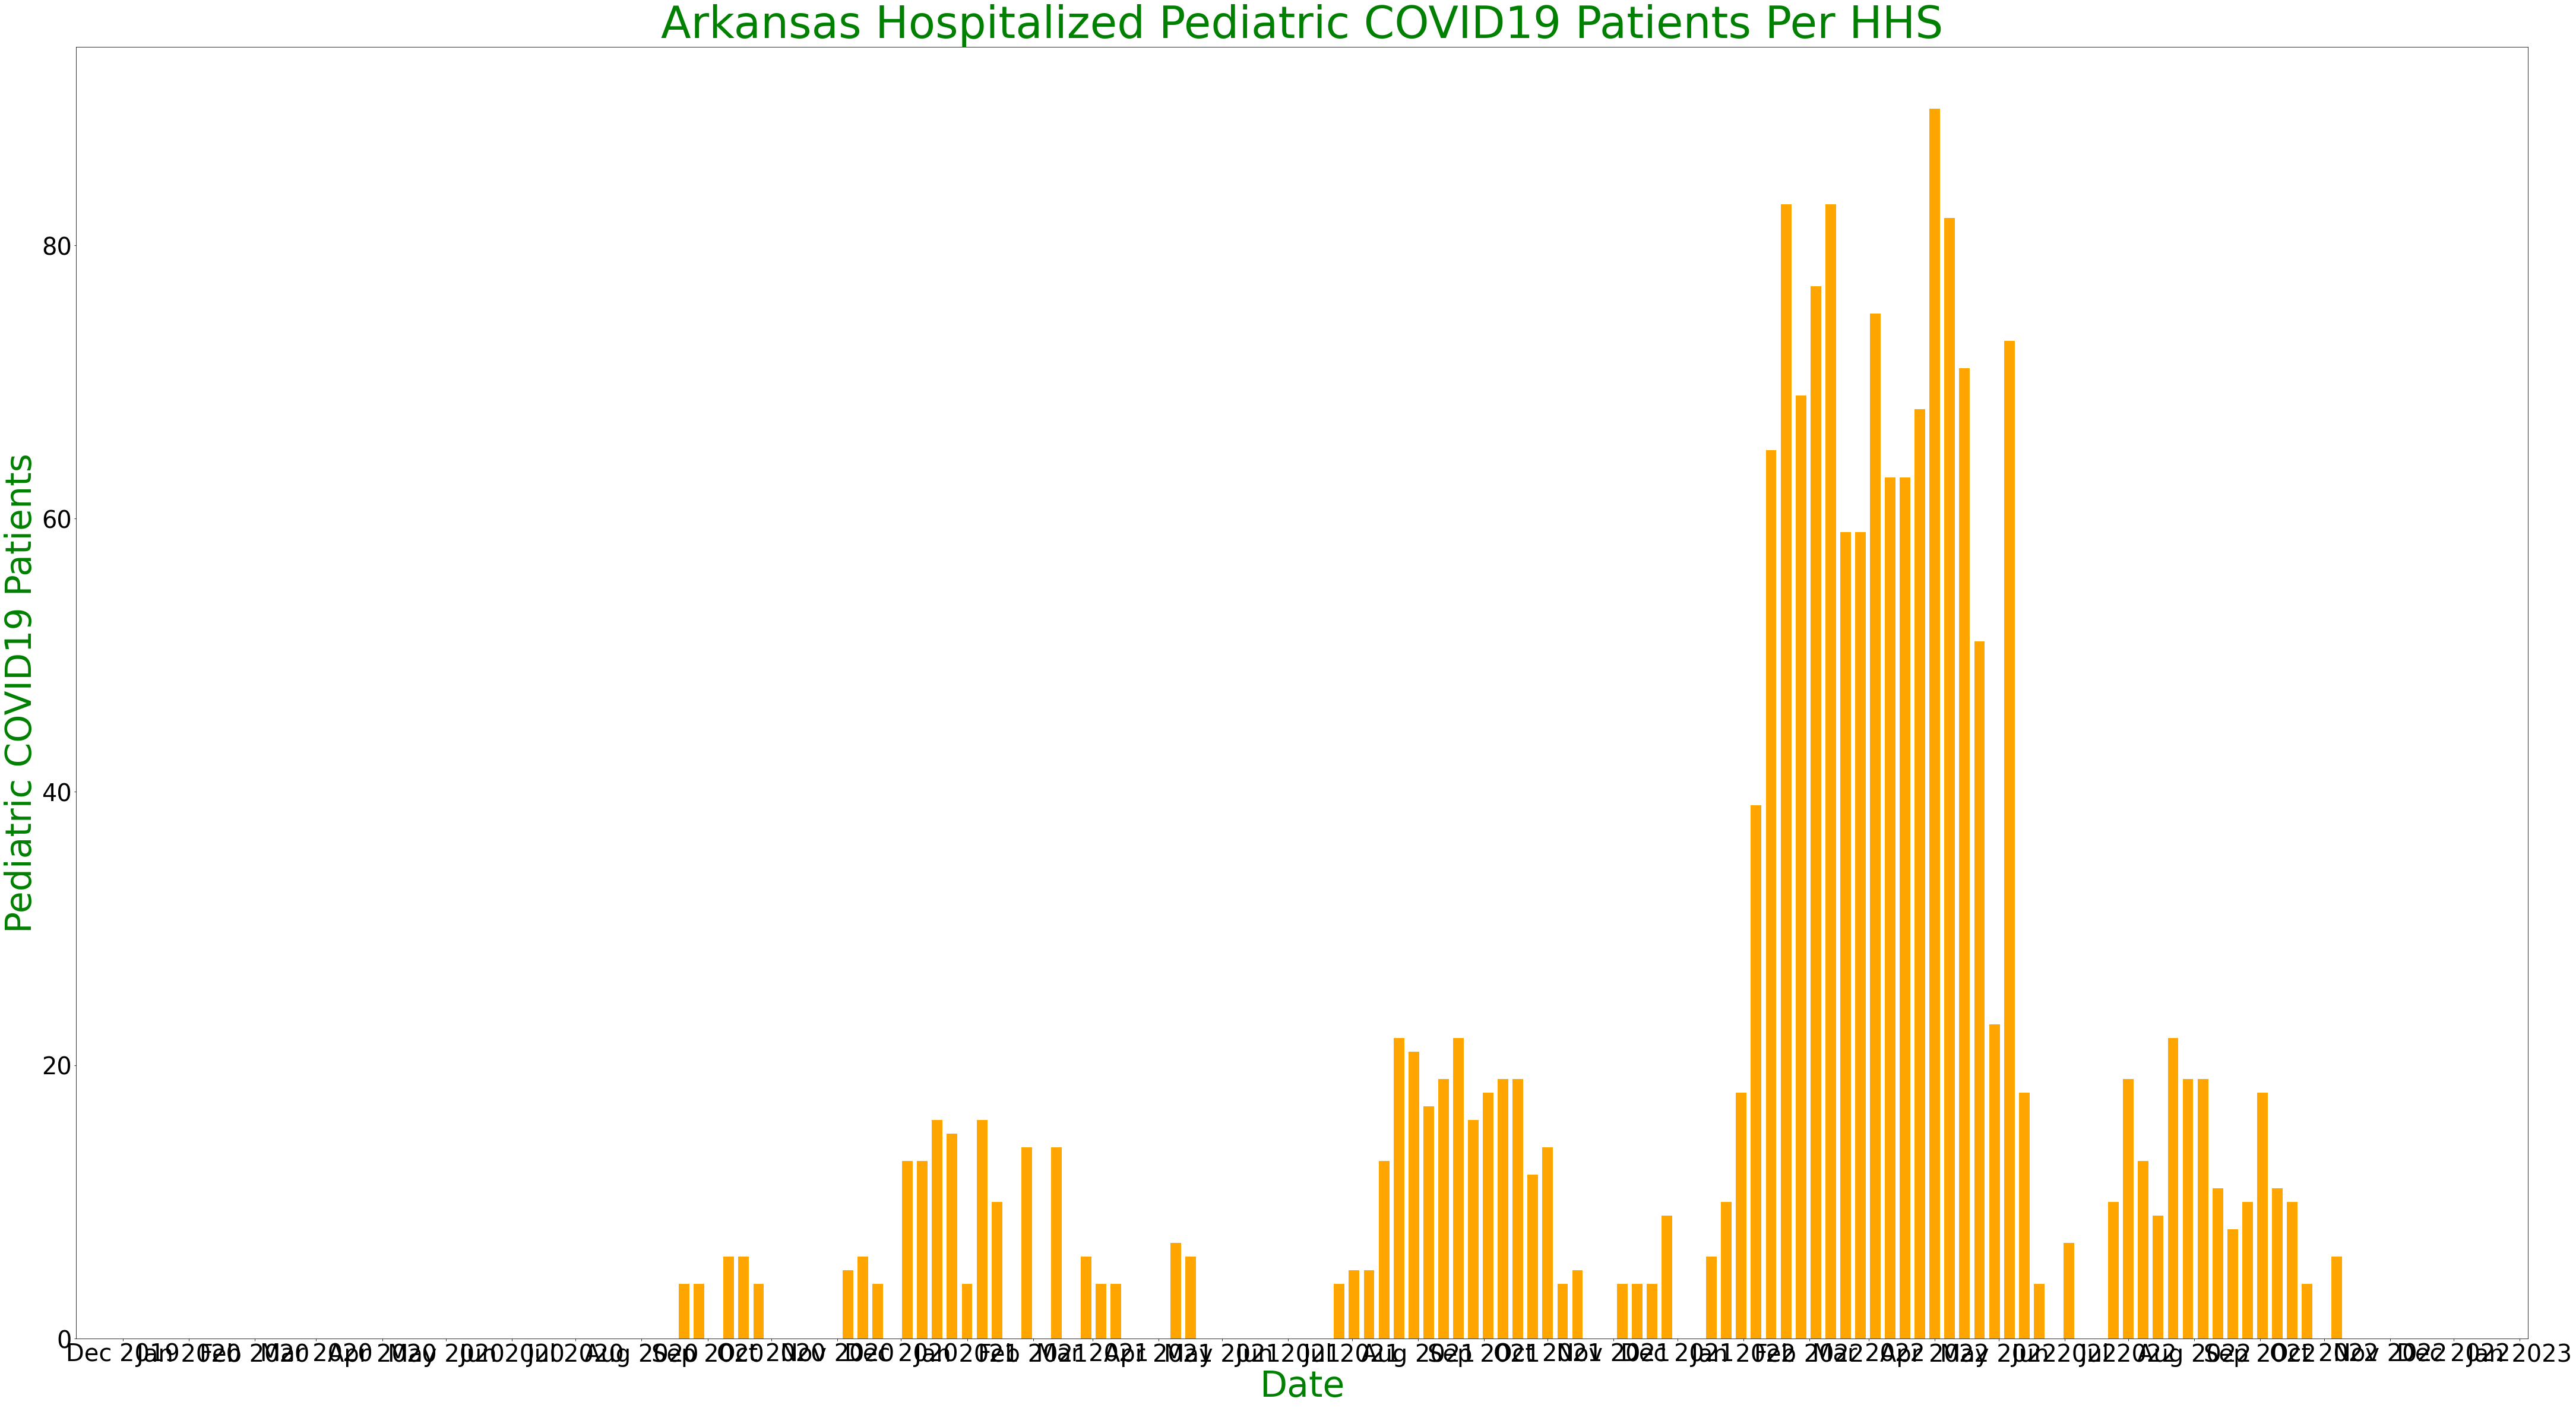

In [88]:
aaa = df_covid_hospital[df_covid_hospital.state == 'AR']
date_list = aaa.collection_week.unique()
date_list.sort()
ar_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    ar_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_ar_ped = pd.DataFrame(ar_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=40)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Arkansas Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_ar_ped.date, df_ar_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_AR_Pediatric.png')

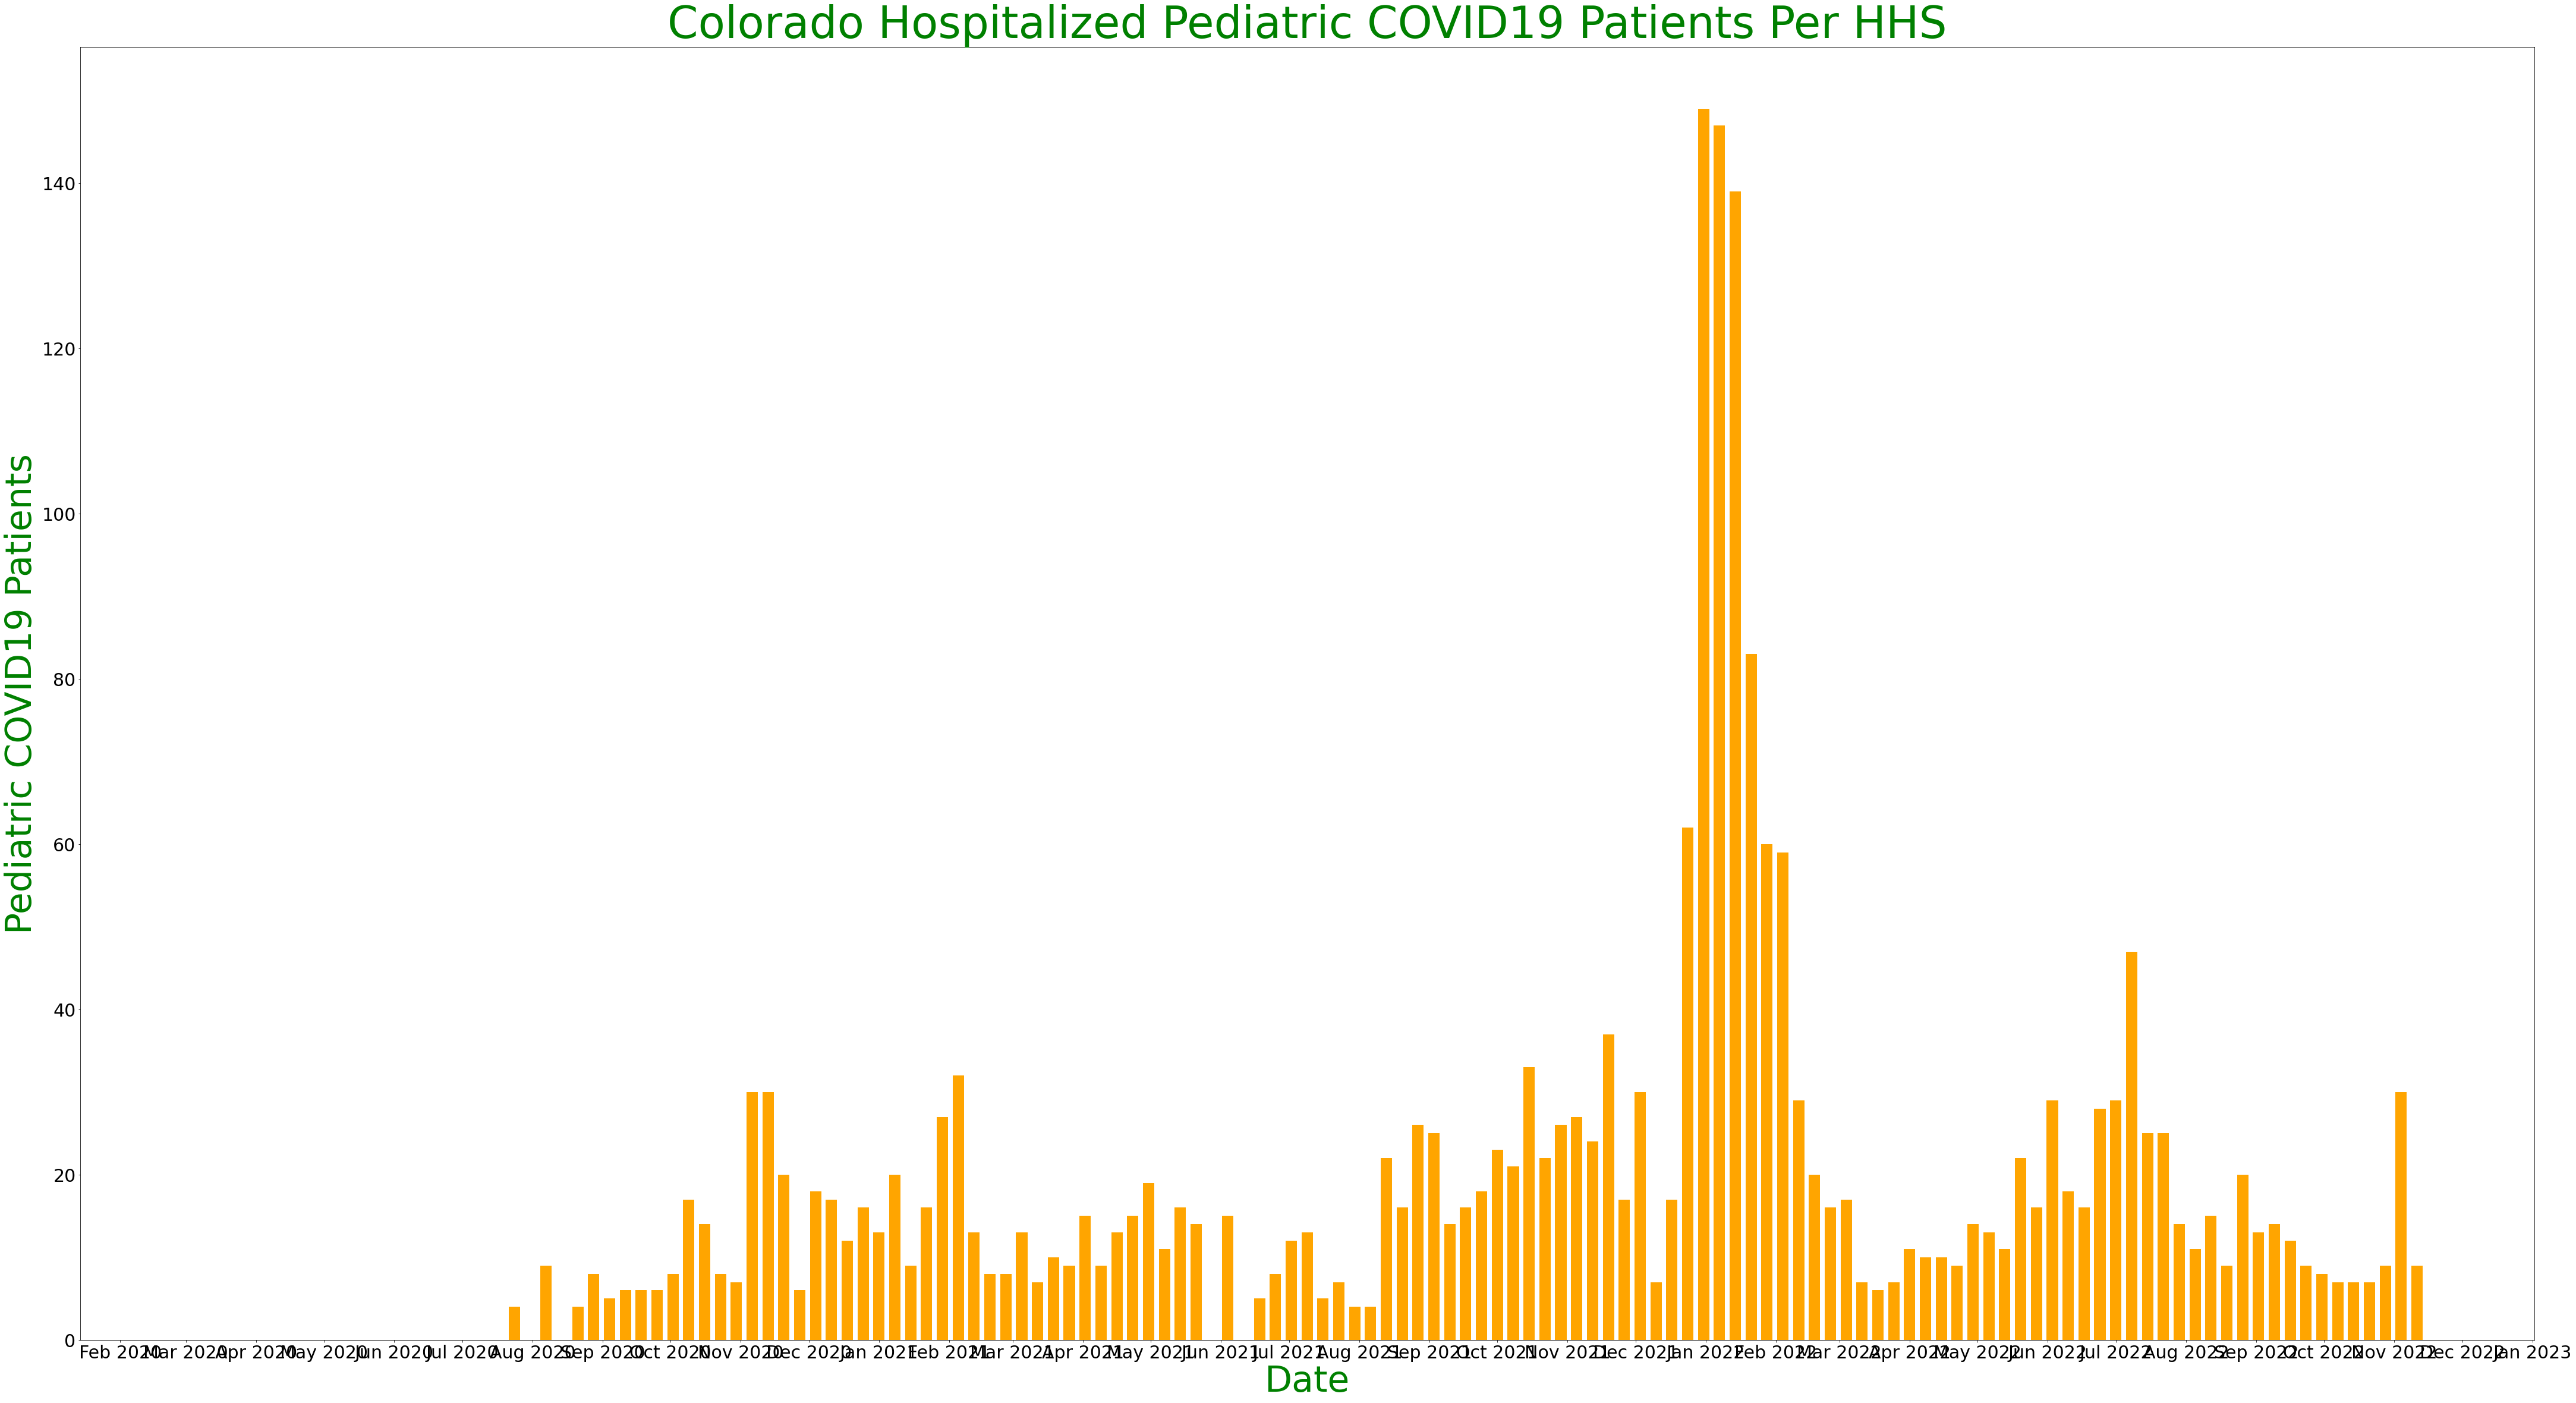

In [89]:
aaa = df_covid_hospital[df_covid_hospital.state == 'CO']
date_list = aaa.collection_week.unique()
date_list.sort()
co_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    co_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_co_ped = pd.DataFrame(co_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Colorado Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_co_ped.date, df_co_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_CO_Pediatric.png')

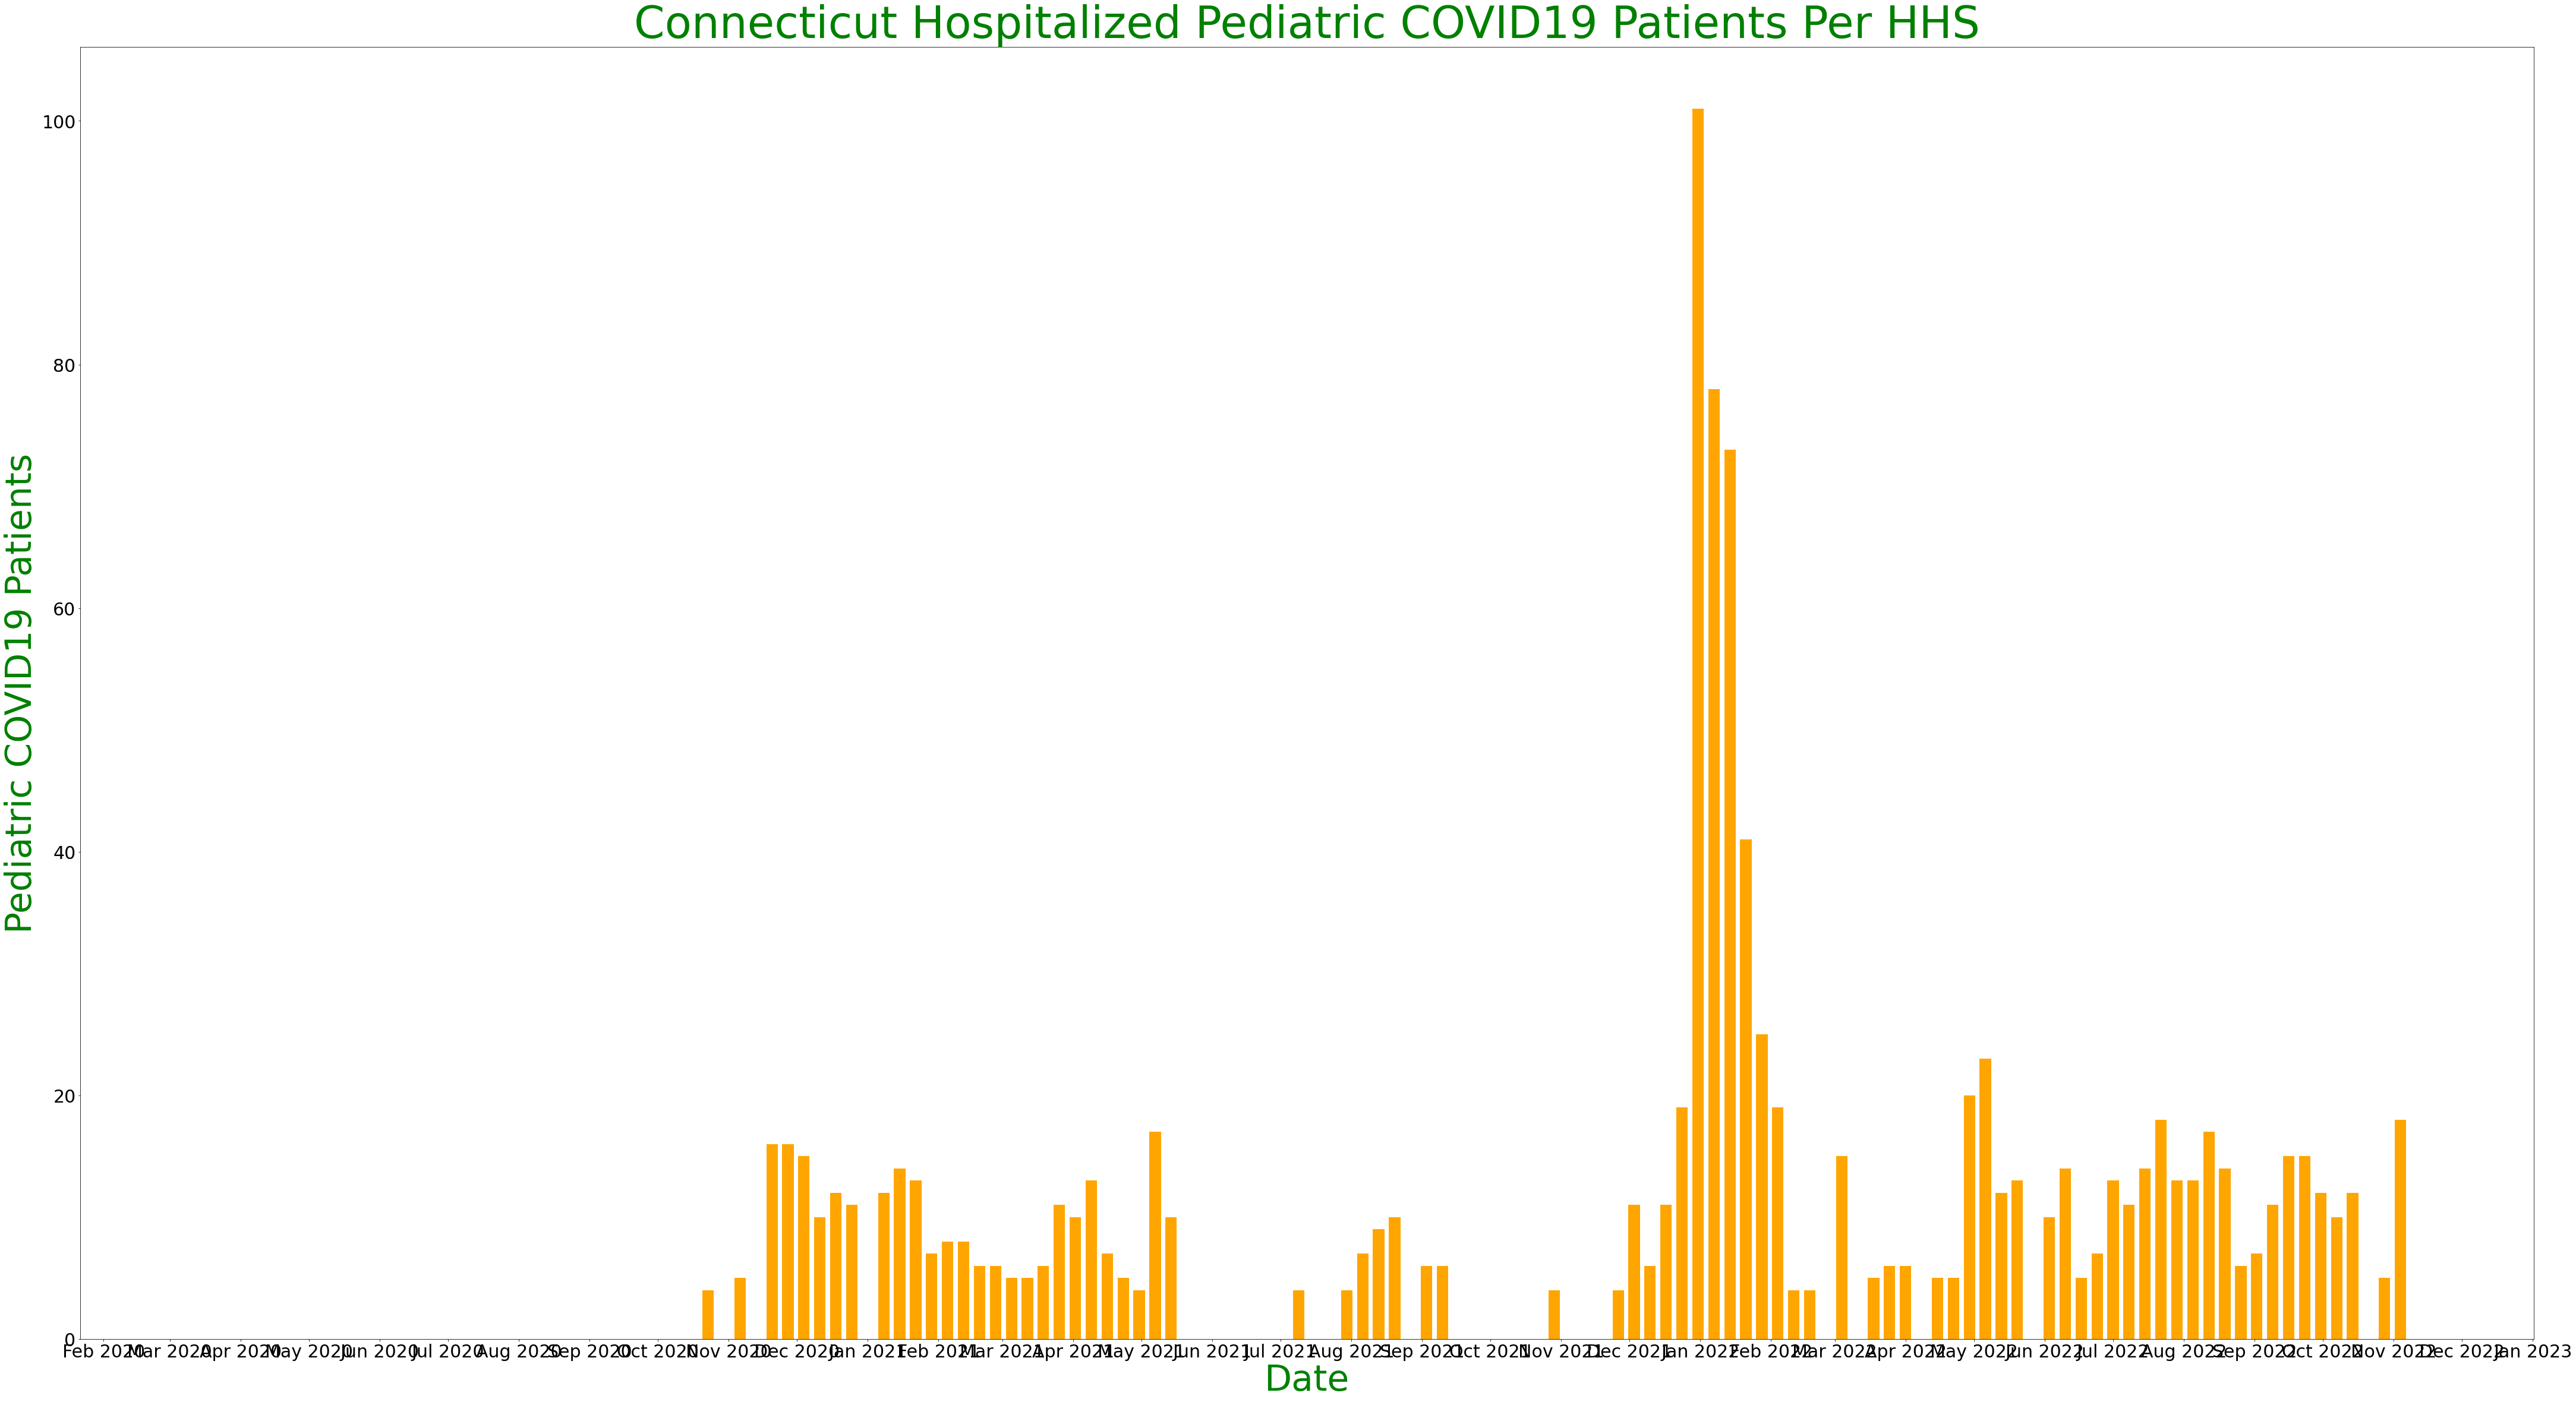

In [90]:
aaa = df_covid_hospital[df_covid_hospital.state == 'CT']
date_list = aaa.collection_week.unique()
date_list.sort()
ct_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    ct_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_ct_ped = pd.DataFrame(ct_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Connecticut Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_ct_ped.date, df_ct_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_CT_Pediatric.png')

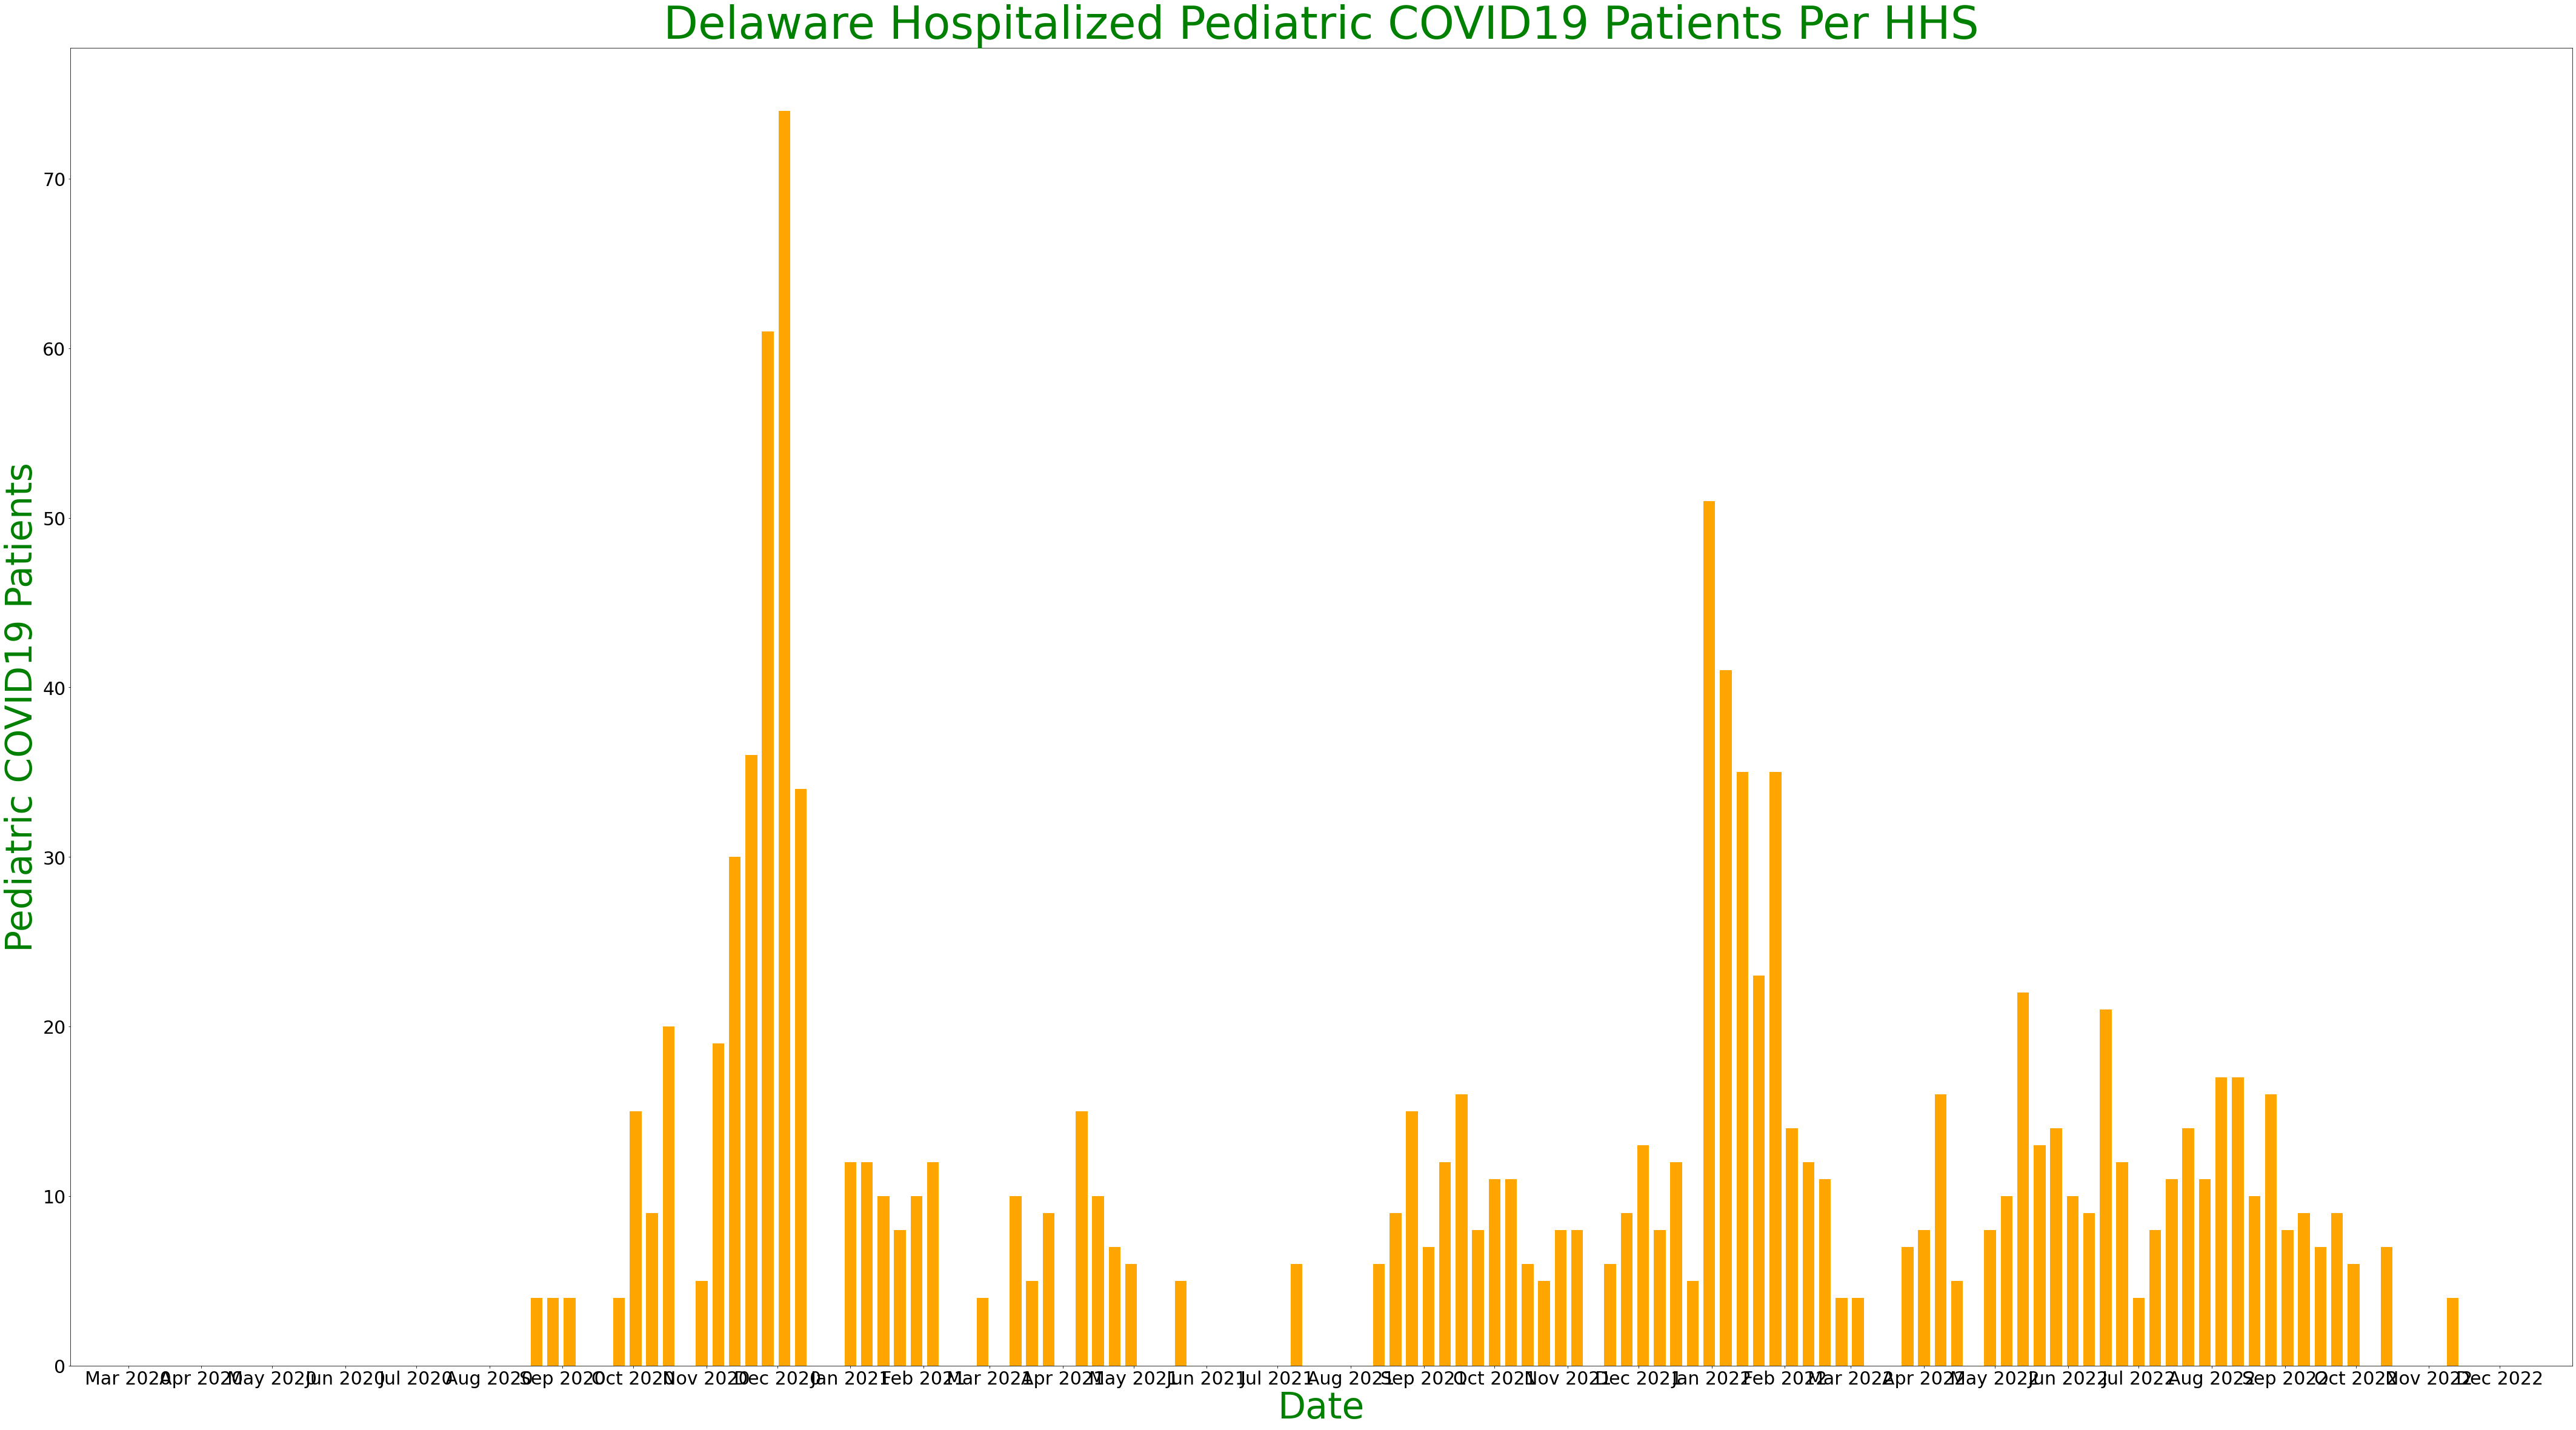

In [91]:
aaa = df_covid_hospital[df_covid_hospital.state == 'DE']
date_list = aaa.collection_week.unique()
date_list.sort()
de_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    de_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_de_ped = pd.DataFrame(de_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Delaware Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_de_ped.date, df_de_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_DE_Pediatric.png')

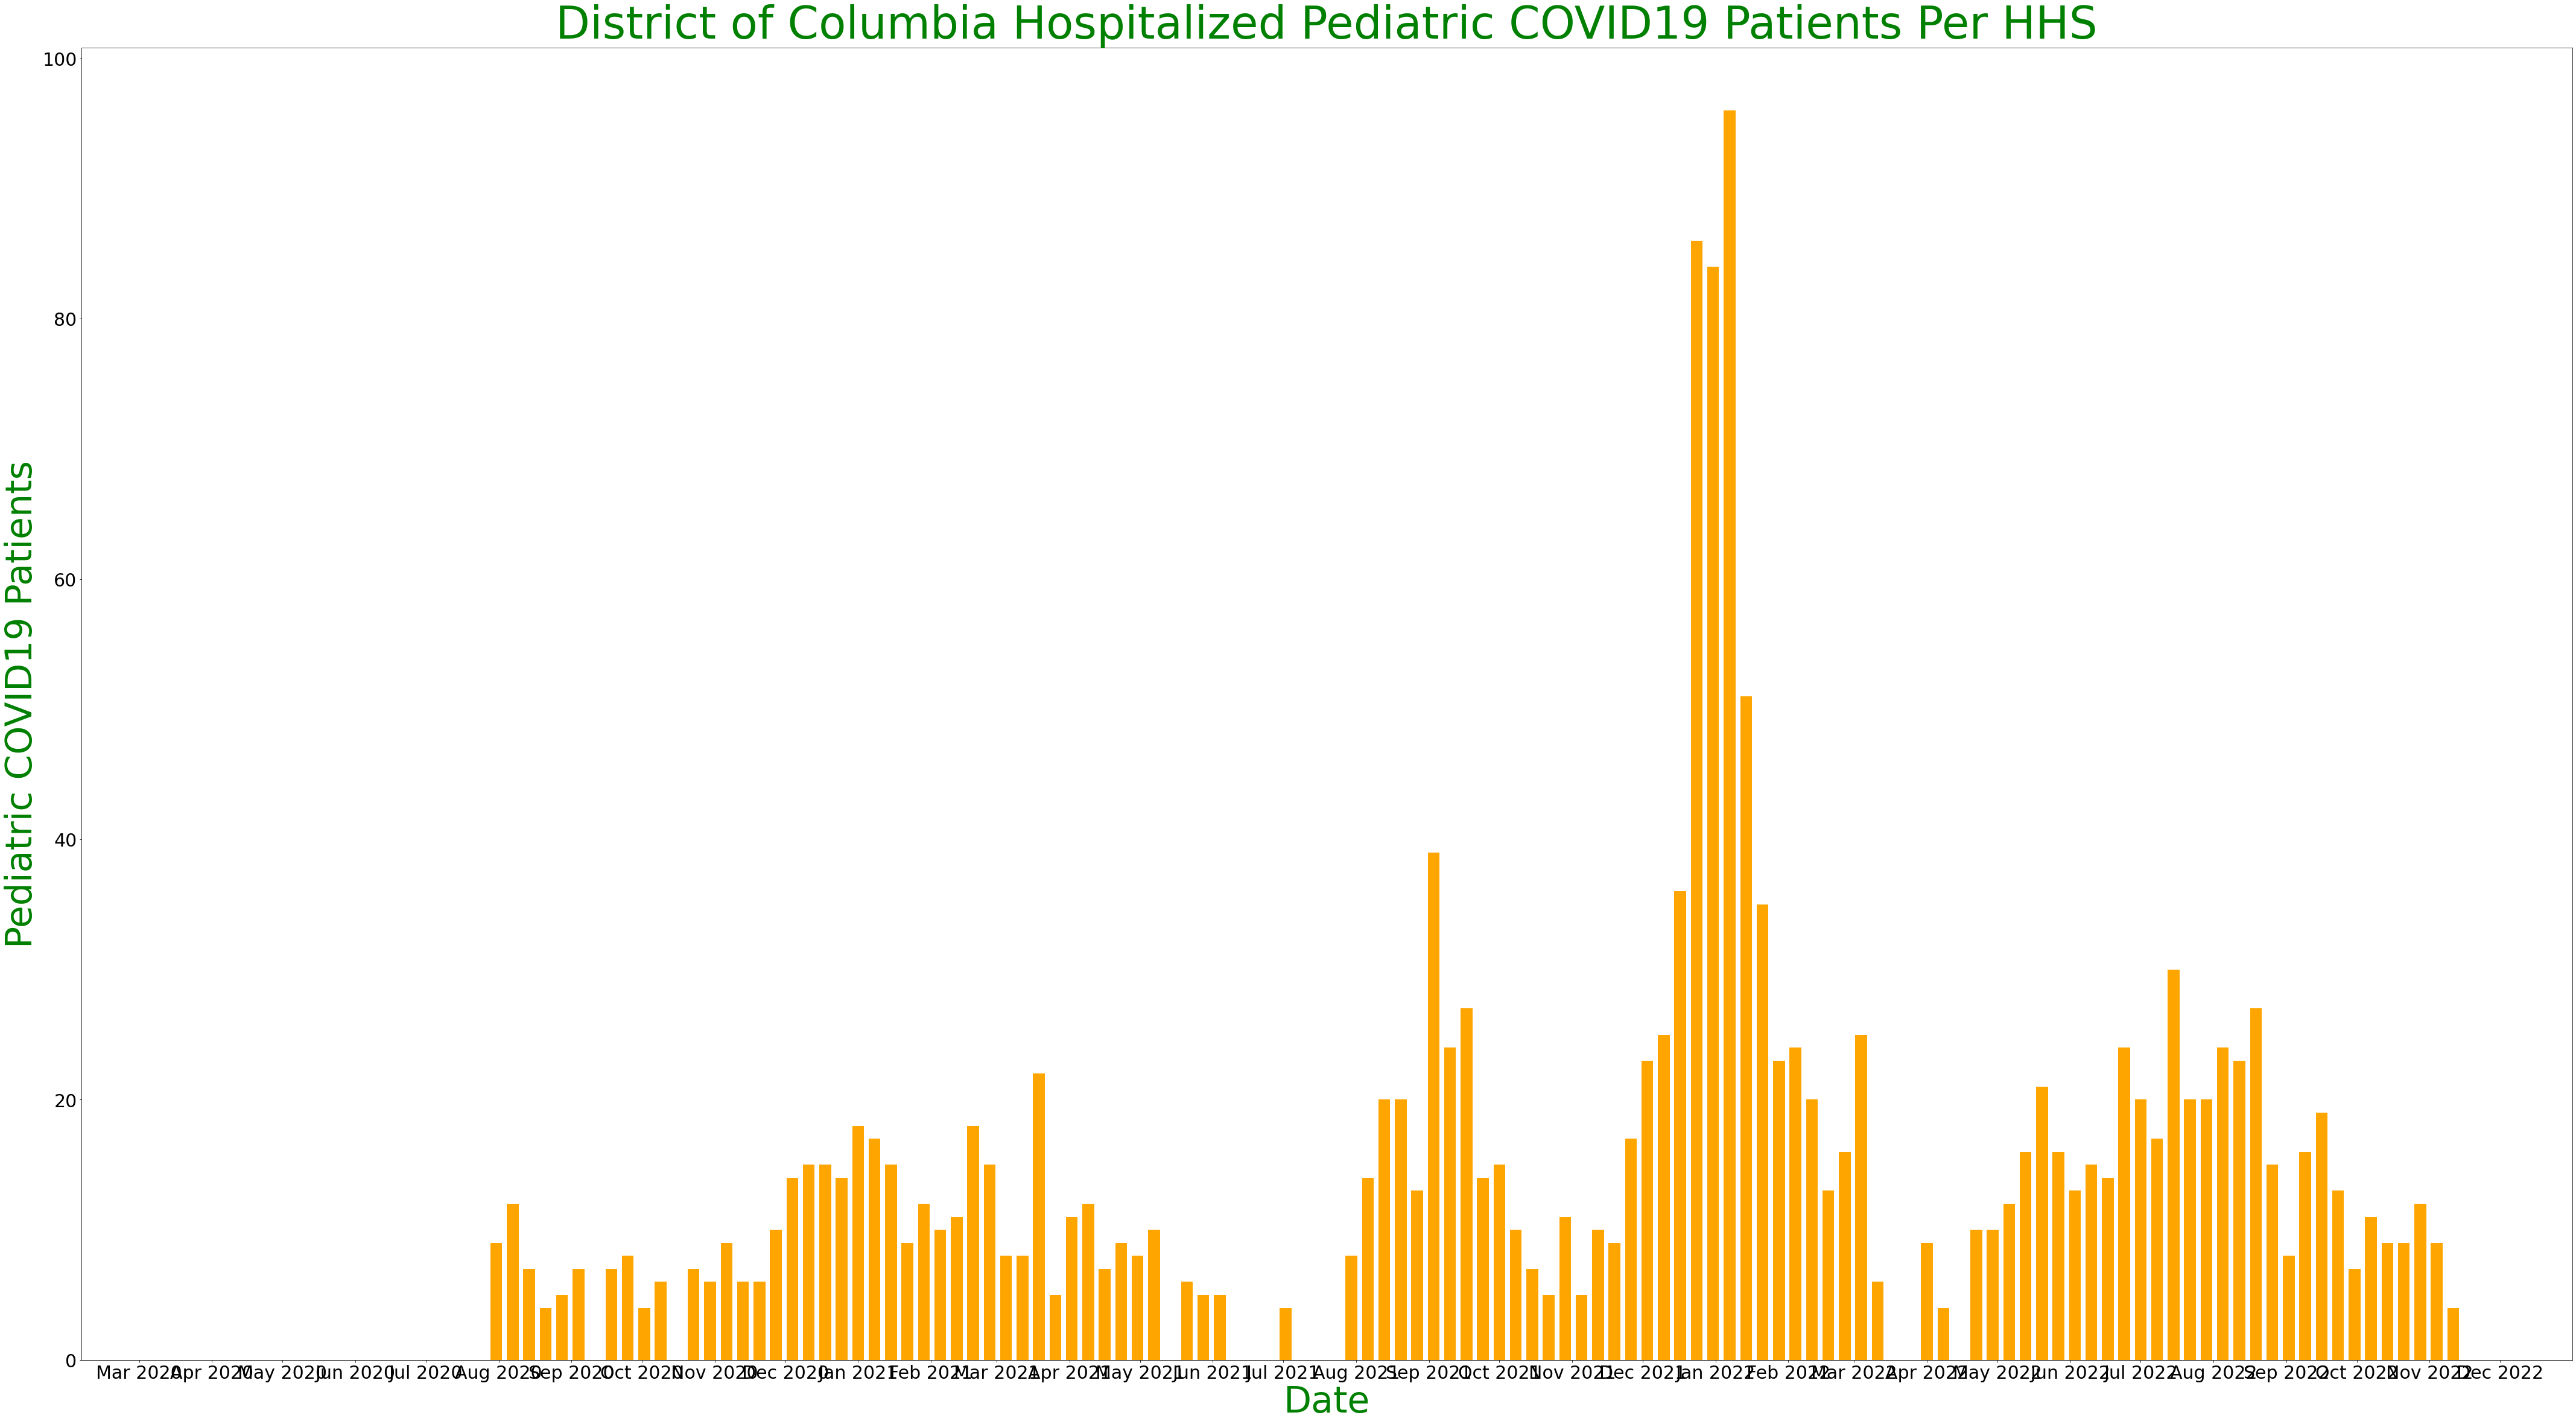

In [92]:
aaa = df_covid_hospital[df_covid_hospital.state == 'DC']
date_list = aaa.collection_week.unique()
date_list.sort()
dc_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    dc_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_dc_ped = pd.DataFrame(dc_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('District of Columbia Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_dc_ped.date, df_dc_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_DC_Pediatric.png')

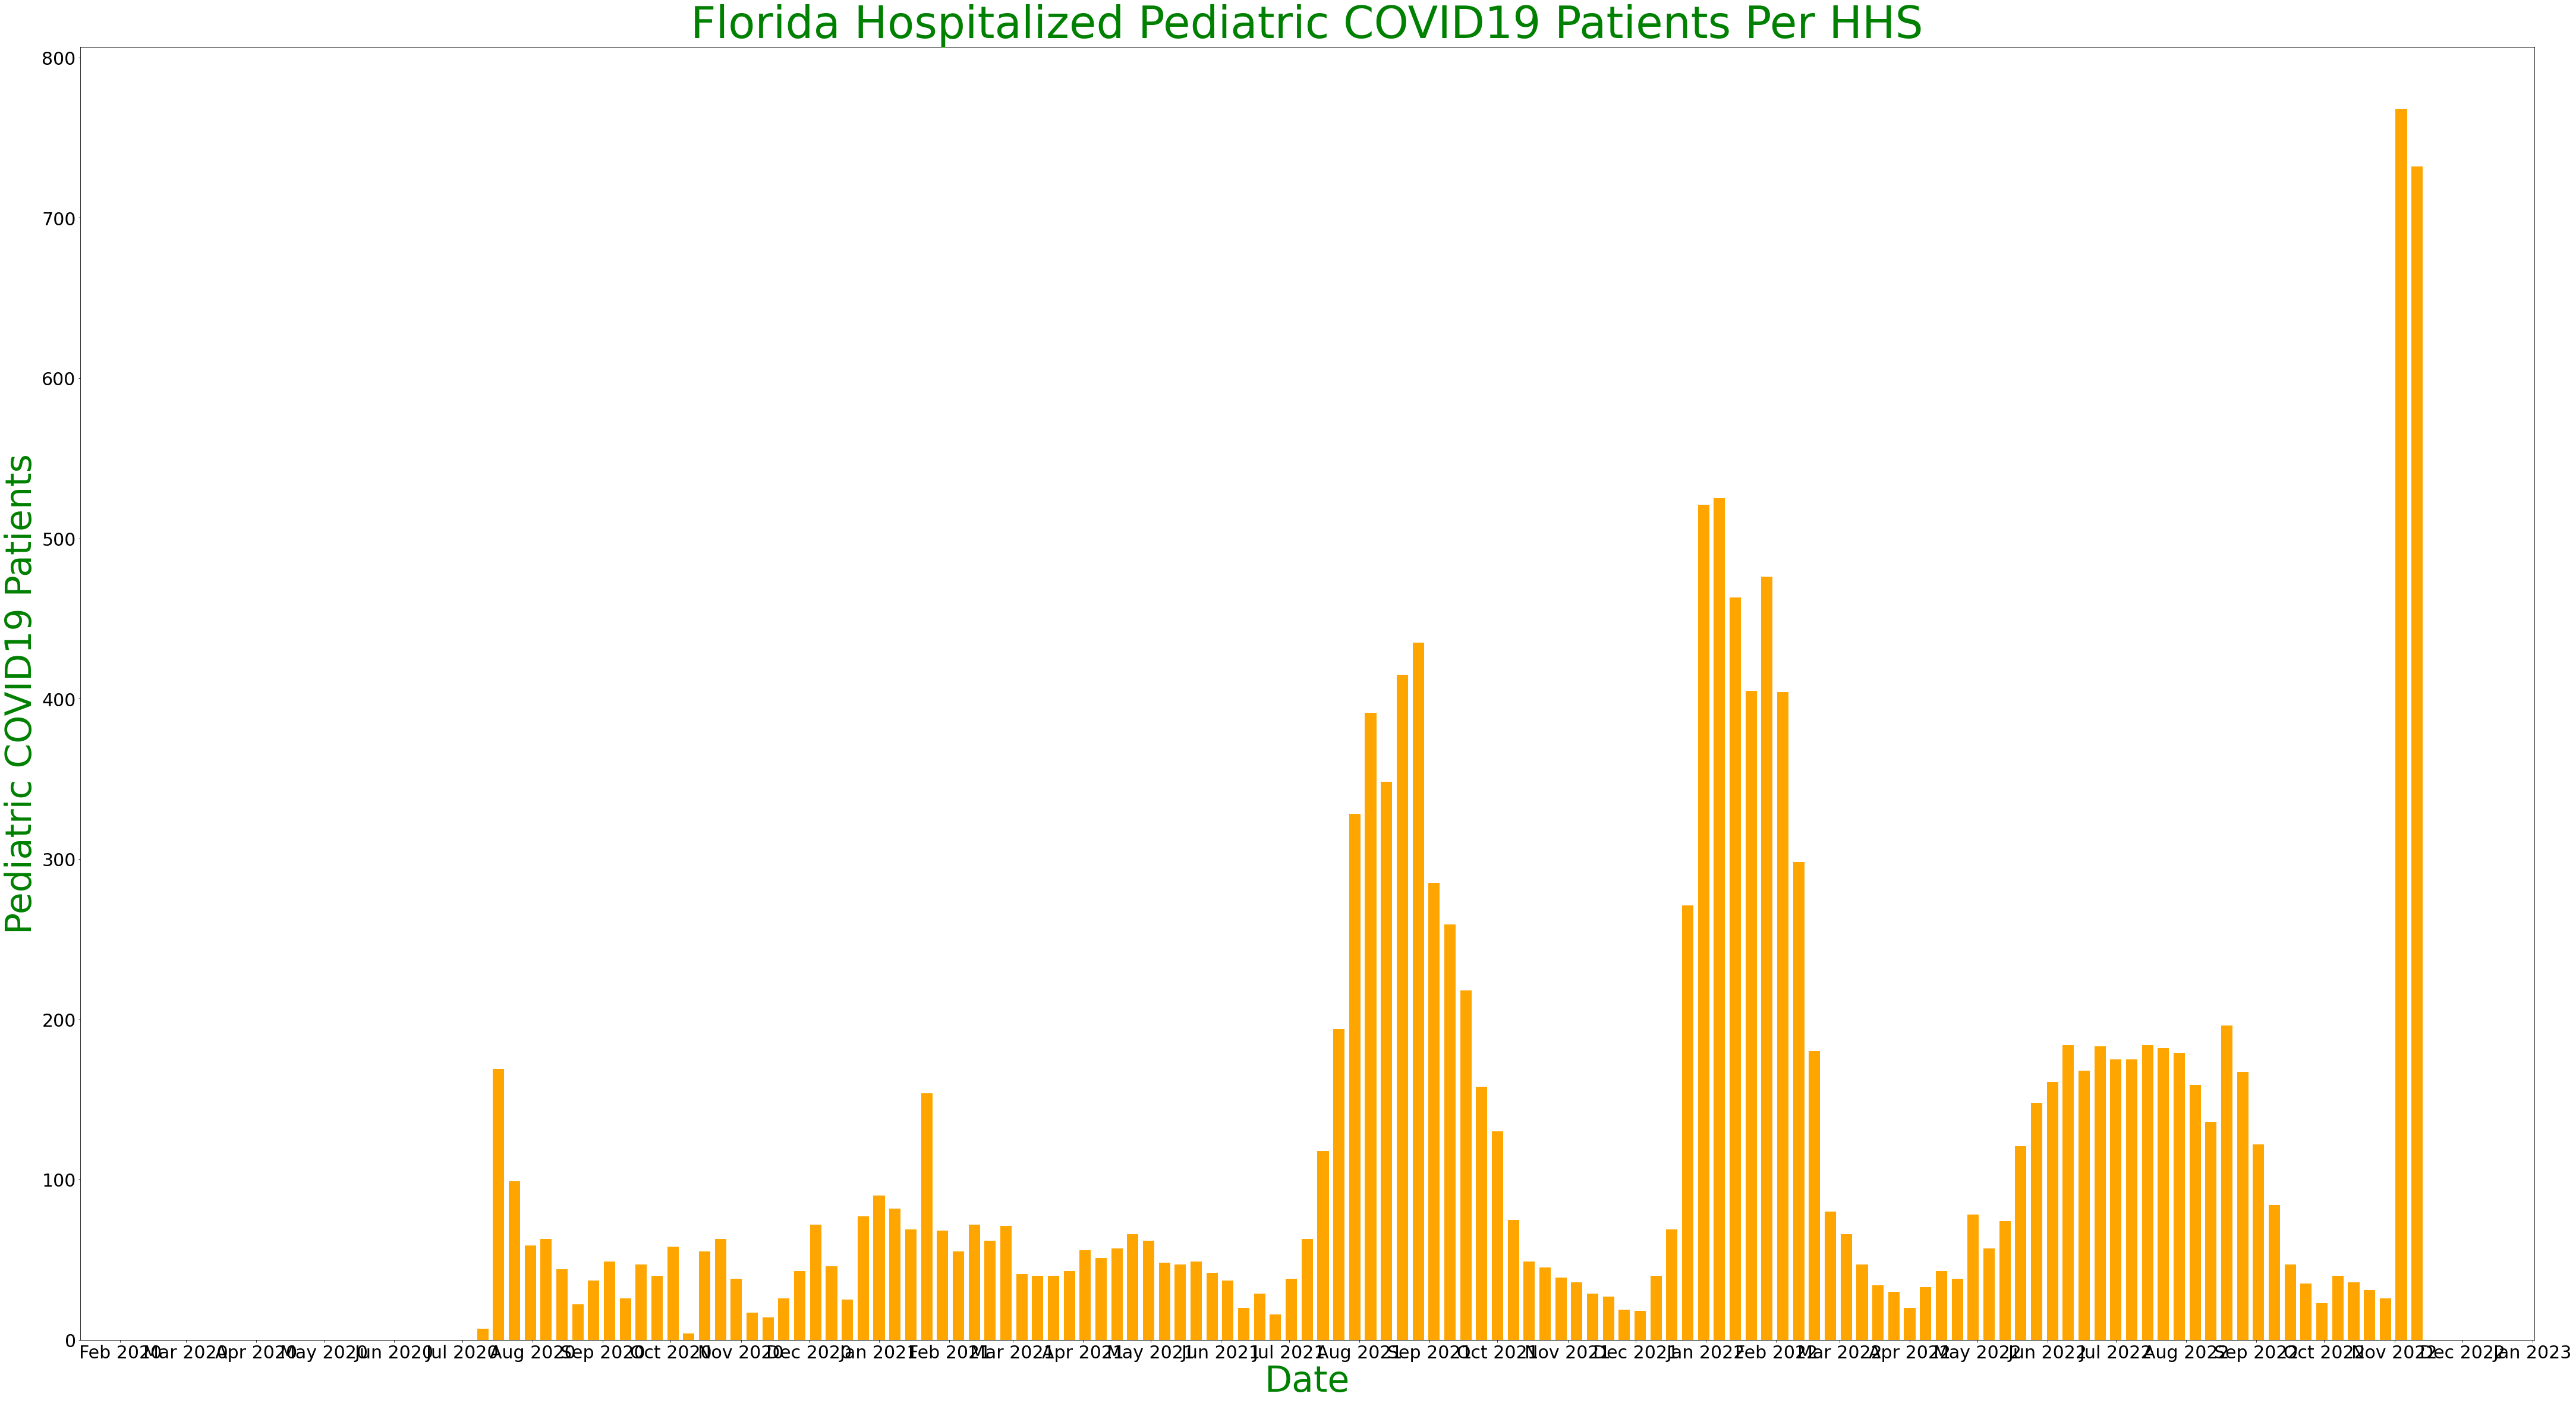

In [93]:
aaa = df_covid_hospital[df_covid_hospital.state == 'FL']
date_list = aaa.collection_week.unique()
date_list.sort()
fl_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    fl_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_fl_ped = pd.DataFrame(fl_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Florida Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_fl_ped.date, df_fl_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_FL_Pediatric.png')

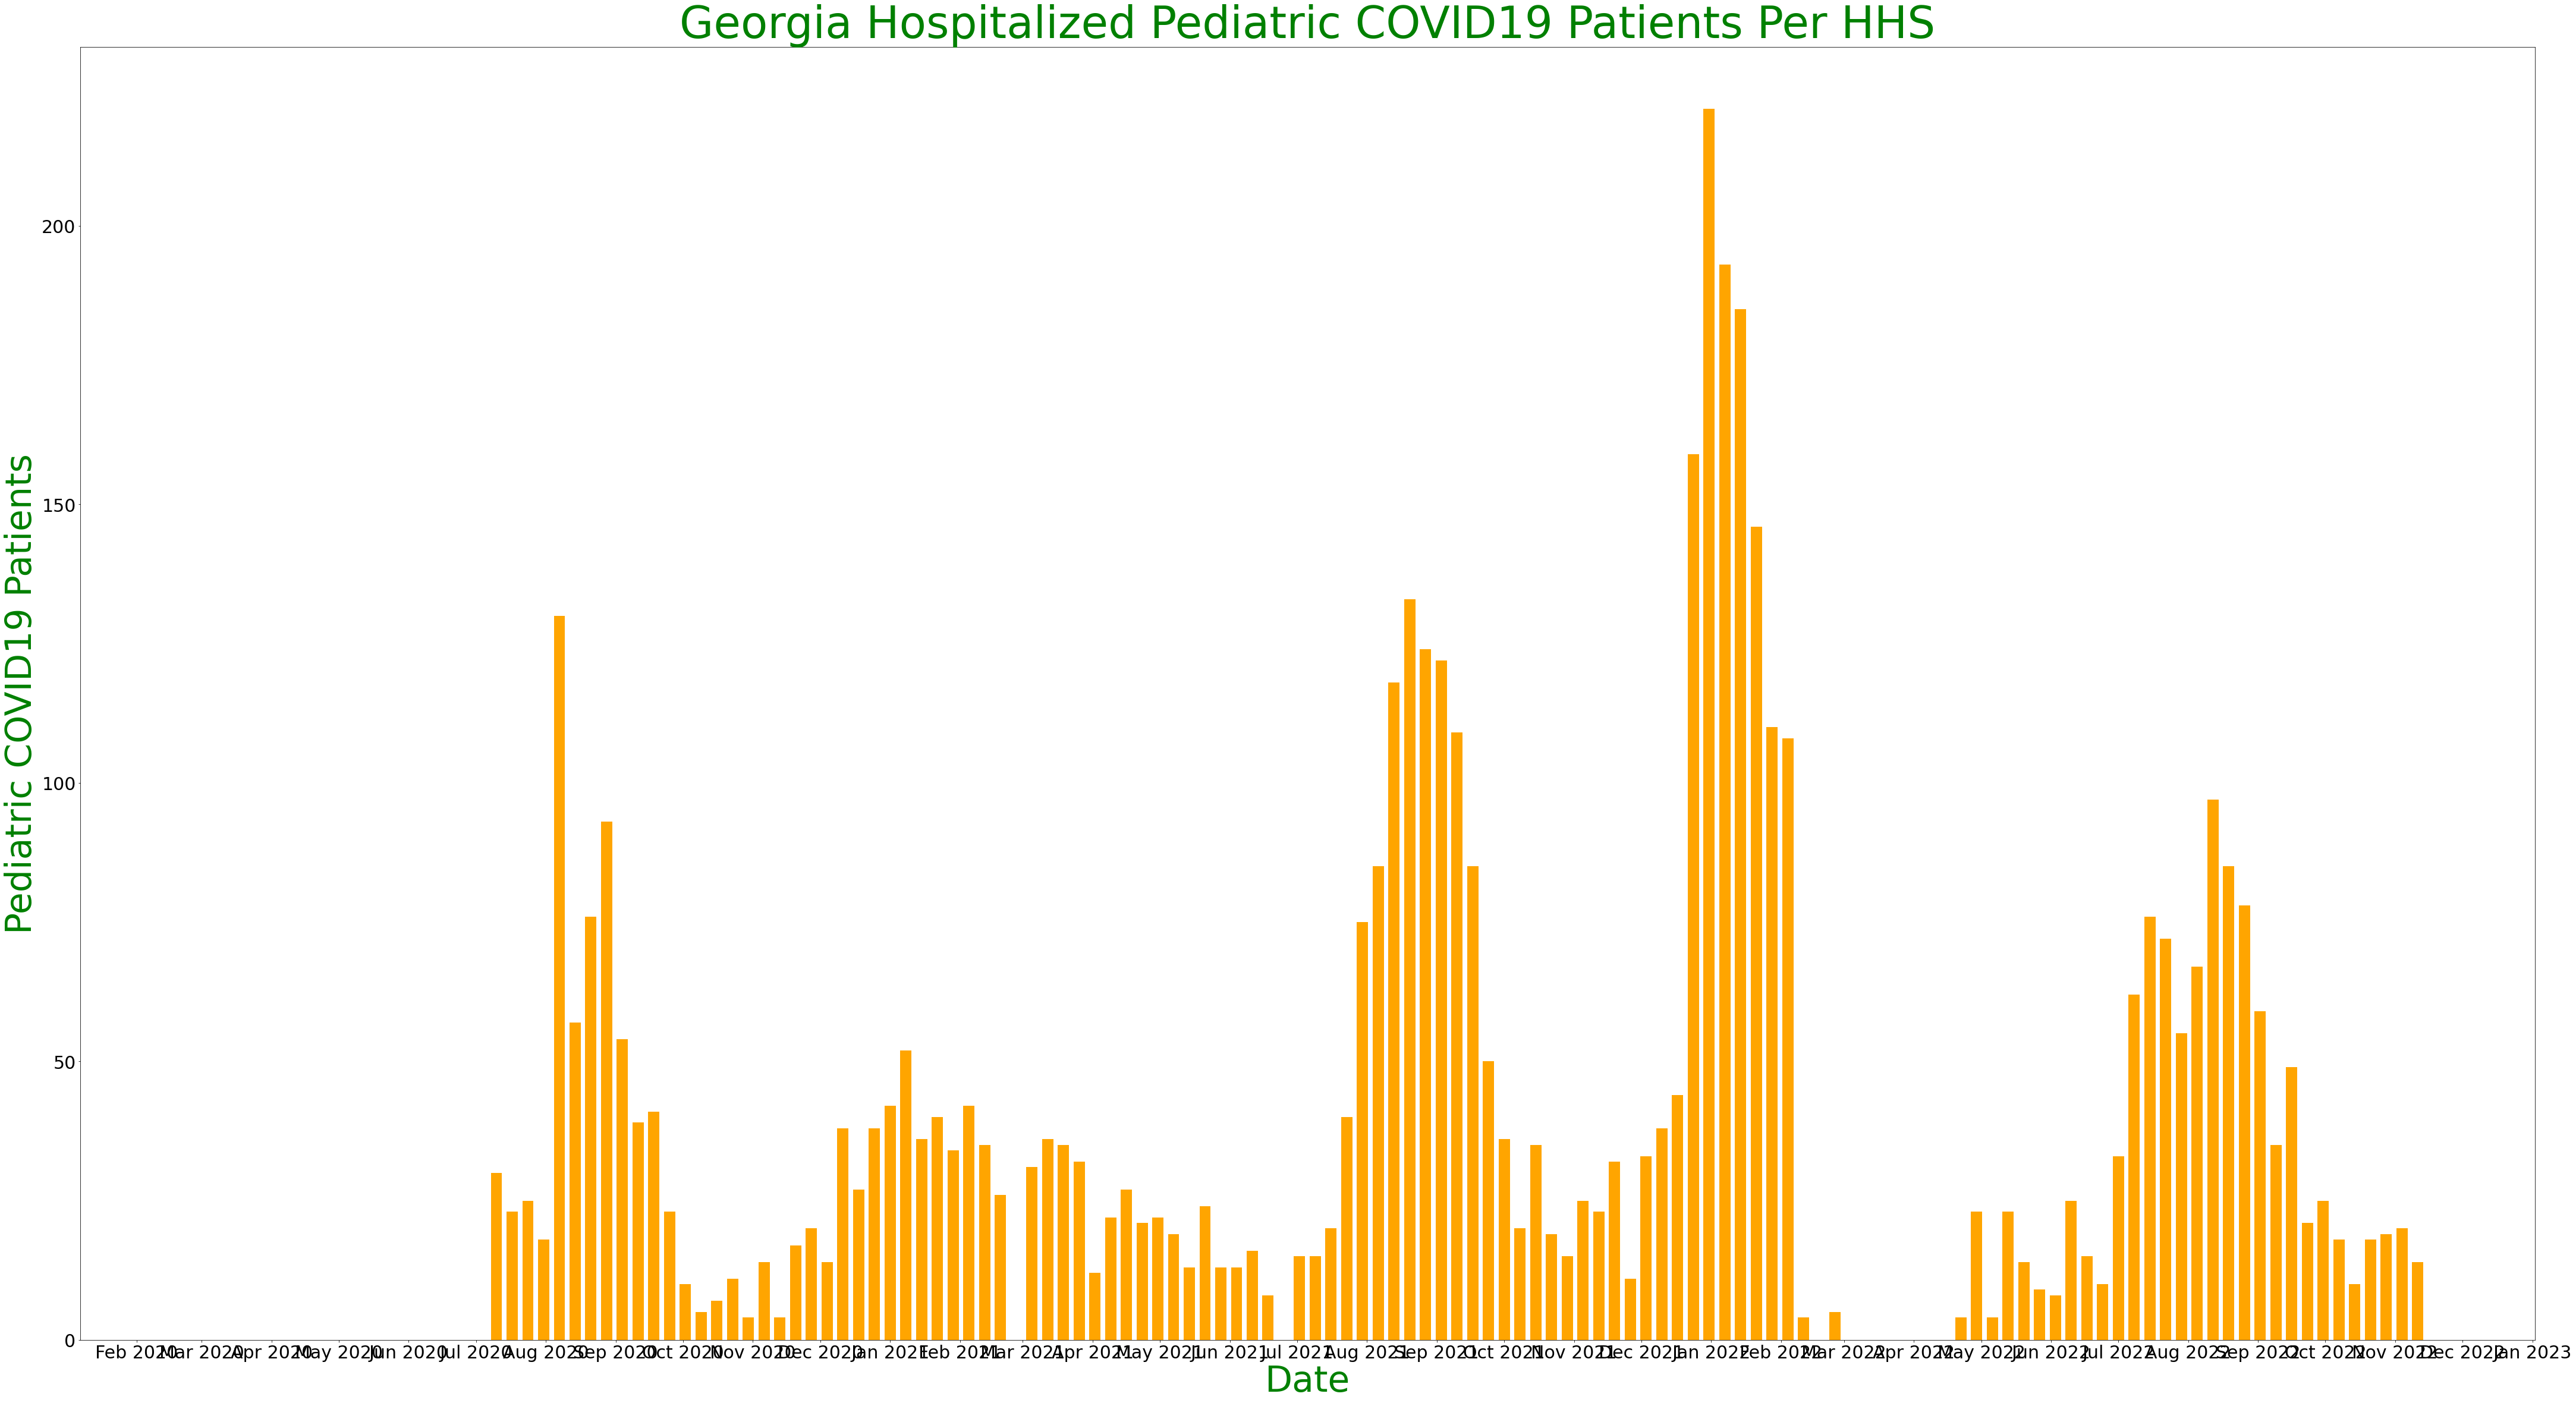

In [94]:
aaa = df_covid_hospital[df_covid_hospital.state == 'GA']
date_list = aaa.collection_week.unique()
date_list.sort()
ga_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    ga_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_ga_ped = pd.DataFrame(ga_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Georgia Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_ga_ped.date, df_ga_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_GA_Pediatric.png')

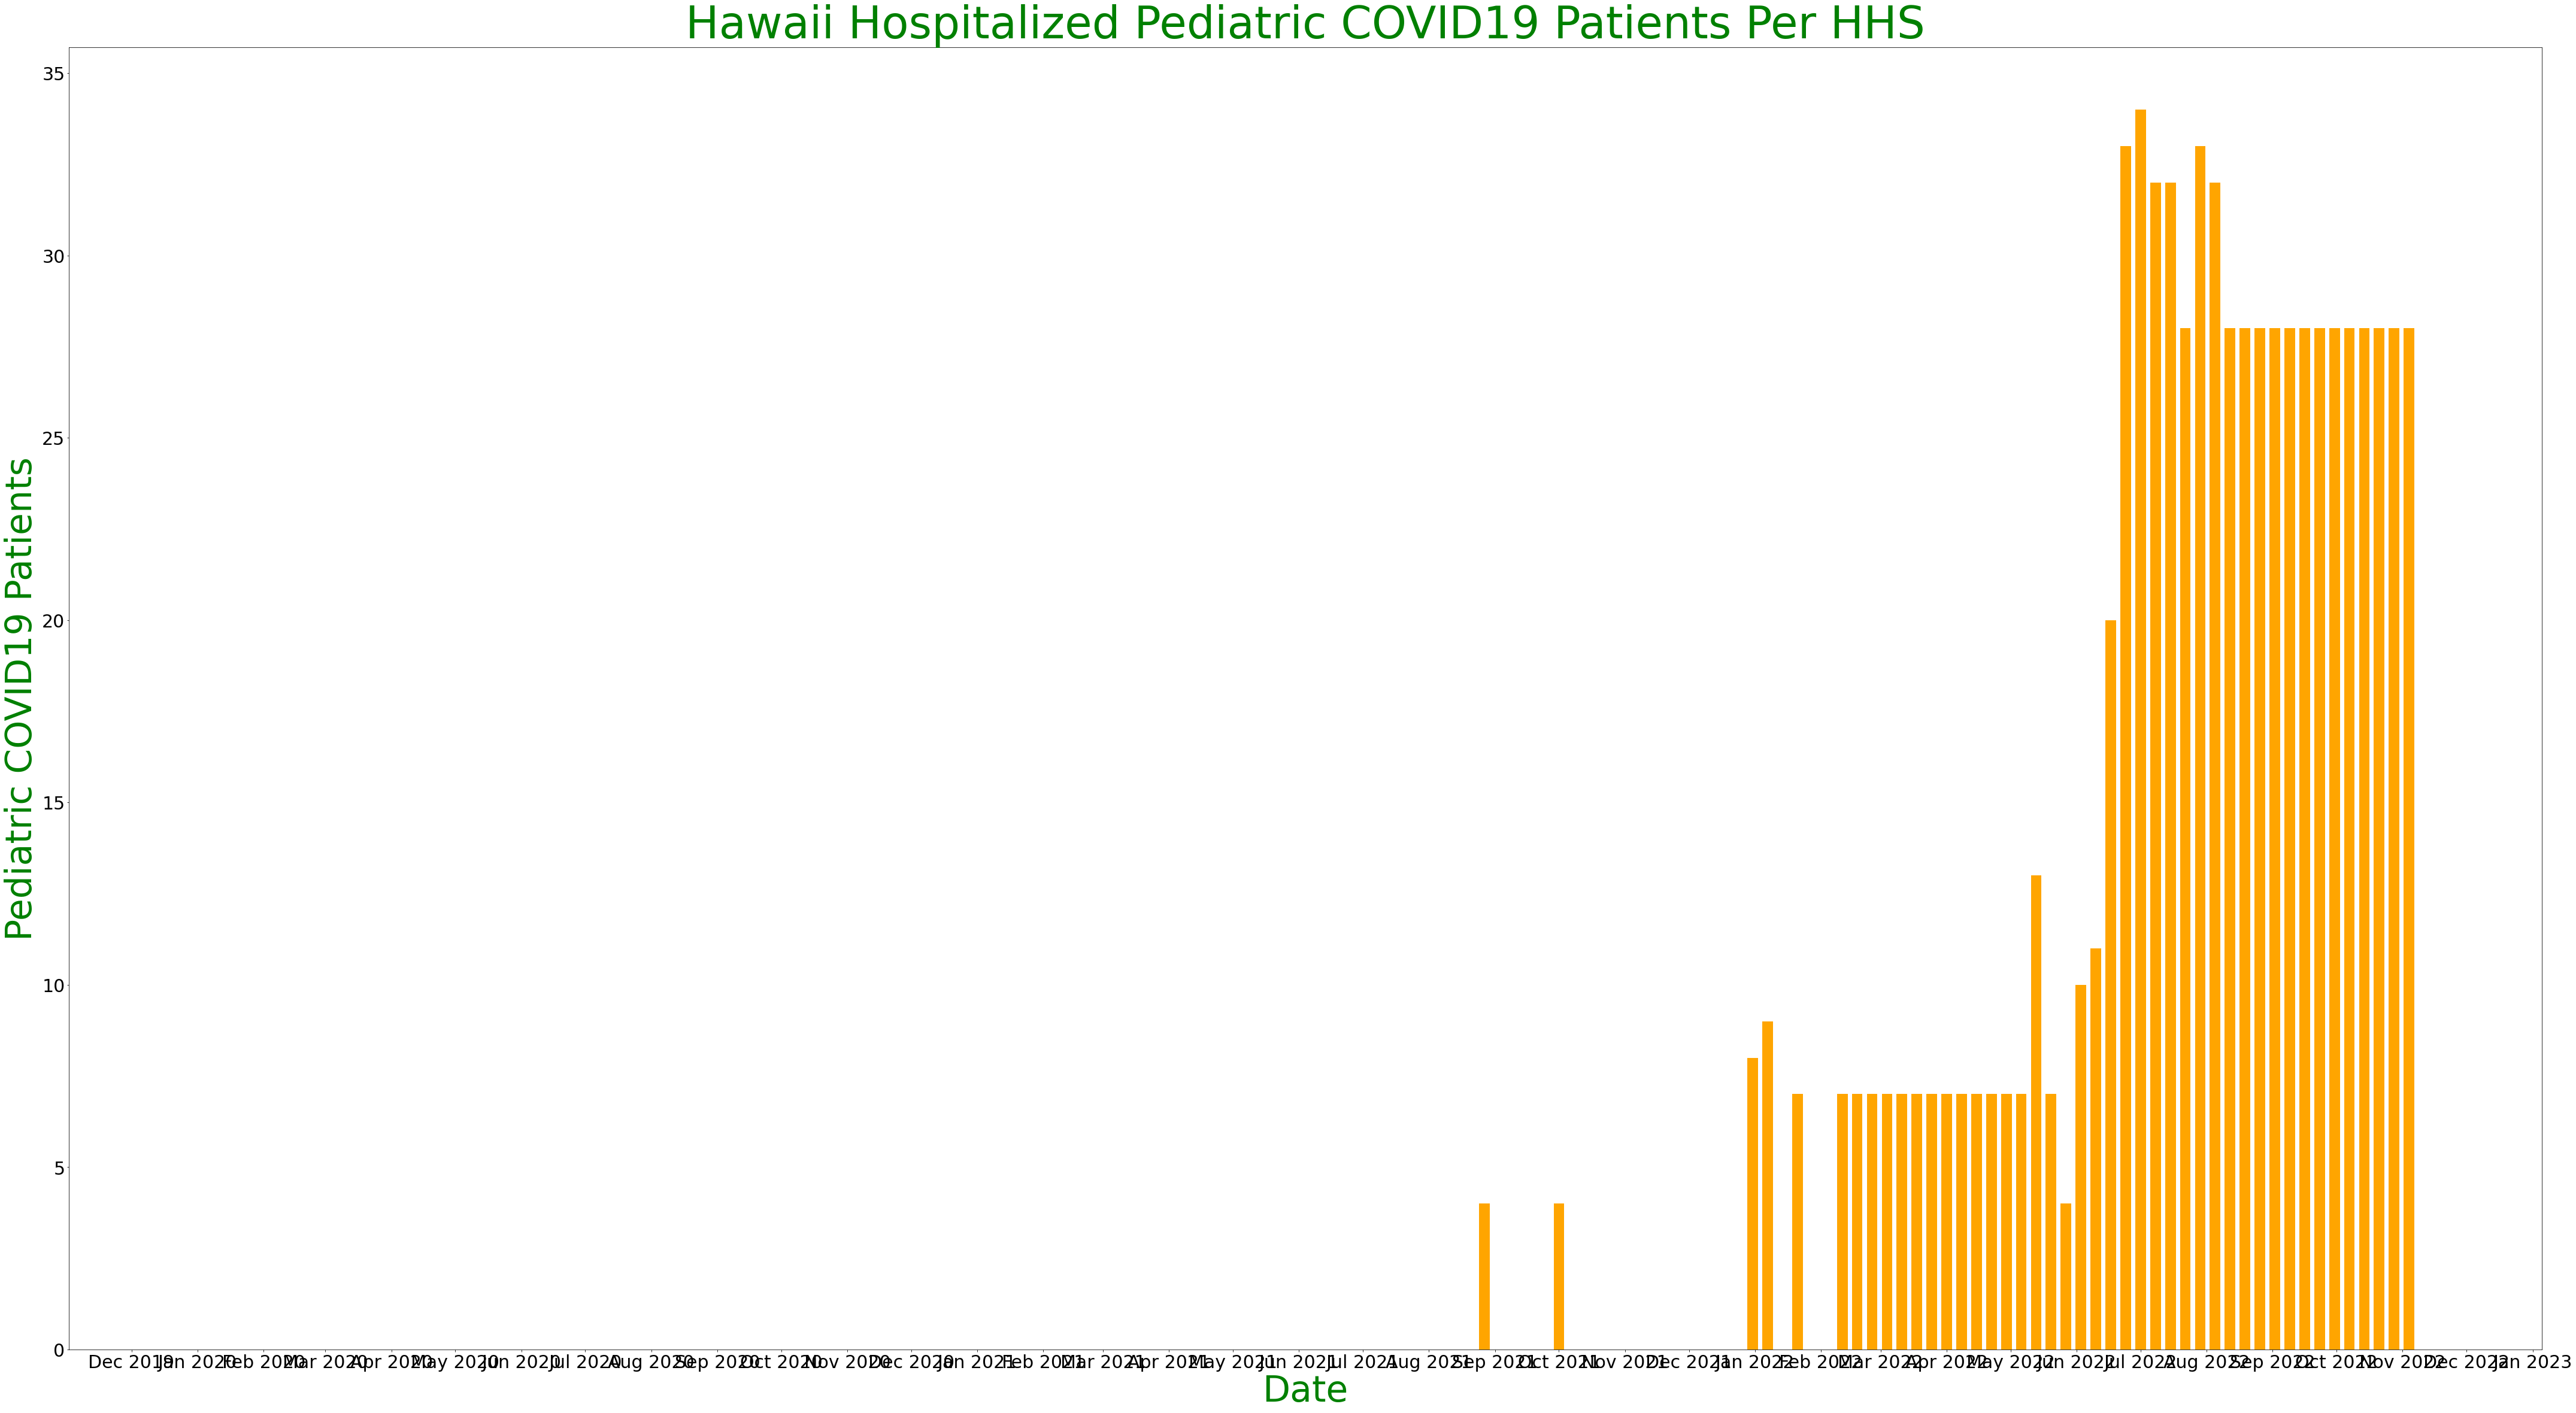

In [95]:
aaa = df_covid_hospital[df_covid_hospital.state == 'HI']
date_list = aaa.collection_week.unique()
date_list.sort()
hi_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    hi_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_hi_ped = pd.DataFrame(hi_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Hawaii Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_hi_ped.date, df_hi_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_HI_Pediatric.png')

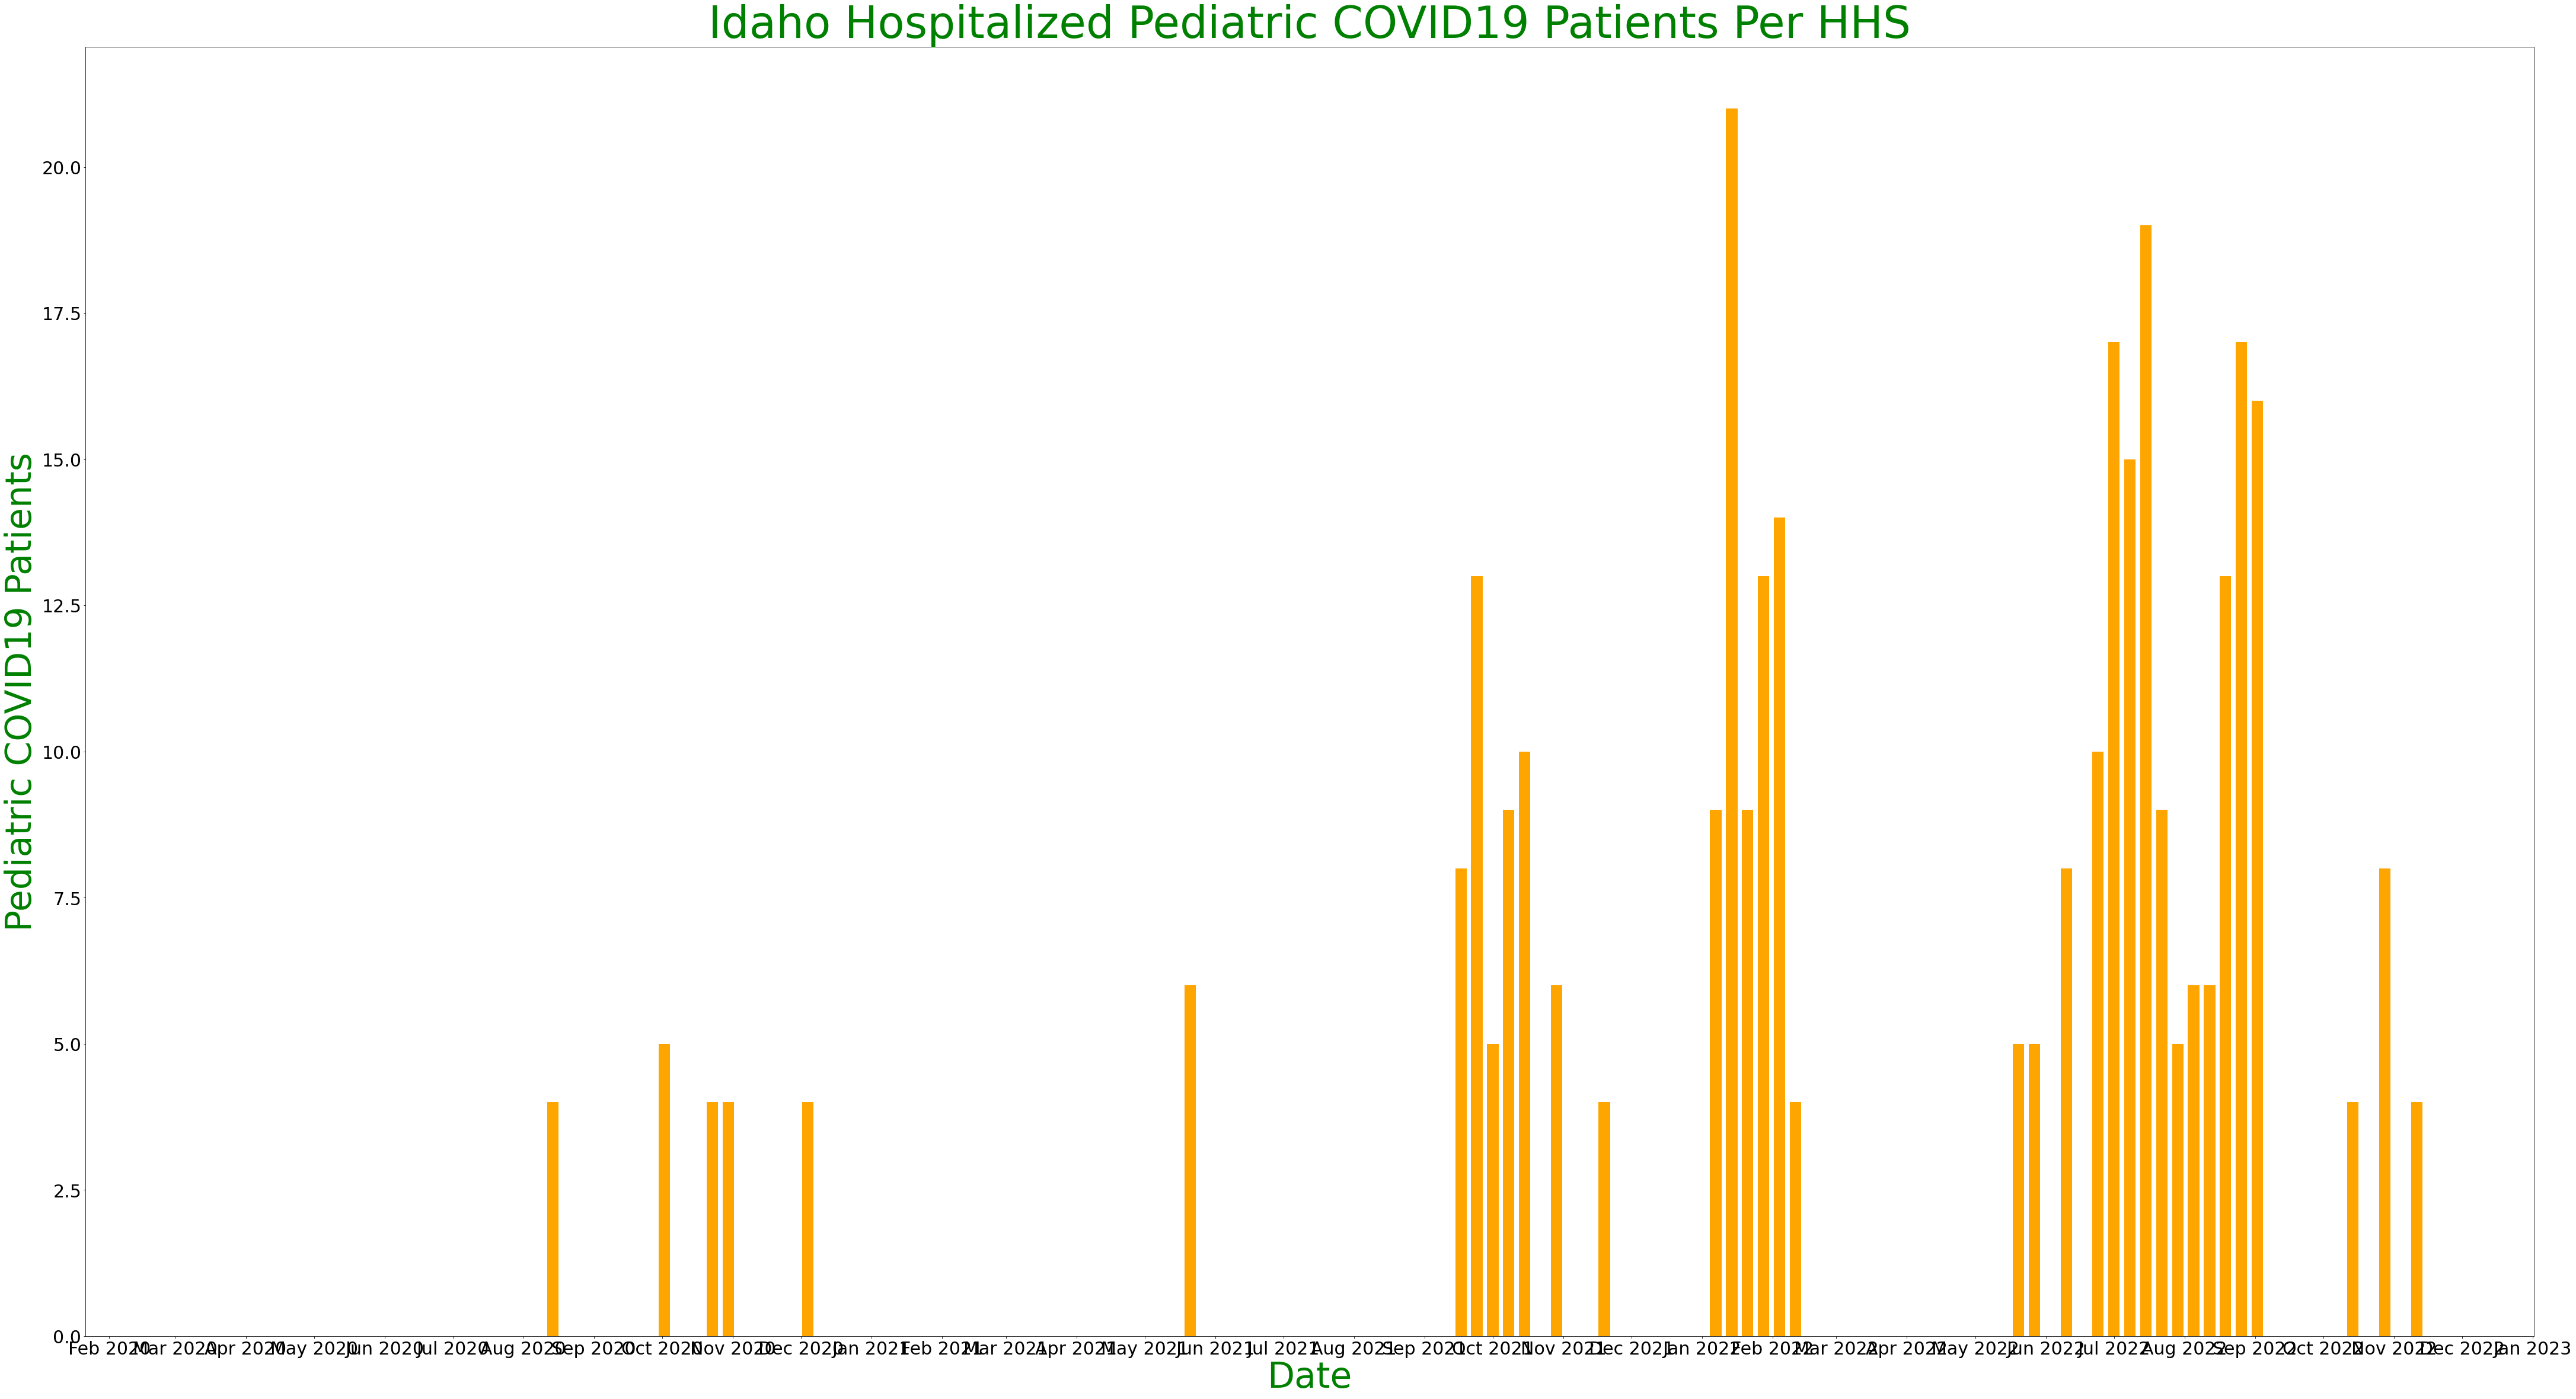

In [96]:
aaa = df_covid_hospital[df_covid_hospital.state == 'ID']
date_list = aaa.collection_week.unique()
date_list.sort()
id_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    id_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_id_ped = pd.DataFrame(id_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Idaho Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_id_ped.date, df_id_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_ID_Pediatric.png')

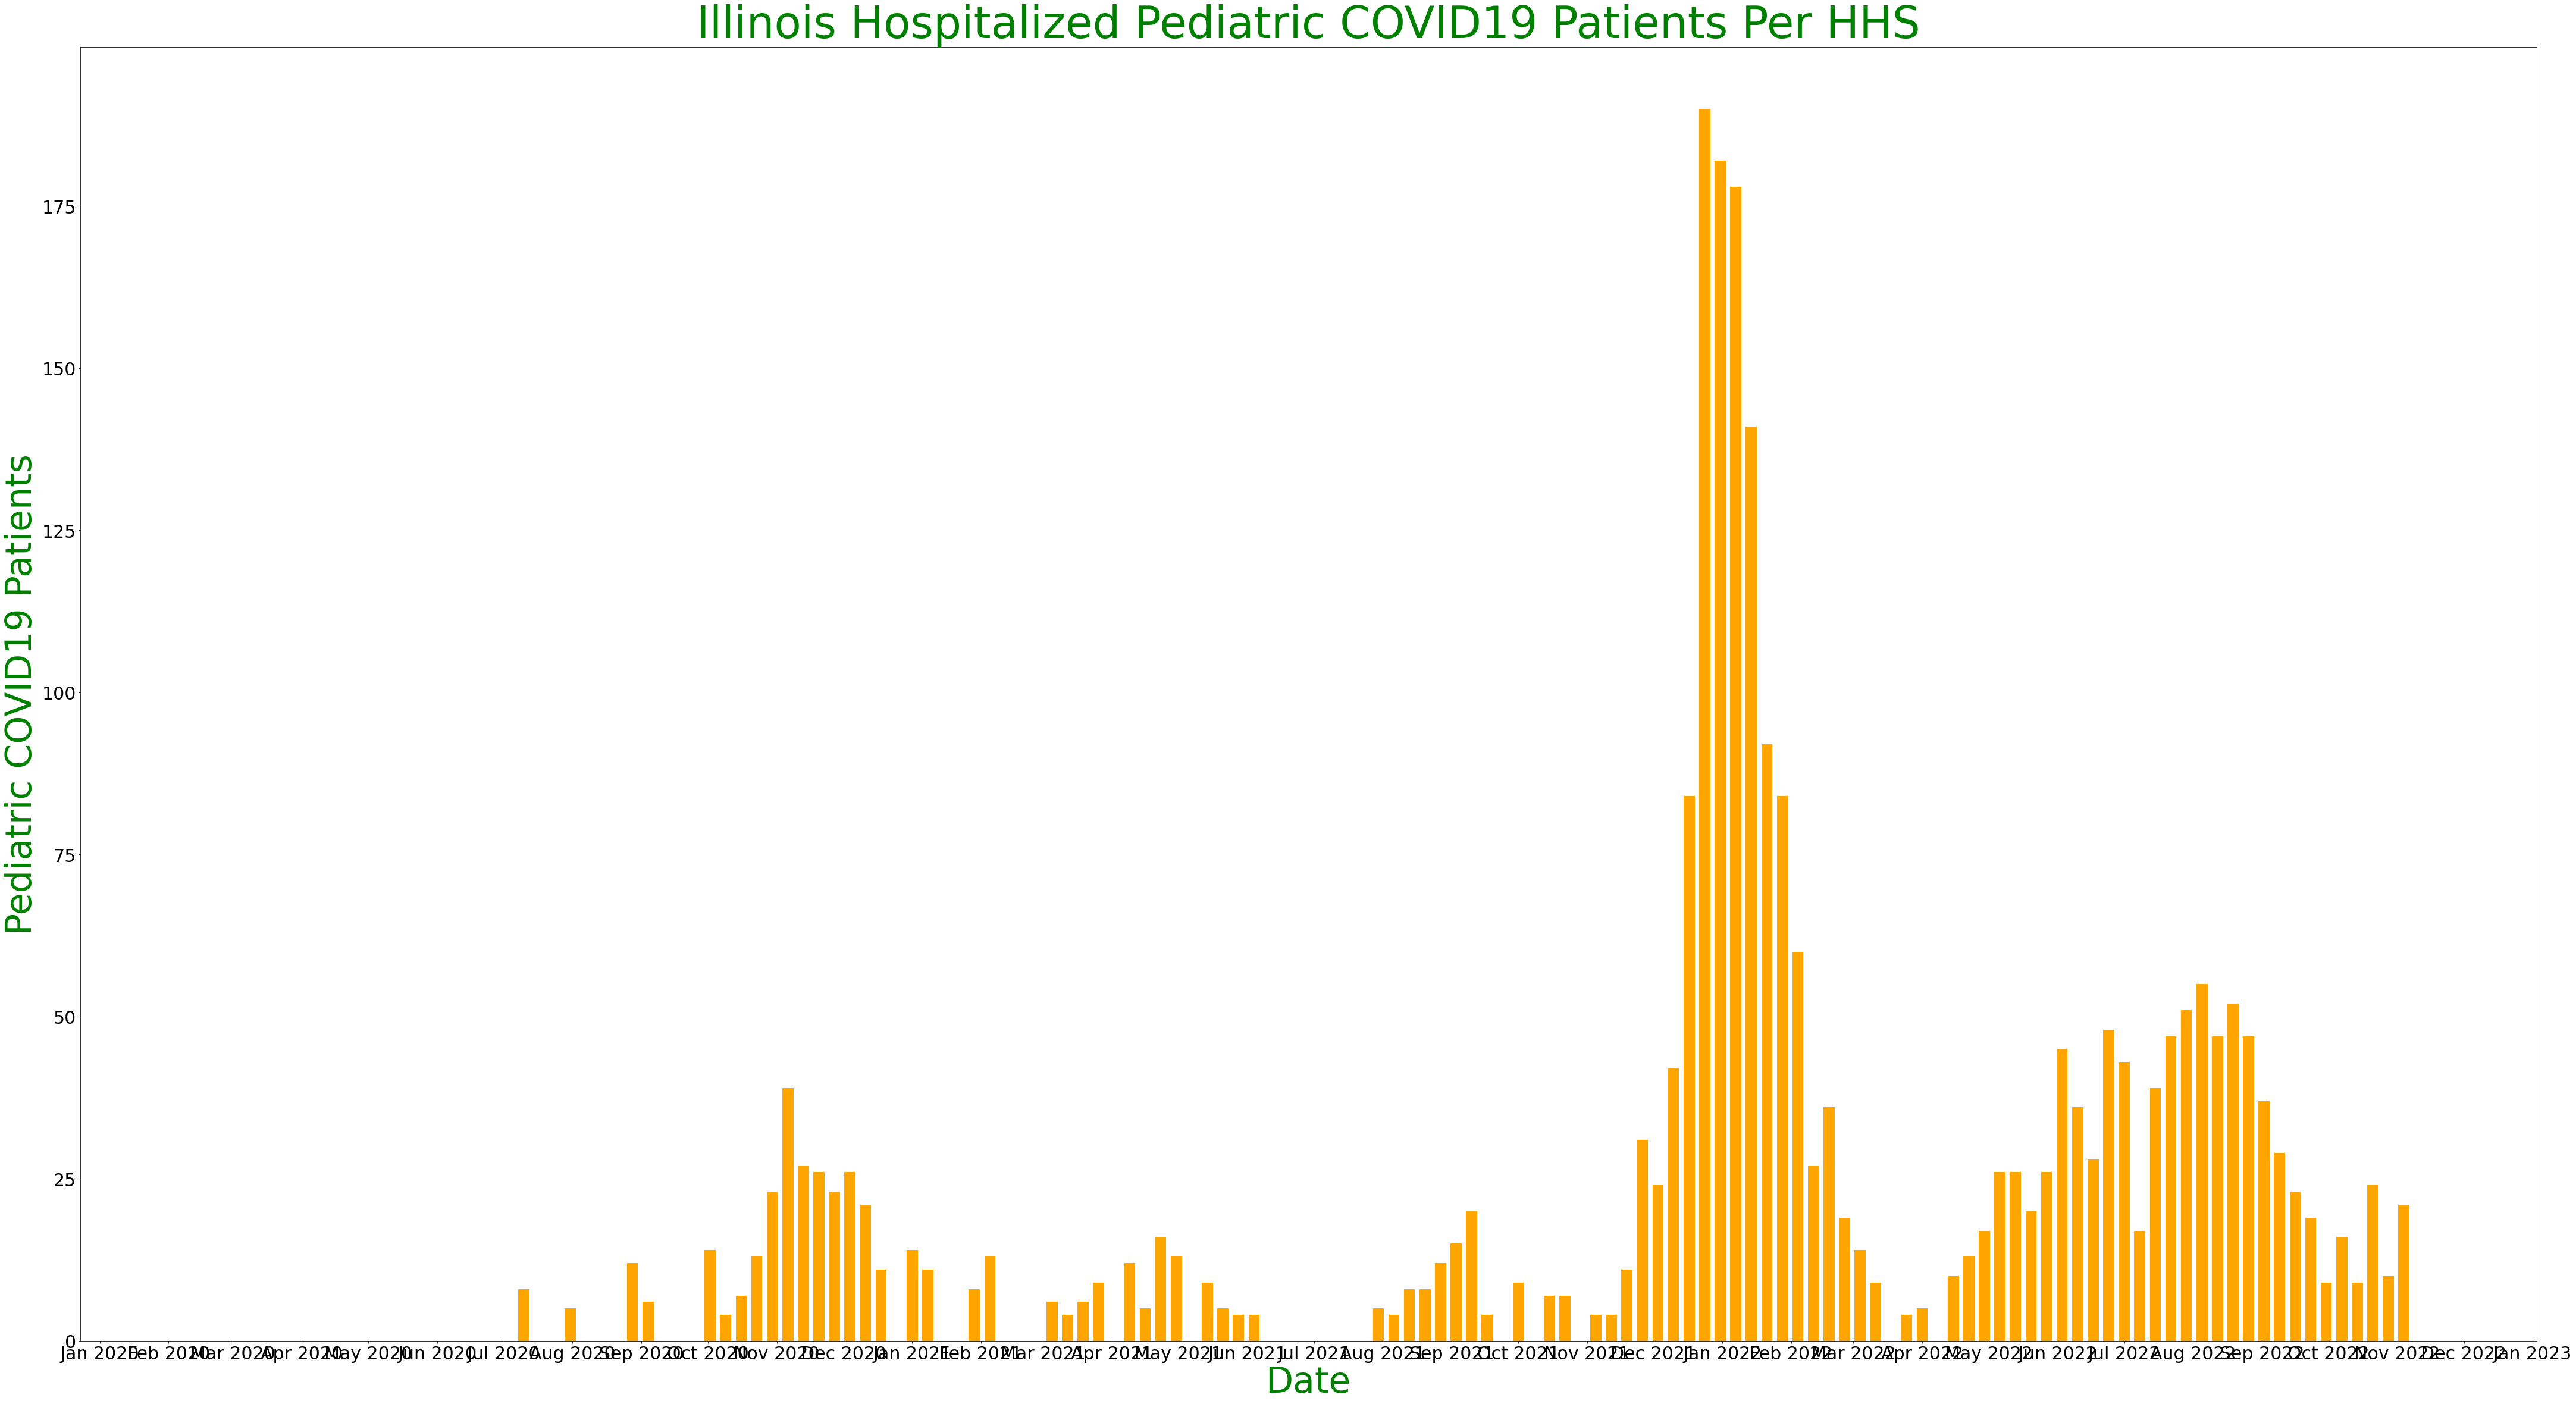

In [97]:
aaa = df_covid_hospital[df_covid_hospital.state == 'IL']
date_list = aaa.collection_week.unique()
date_list.sort()
il_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    il_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_il_ped = pd.DataFrame(il_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Illinois Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_il_ped.date, df_il_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_IL_Pediatric.png')

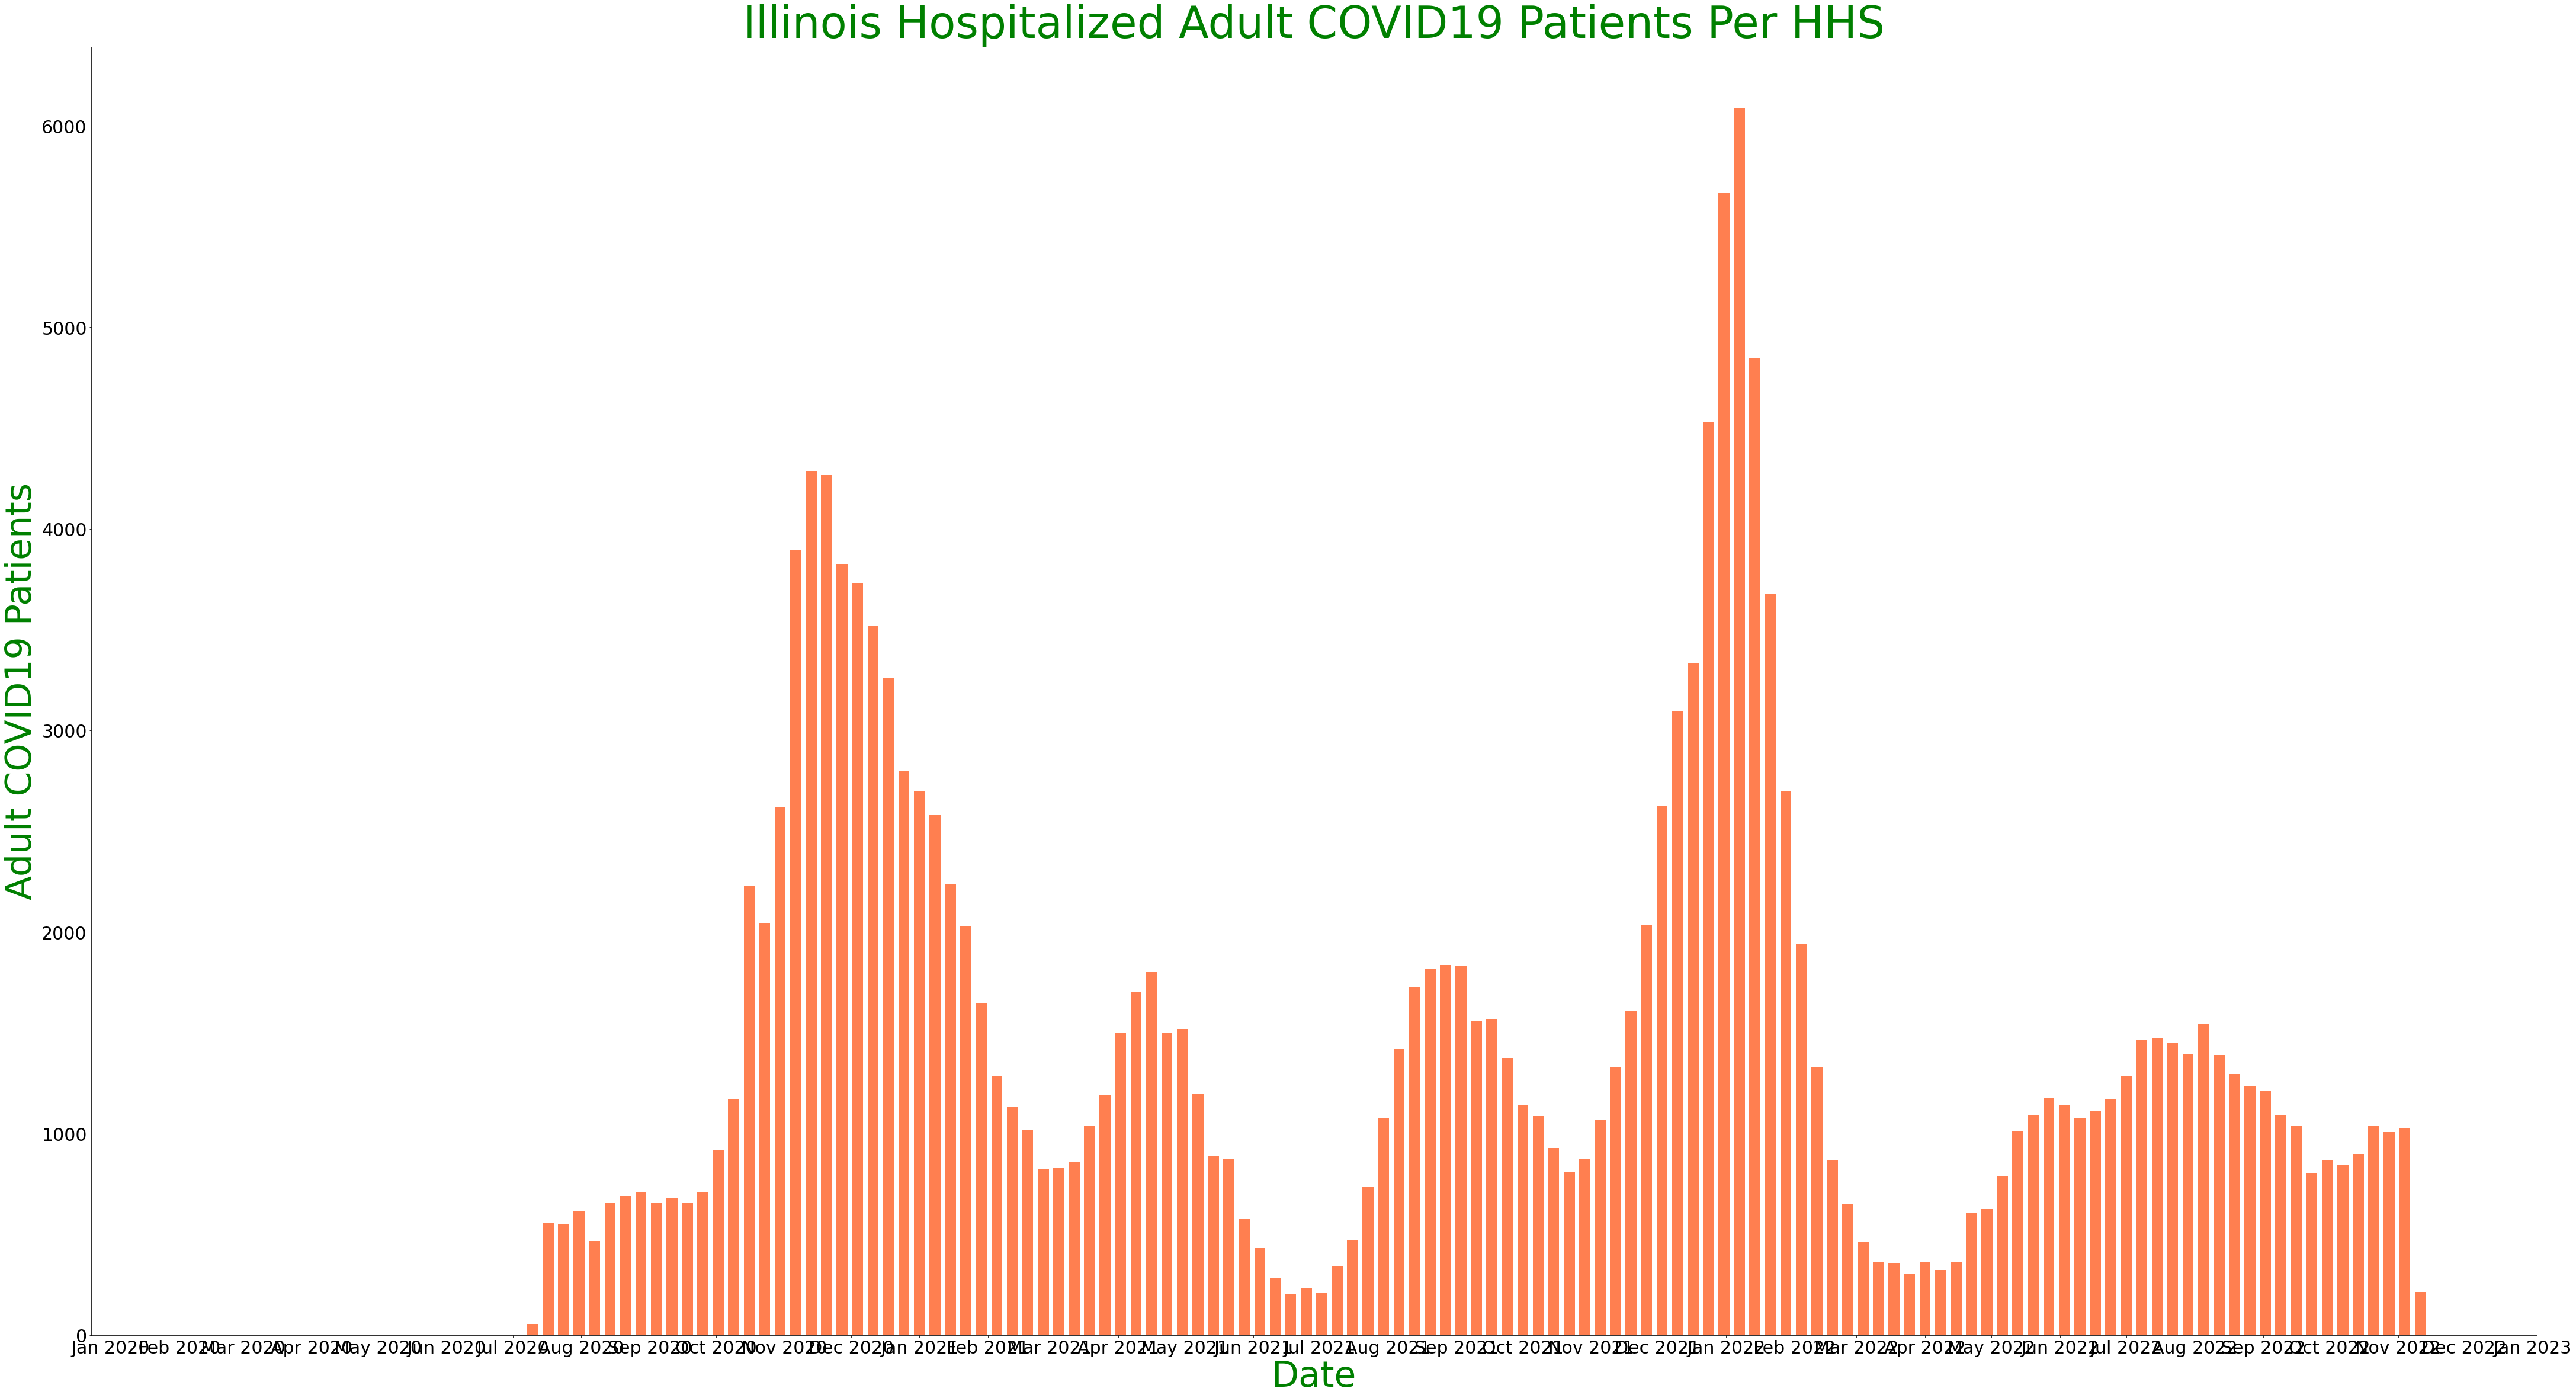

In [98]:
aaa = df_covid_hospital[df_covid_hospital.state == 'IL']
date_list = aaa.collection_week.unique()
date_list.sort()
il_adult_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_adult_covid_confirmed_7_day_sum >= 0]
    #print()
    il_adult_list.append((x, ccc.previous_day_admission_adult_covid_confirmed_7_day_sum.sum()))
df_il_adult = pd.DataFrame(il_adult_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('Illinois Hospitalized Adult COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Adult COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_il_adult.date, df_il_adult.ped_count, color = 'coral', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_IL_Adult.png')

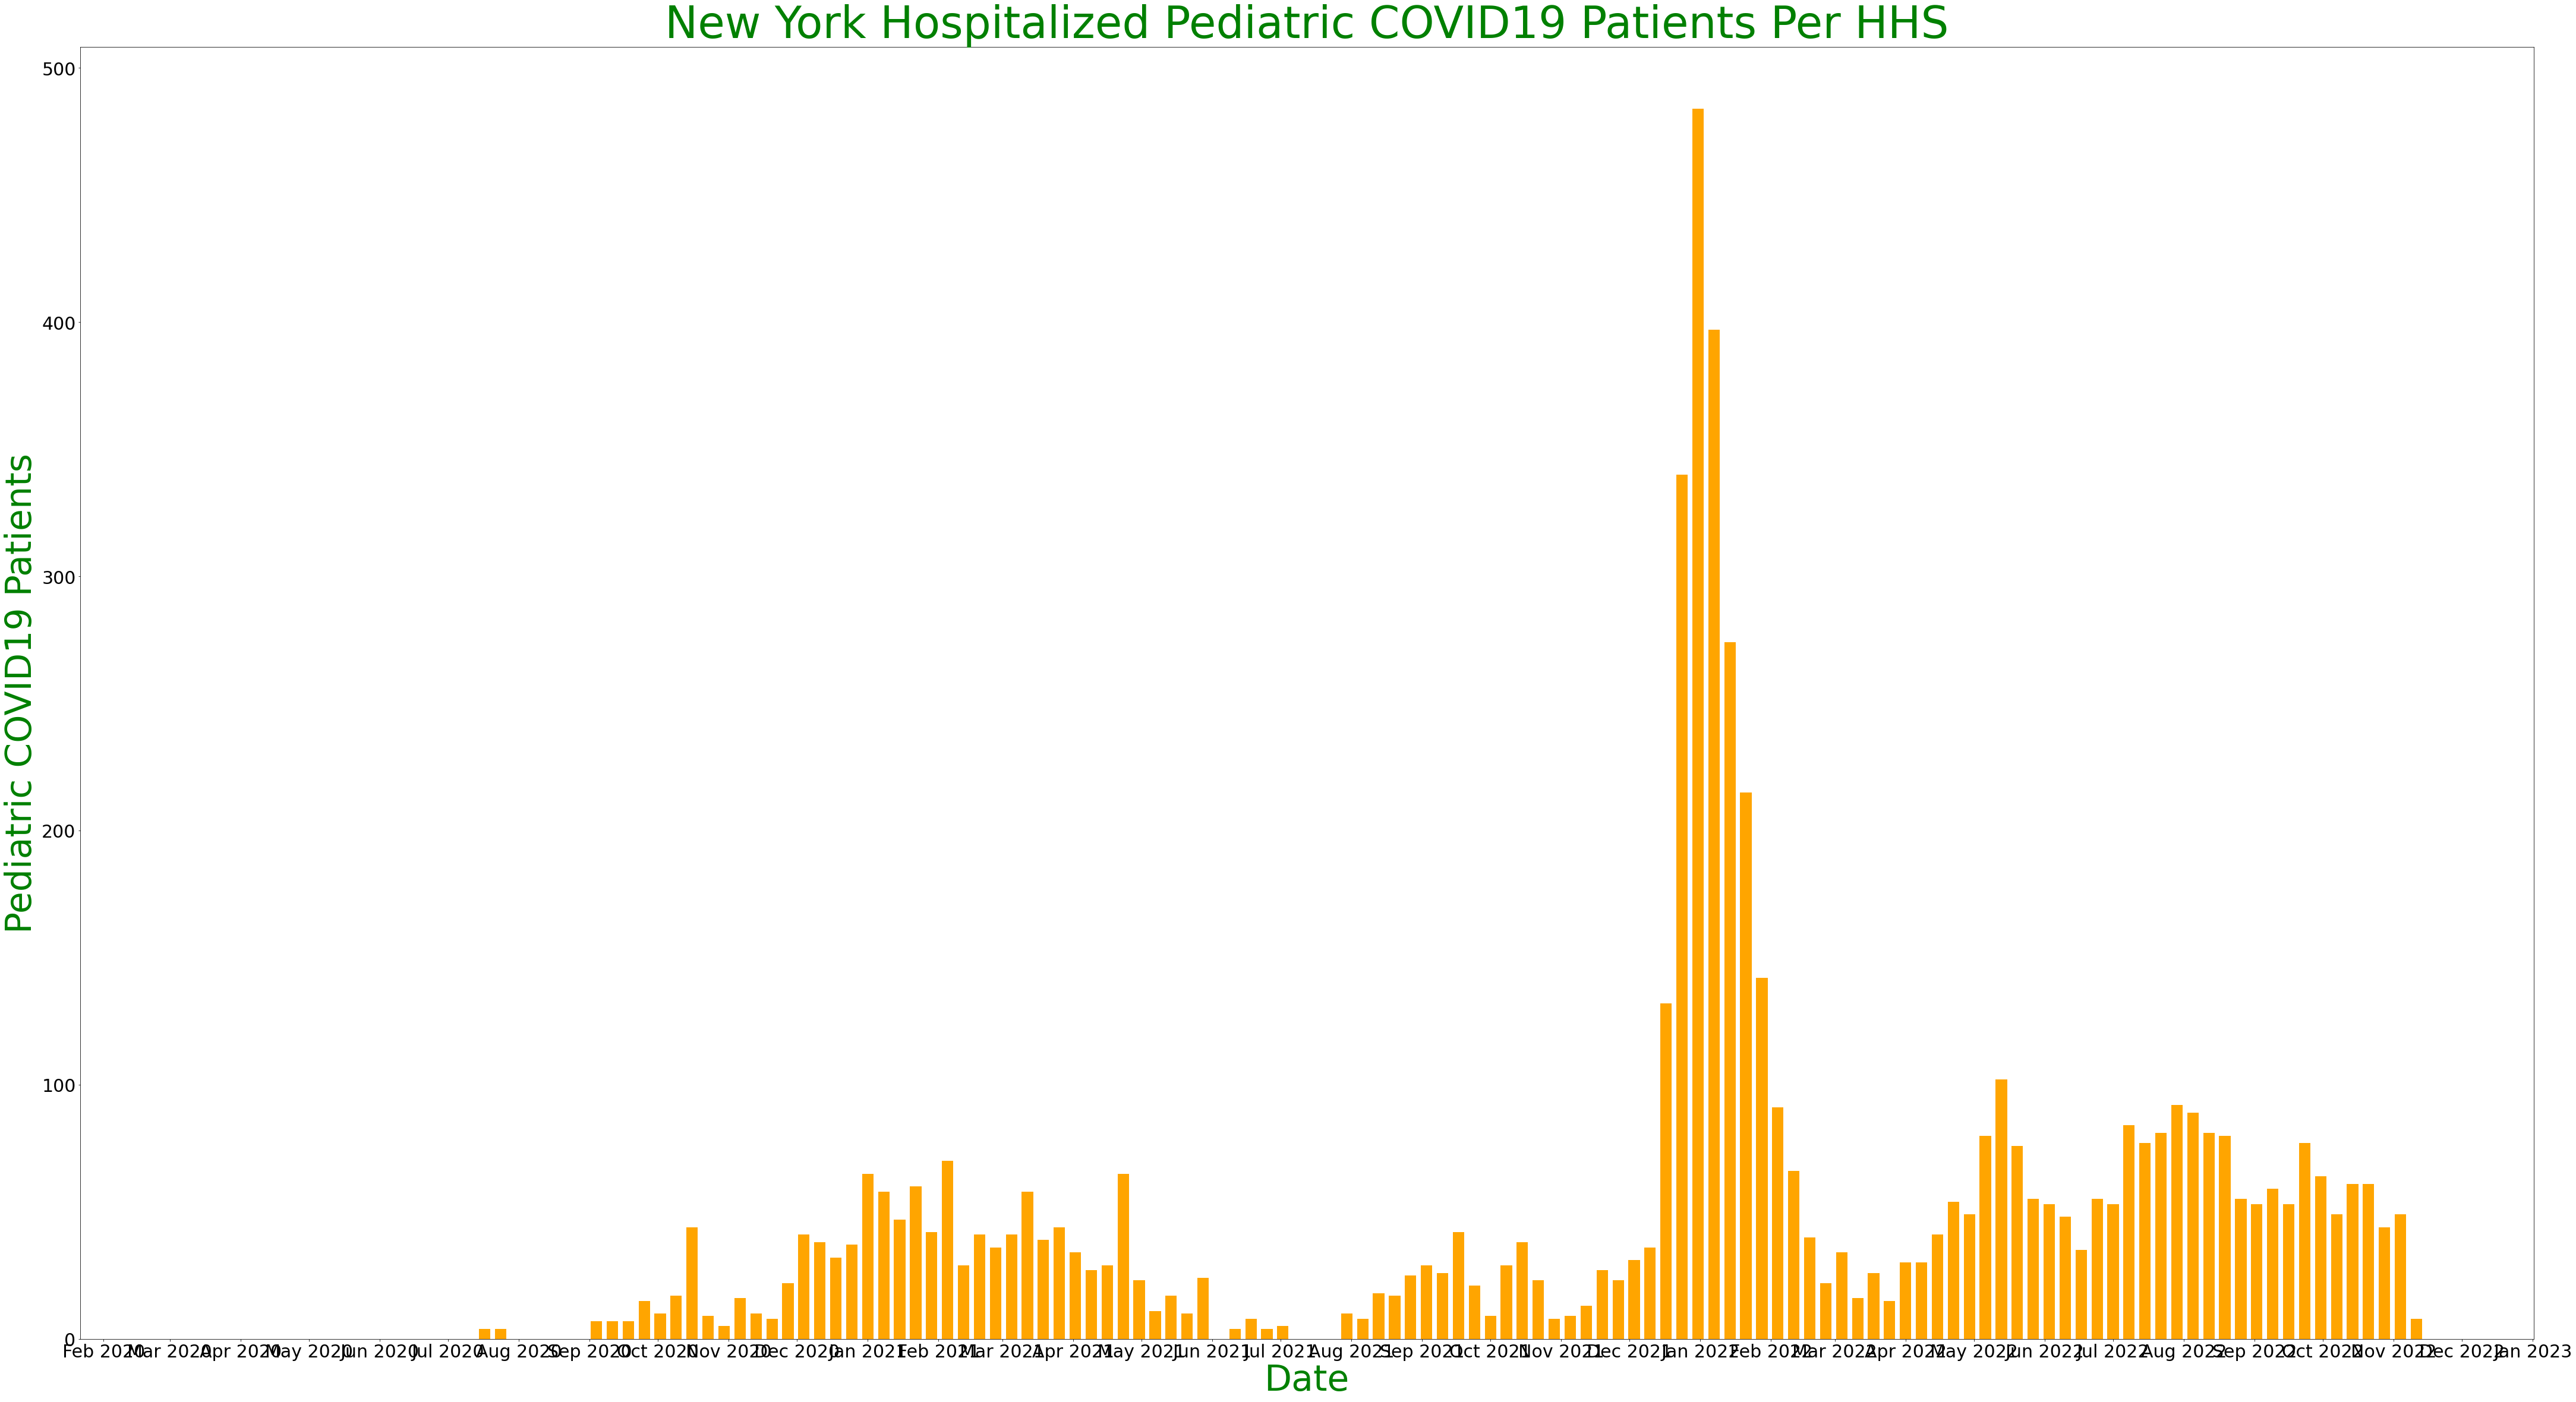

In [99]:
aaa = df_covid_hospital[df_covid_hospital.state == 'NY']
date_list = aaa.collection_week.unique()
date_list.sort()
ny_ped_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_pediatric_covid_confirmed_7_day_sum >= 0]
    #print()
    ny_ped_list.append((x, ccc.previous_day_admission_pediatric_covid_confirmed_7_day_sum.sum()))
df_ny_ped = pd.DataFrame(ny_ped_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('New York Hospitalized Pediatric COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_ny_ped.date, df_ny_ped.ped_count, color = 'orange', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_NY_Pediatric.png')


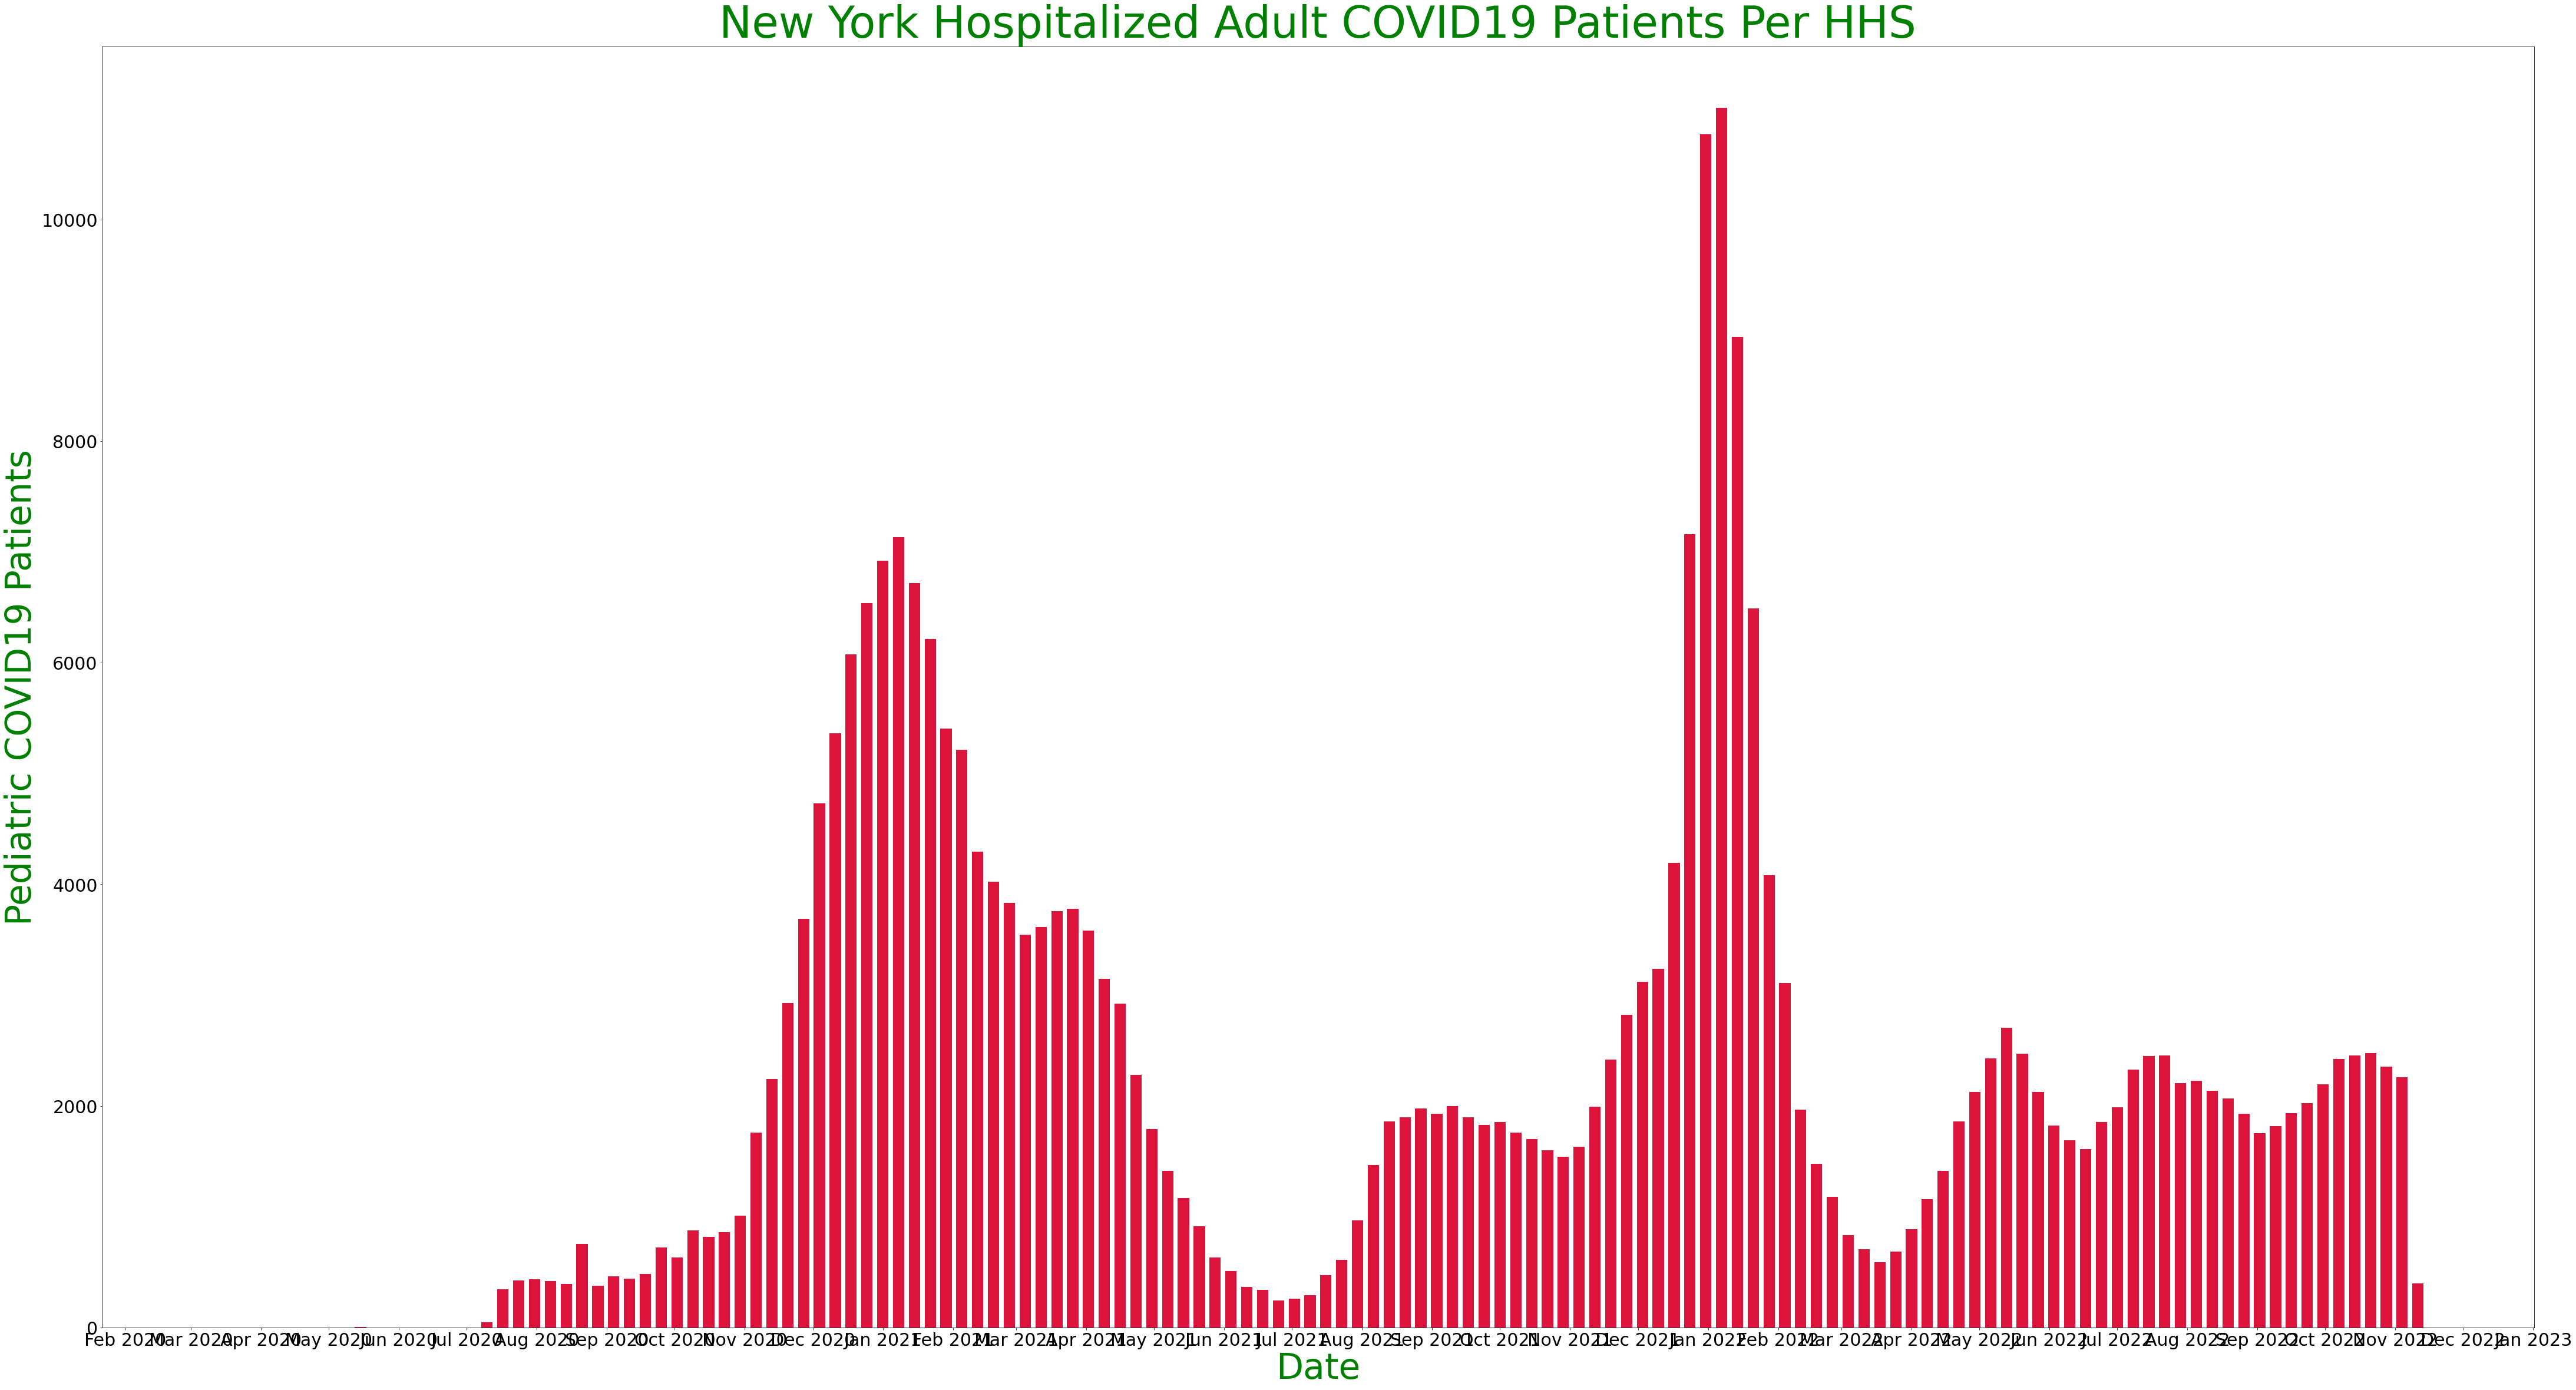

In [100]:
aaa = df_covid_hospital[df_covid_hospital.state == 'NY']
date_list = aaa.collection_week.unique()
date_list.sort()
ny_adult_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_adult_covid_confirmed_7_day_sum >= 0]
    #print()
    ny_adult_list.append((x, ccc.previous_day_admission_adult_covid_confirmed_7_day_sum.sum()))
df_ny_adult = pd.DataFrame(ny_adult_list, columns = ['date', 'ped_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('New York Hospitalized Adult COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Pediatric COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_ny_adult.date, df_ny_adult.ped_count, color = 'crimson', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_NY_Adult.png')


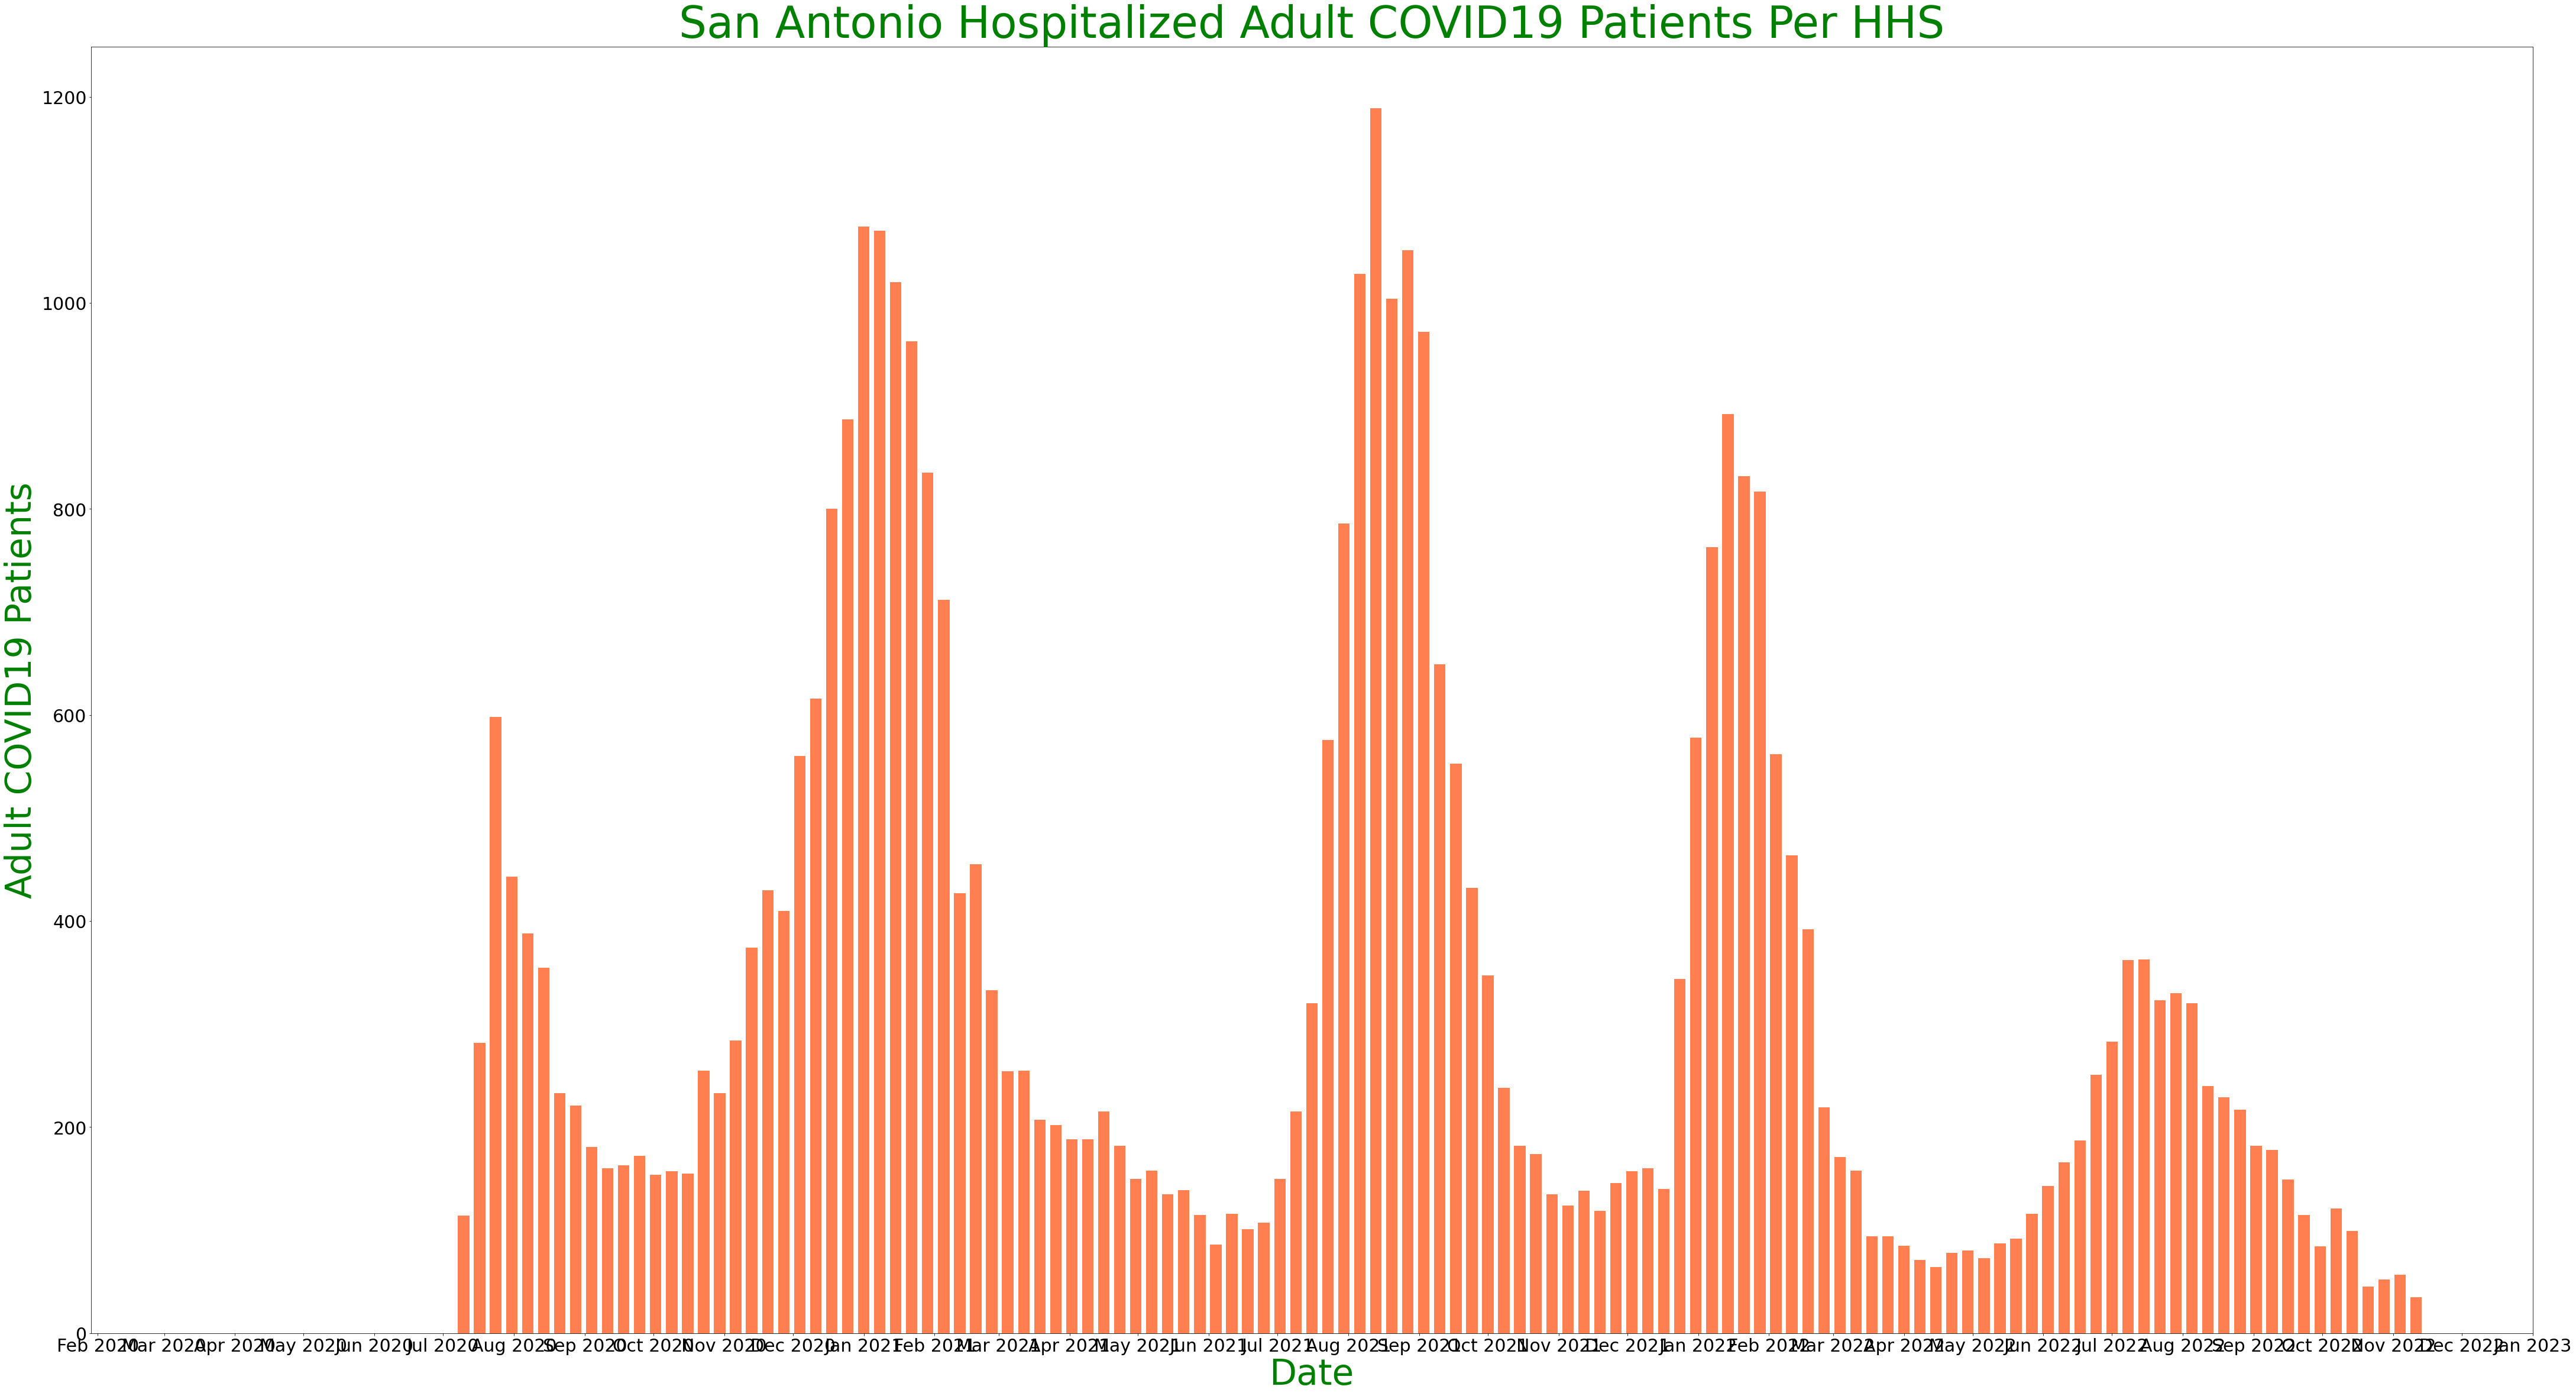

In [101]:
aaa = df_covid_hospital[df_covid_hospital.city == 'SAN ANTONIO']
date_list = aaa.collection_week.unique()
date_list.sort()
sa_adult_list = []
for x in date_list:
    #print(x)
    bbb = aaa[aaa.collection_week == x]
    ccc = bbb[bbb.previous_day_admission_adult_covid_confirmed_7_day_sum >= 0]
    #print()
    sa_adult_list.append((x, ccc.previous_day_admission_adult_covid_confirmed_7_day_sum.sum()))
df_sa_adult = pd.DataFrame(sa_adult_list, columns = ['date', 'adult_count'])
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(74,40)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.tick_params(axis='both', labelsize=30)
ax.xaxis.set_minor_locator(months)
#plt.rcParams["figure.figsize"] = [17.00, 3.50]
plt.title('San Antonio Hospitalized Adult COVID19 Patients Per HHS', color = 'green', fontsize = 74)
plt.xlabel('Date',color='green', fontsize = 60)
plt.ylabel('Adult COVID19 Patients',color='green', fontsize = 60)
plt.bar(df_sa_adult.date, df_sa_adult.adult_count, color = 'coral', width = 5)
#plt.plot(ddd_rolling, 'ro',markersize = 25)
#plt.legend(['7 Day Rolling Average','Daily COVID-19 Deaths In US'], fontsize = 40)
fig.savefig('HHS_San_Antonio_Adult.png')

In [102]:
aaa.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2271 entries, 453 to 678356
Columns: 128 entries, hospital_pk to total_staffed_pediatric_icu_beds_7_day_sum
dtypes: bool(2), datetime64[ns](1), float64(87), int64(29), object(9)
memory usage: 2.2+ MB


In [105]:
df_us_ped.where


<bound method DataFrame.where of           date  ped_count
0   2019-12-27        0.0
1   2020-01-03        0.0
2   2020-01-10        0.0
3   2020-01-17        0.0
4   2020-01-24        0.0
5   2020-01-31        0.0
6   2020-02-07        0.0
7   2020-02-14        0.0
8   2020-02-21        0.0
9   2020-02-28        0.0
10  2020-03-06        0.0
11  2020-03-13        0.0
12  2020-03-20        0.0
13  2020-03-27        0.0
14  2020-04-03        0.0
15  2020-04-10        0.0
16  2020-04-17        0.0
17  2020-04-24        0.0
18  2020-05-01        0.0
19  2020-05-08        0.0
20  2020-05-15        0.0
21  2020-05-22        0.0
22  2020-05-29        0.0
23  2020-06-05        0.0
24  2020-06-12        0.0
25  2020-06-19        0.0
26  2020-06-26        0.0
27  2020-07-03        0.0
28  2020-07-10      151.0
29  2020-07-17      716.0
30  2020-07-24      441.0
31  2020-07-31      362.0
32  2020-08-07      493.0
33  2020-08-14      307.0
34  2020-08-21      277.0
35  2020-08-28      377.0
36  2